<a href="https://colab.research.google.com/github/esteban-miller/esteban-miller-github.io/blob/main/Capstone_Project_Obesity_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes del grupo:**

*   Sergio Caballero
*   Lidia Martín
*   Esteban Miller
*   Sergio Martín

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

!pip install unidecode
from unidecode import unidecode

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# Save model / deployment
import pickle
import sys


from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import scipy.stats as st
from scipy import stats



# EDA
from scipy.stats import (
    chi2_contingency,
    kruskal,
    f_oneway,
    normaltest,
)


!pip install scikit-posthocs
from scikit_posthocs import posthoc_conover
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Cargamos los datos

El dataset consiste en un conjunto de 17 parámetros vasados en datos corporales y habitos diarios de personas, desde sue edad o su peso hasta su hitorial familiar.


**Descripción del dataset**

El objetivo final de este proyecto es predecir mediante un procedimiento de clasificacion la variable de salida, que en este caso es el nuvel de obesidad.

 🔍 Visión general del conjunto de datos:


🧑‍🦱 Edad: Edad del individuo.


🚻 Sexo: Sexo del individuo.


📏 Altura: Altura del individuo.


⚖️ Peso: Peso del individuo.


🏃 CALC: Consumo calórico.


🍟 FAVC: Consumo frecuente de alimentos hipercalóricos.


🥗 FCVC: Frecuencia de consumo de verduras.


🍽️ NCP: Número de comidas principales.


🍬 SCC: Consumo de bebidas dulces.


🚬 HÁBITO DE FUMAR: Hábitos de fumar.


💧 CH2O: Consumo diario de agua.


🏠 Antecedentes familiares de sobrepeso: Si hay antecedentes familiares de sobrepeso.


🏃 FAF: Frecuencia de actividad física.


⌛ TUE: Tiempo de uso de dispositivos tecnológicos.


🍕 CAEC: Consumo de alimentos entre comidas.


🚗 MTRANS: Método de transporte.


⚖️ NObeyesdad: Nivel de obesidad.


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,
  "abdelrahman16/obesity-dataset",file_path,)

<ipython-input-353-453ee872fbb0>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,


In [ ]:
df.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

# Preprocesamiento de datos

In [ ]:
# Convertimos todo a minuscula y limpiamos antes y despues
df.columns= df.columns.str.lower().str.strip()

# Quitamos todos los caracteres diacriticos
df.columns = [unidecode(col) for col in df.columns]

#Vemos que al variable age y faf tiene valores con decimales por lo que la convertimos en enteros
df.age = df.age.astype(int)

#Renombramos la variable family_history_with_overweight
df.rename(columns={'family_history_with_overweight': 'family_history'}, inplace=True)

# Analisis exploratorio (Data Understanding / Descriptive Analysis)

In [ ]:
# Forma del dataset
print("Forma del conjunto de datos:")
print(df.shape)

Forma del conjunto de datos:
(2111, 17)


In [ ]:
# Mostrar información general del conjunto de datos
print("Información del conjunto de datos:")
print(df.info())



Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2111 non-null   int64  
 1   gender          2111 non-null   object 
 2   height          2111 non-null   float64
 3   weight          2111 non-null   float64
 4   calc            2111 non-null   object 
 5   favc            2111 non-null   object 
 6   fcvc            2111 non-null   float64
 7   ncp             2111 non-null   float64
 8   scc             2111 non-null   object 
 9   smoke           2111 non-null   object 
 10  ch2o            2111 non-null   float64
 11  family_history  2111 non-null   object 
 12  faf             2111 non-null   float64
 13  tue             2111 non-null   float64
 14  caec            2111 non-null   object 
 15  mtrans          2111 non-null   object 
 16  nobeyesdad      2111 non-null   object 
dty

In [ ]:

# Resumen estadístico de variables continuas

print("\nResumen Estadístico de variables continuas:")
print(df.describe())


Resumen Estadístico de variables continuas:
               age       height       weight         fcvc          ncp  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     23.972525     1.701677    86.586058     2.419043     2.685628   
std       6.308664     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.000000     1.630000    65.473343     2.000000     2.658738   
50%      22.000000     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              ch2o          faf          tue  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%   

- **Age (Edad):** No tiene nulos. No es una normal. La media es 24.31 y la mediana 22.77, la desviación estándar es 6.34 por lo que los datos están concentrados en su mayoría entre 19.94 y 26 años. El min es 14 y el máximo 61, no hay evidencia clara de outliers.
- **Height (Altura):** No tiene nulos. No es una normal.  La media es 1.70 y la mediana 1.70, la desviación estándar es 0.09 por lo que los datos están concentrados en su mayoría entre 1.63 y 1.76 metros. El min es 1.45 y el máximo 1.98, no hay evidencia clara de outliers.
- **Weight (Peso):** No tiene nulos. No es una normal. La media es 86.58 y la mediana 83.00, la desviación estándar es 26.19 por lo que los datos están concentrados en su mayoría entre 65.47 y 107.43 kg. El min es 39 y el máximo 173, hay evidencia clara de outliers.
- **FCVC (Frecuencia de Consumo de Verduras):** No tiene nulos. No es una normal. La media es 2.41 y la mediana 2.38, la desviación estándar es 0.53 por lo que los datos están concentrados en su mayoría entre 2 y 3. El min es 1 y el máximo 3, no hay evidencia clara de outliers.
- **NCP (Número de Comidas Principales):** No tiene nulos. No es una normal. La media es 2.68 y la mediana 3.00, la desviación estándar es 0.77 por lo que los datos están concentrados en su mayoría entre 2.65 y 3. El min es 1 y el máximo 4, no hay evidencia clara de outliers.
- **CH20 (Consumo de Agua):** No tiene nulos. No es una normal. La media es 2.00 y la mediana 2.00, la desviación estándar es 0.61 por lo que los datos están concentrados en su mayoría entre 1.58 y 2.47. El min es 1 y el máximo 3, no hay evidencia clara de outliers.
- **FAF(Frecuencia de Actividad Física):** No tiene nulos. No es una normal. La media es 1.01 y la mediana 1.00, la desviación estándar es 0.85 por lo que los datos están concentrados en su mayoría entre 0.12 y 1.66. El min es 0 y el máximo 3, no hay evidencia clara de outliers.
- **TUE (Tiempo de Uso de Dispositivos Tecnológicos):** No tiene nulos. No es una normal.La media es 0.65 y la mediana 0.62, la desviación estándar es 0.60 por lo que los datos están concentrados en su mayoría entre 0 y 1. El min es 0 y el máximo 2, no hay evidencia clara de outliers.

In [ ]:
# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
age               0
gender            0
height            0
weight            0
calc              0
favc              0
fcvc              0
ncp               0
scc               0
smoke             0
ch2o              0
family_history    0
faf               0
tue               0
caec              0
mtrans            0
nobeyesdad        0
dtype: int64


## Analisis Univariable

### Análisis de variables continuas

### Test de normalidad

In [ ]:
for col in df.select_dtypes("number"):
  _, pvalue = shapiro(df[col], nan_policy='omit')
  if pvalue < 0.05:
    print(f"la variable {col} no tiene una distribución normal.")
  else:
    print(f"la variable {col} puede que tenga una distribución normal.")

  print(80*"-")

la variable age no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable height no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable weight no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable fcvc no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable ncp no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable ch2o no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable faf no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable tue no tiene una distribución normal.
-------------------------

## Comprobación de outliers

In [ ]:
# Comprobación de outliers

def outliers_zscore(data:pd.DataFrame, colname:str, threshold: int=3) -> pd.DataFrame:
  """
  calculates the outliers for the given column with the ZScore method.
  """
  z_scores = stats.zscore(df[colname])
  outliers = (np.abs(z_scores) > threshold)

  return df[outliers]

def outliers_iqr(df:pd.DataFrame, colname:str) -> pd.DataFrame:
  """
  calculates outliers for the given column with the IQR method.
  """
  q1 = df[colname].quantile(0.25)
  q3 = df[colname].quantile(0.75)
  iqr = q3-q1

  outliers = ((df[colname] < q1 - 1.5 * iqr) | (df[colname] > q3 + 1.5 * iqr))
  return df[outliers]

In [ ]:
for col in df.select_dtypes(include='number'):
  out = outliers_zscore(df, col)
  print(f"{col} tiene estos outliers: {len(out)}")
  print(80*"-")

age tiene estos outliers: 25
--------------------------------------------------------------------------------
height tiene estos outliers: 0
--------------------------------------------------------------------------------
weight tiene estos outliers: 1
--------------------------------------------------------------------------------
fcvc tiene estos outliers: 0
--------------------------------------------------------------------------------
ncp tiene estos outliers: 0
--------------------------------------------------------------------------------
ch2o tiene estos outliers: 0
--------------------------------------------------------------------------------
faf tiene estos outliers: 0
--------------------------------------------------------------------------------
tue tiene estos outliers: 0
--------------------------------------------------------------------------------


In [ ]:
for col in df.select_dtypes(include='number'):
  out = outliers_iqr(df, col)
  print(f"{col} tiene estos outliers: {len(out)}")
  print(80*"-")

age tiene estos outliers: 147
--------------------------------------------------------------------------------
height tiene estos outliers: 1
--------------------------------------------------------------------------------
weight tiene estos outliers: 1
--------------------------------------------------------------------------------
fcvc tiene estos outliers: 0
--------------------------------------------------------------------------------
ncp tiene estos outliers: 579
--------------------------------------------------------------------------------
ch2o tiene estos outliers: 0
--------------------------------------------------------------------------------
faf tiene estos outliers: 0
--------------------------------------------------------------------------------
tue tiene estos outliers: 0
--------------------------------------------------------------------------------


In [ ]:
outliers_zscore(df, 'age')

age  gender    height     weight        calc favc      fcvc       ncp  \
21     52  Female  1.690000  87.000000          no  yes  3.000000  1.000000   
92     55    Male  1.780000  84.000000  Frequently   no  3.000000  4.000000   
133    61  Female  1.650000  66.000000  Frequently  yes  3.000000  3.000000   
137    44    Male  1.600000  80.000000          no   no  2.000000  3.000000   
161    55    Male  1.650000  80.000000          no  yes  2.000000  3.000000   
169    45  Female  1.630000  77.000000          no  yes  2.000000  3.000000   
232    51  Female  1.590000  50.000000          no   no  3.000000  3.000000   
252    56    Male  1.790000  90.000000  Frequently   no  2.000000  3.000000   
492    45    Male  1.700000  86.000000          no  yes  3.000000  3.000000   
1013   55    Male  1.769269  80.491339          no  yes  2.000000  3.000000   
1034   50    Male  1.745528  82.130728          no  yes  2.000000  3.000000   
1062   43  Female  1.733875  86.945380          no  yes  2.353603  2.337035   
1063   45  Female  1.675953  79.668320          no  yes  2.598051  3.000000   
1088   55    Male  1.657221  80.993213          no  yes  2.000000  3.000000   
1101   46    Male  1.718097  88.600878          no  yes  2.129969  3.000000   
1158   55    Male  1.673394  80.400306          no  yes  2.000000  3.000000   
1179   47    Male  1.743935  84.729197          no  yes  2.535315  3.000000   
1208   45  Female  1.687326  80.413997          no  yes  2.076689  3.000000   
1215   43  Female  1.569234  81.827288          no  yes  2.909853  1.000000   
1267   43  Female  1.587546  76.126112   Sometimes  yes  2.000000  3.000000   
1286   47  Female  1.643786  81.978743          no  yes  2.037585  1.418985   
1305   43  Female  1.595165  77.354744          no  yes  2.000000  3.000000   
1386   43  Female  1.584322  80.986496          no  yes  2.186322  2.900915   
1387   43  Female  1.582523  81.919454          no  yes  2.766320  1.317884   
1490   43  Female  1.592316  77.001030   Sometimes  yes  2.000000  3.000000   

      scc smoke      ch2o family_history       faf  tue        caec  \
21     no   yes  2.000000            yes  0.000000  0.0   Sometimes   
92    yes    no  3.000000            yes  3.000000  0.0  Frequently   
133    no    no  2.000000             no  1.000000  1.0      Always   
137    no   yes  3.000000            yes  0.000000  0.0   Sometimes   
161    no    no  2.000000             no  1.000000  0.0   Sometimes   
169    no    no  1.000000            yes  0.000000  0.0  Frequently   
232   yes   yes  3.000000            yes  2.000000  0.0   Sometimes   
252    no   yes  2.000000            yes  1.000000  0.0   Sometimes   
492    no    no  1.000000             no  0.000000  0.0  Frequently   
1013   no    no  2.000000             no  1.000000  0.0   Sometimes   
1034   no    no  1.774778            yes  0.943266  0.0   Sometimes   
1062   no    no  1.830614            yes  0.706287  0.0   Sometimes   
1063   no    no  1.000000            yes  0.000000  0.0   Sometimes   
1088   no    no  2.000000            yes  1.000000  0.0   Sometimes   
1101   no    no  1.568035            yes  0.870127  0.0   Sometimes   
1158   no    no  2.000000            yes  1.000000  0.0   Sometimes   
1179   no    no  1.146595            yes  0.313810  0.0   Sometimes   
1208   no    no  1.026729            yes  0.647798  0.0   Sometimes   
1215   no    no  2.000000            yes  1.308852  0.0   Sometimes   
1267   no    no  2.091934            yes  0.000000  0.0   Sometimes   
1286   no    no  1.827351            yes  0.000000  0.0   Sometimes   
1305   no    no  2.117346            yes  0.000000  0.0   Sometimes   
1386   no    no  2.471033            yes  0.256113  0.0   Sometimes   
1387   no    no  1.889341            yes  0.990642  0.0   Sometimes   
1490   no    no  2.806922            yes  0.000000  0.0   Sometimes   

                     mtrans           nobeyesdad  
21               Automobile       Obesity_Type_I  
92

In [ ]:
outliers_iqr(df, 'age')

age  gender    height      weight        calc favc      fcvc       ncp  \
13     41    Male  1.800000   99.000000  Frequently  yes  2.000000  3.000000   
21     52  Female  1.690000   87.000000          no  yes  3.000000  1.000000   
33     39    Male  1.790000   90.000000   Sometimes   no  2.000000  1.000000   
92     55    Male  1.780000   84.000000  Frequently   no  3.000000  4.000000   
104    38  Female  1.560000   80.000000   Sometimes  yes  2.000000  3.000000   
...   ...     ...       ...         ...         ...  ...       ...       ...   
1740   37    Male  1.763582  117.861590   Sometimes  yes  2.145114  2.888193   
1775   37    Male  1.762921  118.401740   Sometimes  yes  2.136830  2.993084   
1776   38    Male  1.752863  119.201465   Sometimes  yes  2.499388  2.989791   
1777   38    Male  1.768235  117.792268   Sometimes  yes  2.230742  2.920373   
1778   38    Male  1.766888  118.134898   Sometimes  yes  2.240757  2.911568   

      scc smoke      ch2o family_history       faf      tue        caec  \
13     no    no  2.000000             no  2.000000  1.00000   Sometimes   
21     no   yes  2.000000            yes  0.000000  0.00000   Sometimes   
33     no    no  2.000000             no  0.000000  0.00000   Sometimes   
92    yes    no  3.000000            yes  3.000000  0.00000  Frequently   
104    no    no  2.000000            yes  0.000000  0.00000   Sometimes   
...   ...   ...       ...            ...       ...      ...         ...   
1740   no    no  2.038128            yes  0.852344  0.00000   Sometimes   
1775   no    no  1.885926            yes  0.615298  0.00000   Sometimes   
1776   no    no  1.959777            yes  0.608100  0.64676   Sometimes   
1777   no    no  1.831187            yes  0.756277  0.00000   Sometimes   
1778   no    no  1.895876            yes  0.822186  0.00000   Sometimes   

                     mtrans           nobeyesdad  
13               Automobile       Obesity_Type_I  
21               Automobile       Obesity_Type_I  
33    Public_Transportation  Overweight_Level_II  
92                  Walking   Overweight_Level_I  
104              Automobile       Obesity_Type_I  
...                     ...                  ...  
1740             Automobile      Obesity_Type_II  
1775             Automobile      Obesity_Type_II  
1776             Automobile      Obesity_Type_II  
1777             Automobile      Obesity_Type_II  
1778             Automobile      Obesity_Type_II  

[147 rows x 17 columns]

In [ ]:
outliers_zscore(df, 'height')

Empty DataFrame
Columns: [age, gender, height, weight, calc, favc, fcvc, ncp, scc, smoke, ch2o, family_history, faf, tue, caec, mtrans, nobeyesdad]
Index: []

In [ ]:
outliers_iqr(df, 'height')

age gender  height  weight       calc favc  fcvc  ncp scc smoke  ch2o  \
349   20   Male    1.98   125.0  Sometimes  yes   2.0  3.0  no    no   3.0   

    family_history  faf  tue    caec                 mtrans      nobeyesdad  
349            yes  1.0  1.0  Always  Public_Transportation  Obesity_Type_I

In [ ]:
outliers_zscore(df, 'weight')

age gender  height  weight       calc favc  fcvc  ncp scc smoke  ch2o  \
344   18   Male    1.87   173.0  Sometimes  yes   3.0  3.0  no    no   2.0   

    family_history  faf  tue        caec                 mtrans  \
344            yes  2.0  1.0  Frequently  Public_Transportation   

           nobeyesdad  
344  Obesity_Type_III

In [ ]:
outliers_iqr(df, 'weight')

age gender  height  weight       calc favc  fcvc  ncp scc smoke  ch2o  \
344   18   Male    1.87   173.0  Sometimes  yes   3.0  3.0  no    no   2.0   

    family_history  faf  tue        caec                 mtrans  \
344            yes  2.0  1.0  Frequently  Public_Transportation   

           nobeyesdad  
344  Obesity_Type_III

In [ ]:
outliers_iqr(df, 'ncp')

age  gender    height      weight       calc favc      fcvc       ncp  \
4      22    Male  1.780000   89.800000  Sometimes   no  2.000000  1.000000   
14     23    Male  1.770000   60.000000  Sometimes  yes  3.000000  1.000000   
16     27    Male  1.930000  102.000000  Sometimes  yes  2.000000  1.000000   
17     29  Female  1.530000   78.000000         no  yes  2.000000  1.000000   
18     30  Female  1.710000   82.000000         no  yes  3.000000  4.000000   
...   ...     ...       ...         ...        ...  ...       ...       ...   
1794   30    Male  1.653876  102.583895         no  yes  2.919526  2.142328   
1795   20    Male  1.657132  105.580491         no  yes  2.724121  1.437959   
1796   20    Male  1.644751  101.067988         no  yes  2.801992  1.343117   
1797   25    Male  1.660761  104.321463         no  yes  2.748971  1.213431   
1798   26    Male  1.691510  102.595180         no  yes  2.680375  1.089048   

     scc smoke      ch2o family_history       faf       tue        caec  \
4     no    no  2.000000             no  0.000000  0.000000   Sometimes   
14    no    no  1.000000            yes  1.000000  1.000000   Sometimes   
16    no    no  1.000000            yes  1.000000  0.000000   Sometimes   
17    no    no  2.000000             no  0.000000  0.000000   Sometimes   
18    no   yes  1.000000            yes  0.000000  0.000000  Frequently   
...   ..   ...       ...            ...       ...       ...         ...   
1794  no    no  1.175714            yes  0.958555  0.636289   Sometimes   
1795  no    no  1.590418            yes  0.029603  1.122118   Sometimes   
1796  no    no  1.128942            yes  0.233987  0.819980   Sometimes   
1797  no    no  1.448875            yes  0.128548  1.239038   Sometimes   
1798  no    no  1.366238            yes  0.181324  1.041677   Sometimes   

                     mtrans           nobeyesdad  
4     Public_Transportation  Overweight_Level_II  
14    Public_Transportation        Normal_Weight  
16    Public_Transportation  Overweight_Level_II  
17               Automobile       Obesity_Type_I  
18               Automobile  Overweight_Level_II  
...                     ...                  ...  
1794  Public_Transportation      Obesity_Type_II  
1795  Public_Transportation      Obesity_Type_II  
1796  Public_Transportation      Obesity_Type_II  
1797  Public_Transportation      Obesity_Type_II  
1798  Public_Transportation      Obesity_Type_II  

[579 rows x 17 columns]

## Análisis de variables continuas

In [ ]:
# Analizamos como esta distribuido el dataset en funcion de la edad
(df.age.value_counts(dropna = False) / len(df)).round(2)

age
21    0.13
18    0.11
19    0.09
23    0.08
22    0.08
25    0.08
26    0.07
20    0.06
24    0.04
17    0.04
30    0.03
31    0.02
29    0.02
33    0.02
37    0.02
27    0.01
38    0.01
16    0.01
34    0.01
40    0.01
28    0.01
39    0.01
32    0.01
35    0.01
36    0.01
41    0.01
43    0.00
42    0.00
55    0.00
45    0.00
47    0.00
52    0.00
61    0.00
44    0.00
15    0.00
51    0.00
56    0.00
14    0.00
50    0.00
46    0.00
Name: count, dtype: float64

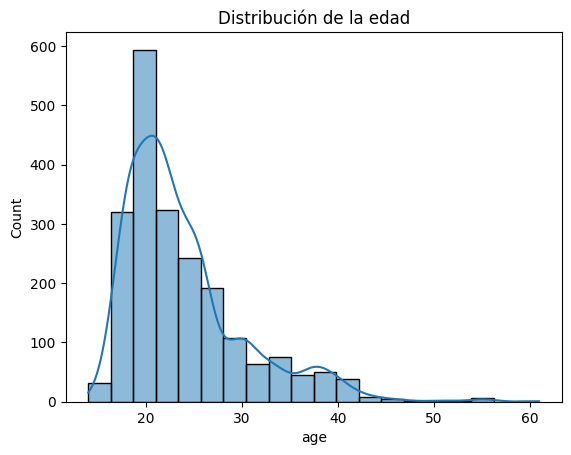

In [ ]:
# Visualizamos la varibale Age
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribución de la edad")
plt.show()

- La distribución de la edad muestra un pico principal alrededor de los 22-25 años, con una clara asimetría hacia la derecha. Este pico sugiere que la mayoría de los individuos en el conjunto de datos son adultos jóvenes.
- La concentración de datos es más pronunciada entre los 20 y 35 años, lo que indica que este rango de edad representa la mayor parte de la población estudiada.
- Hay una disminución gradual en la frecuencia de individuos a medida que la edad aumenta, con muy pocos casos por encima de los 50 años. Esto podría reflejar la composición demográfica de la muestra, posiblemente relacionada con el contexto del estudio (por ejemplo, una población principalmente de estudiantes o adultos jóvenes).
- La curva de distribución es claramente asimétrca y no sigue una distribución normal, mostrando una cola larga hacia la derecha que representa los individuos de mayor edad.
- Se observa una caída rápida en la frecuencia después de los 35 años, con muy pocos individuos en los tramos de edad más avanzada.
- El rango de edad más representativo parece estar entre los 20 y 30 años, donde se concentra la mayor parte de la densidad de la distribución.

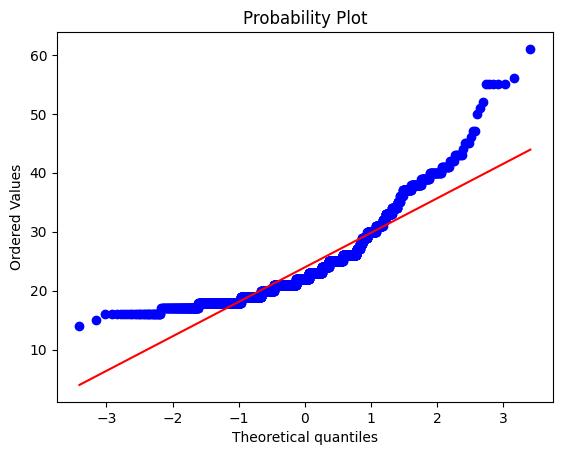

In [ ]:
stats.probplot(df["age"], plot=sns.mpl.pyplot)
plt.show()

- La variable Edad no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, especialmente en las colas (los extremos).
- Esa desviación puede ser por valores extremos o atípicos.


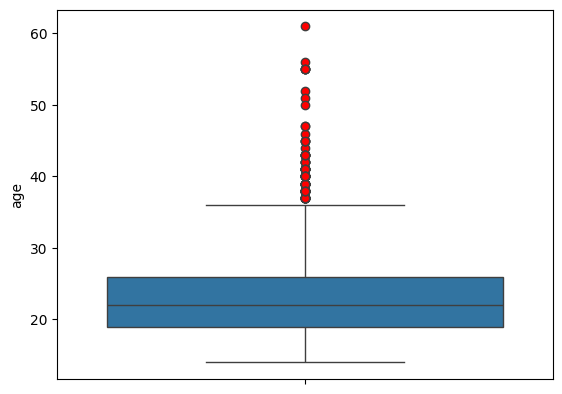

In [ ]:
sns.boxplot(df["age"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana de la edad es aproximadamente 25 años, lo que significa que el 50% de los individuos tienen una edad menor o igual a 25 años, y el otro 50% tienen una edad mayor o igual a 25 años.
- El rango intercuartil (IQR) de la edad está entre aproximadamente 20 y 30 años, lo que indica que el 50% central de las edades se encuentra en este rango. Esto sugiere una concentración de edades en este intervalo de adultos jóvenes.
- Los valores se extienden desde aproximadamente 14 hasta 61 años, mostrando una distribución bastante amplia.
- Se observan varios outliers por encima del rango superior, representados por puntos rojos, que indican individuos con edades significativamente mayores al grueso de la distribución.
- La caja del boxplot (que representa el 50% central de los datos) es relativamente compacta, lo que sugiere una concentración bastante homogénea de edades en el rango de 20 a 30 años.


In [ ]:
# Analizamos la variable altura la categorizamos para visualizarla de forma mas clara

df['height_catego'] = pd.cut(df['height'],
                             bins=sorted([1.0, 1.50, 1.80, df['height'].max()]),
                             labels=['bajo', 'regular', 'alto'],
                             right=True, include_lowest=True, duplicates='drop')

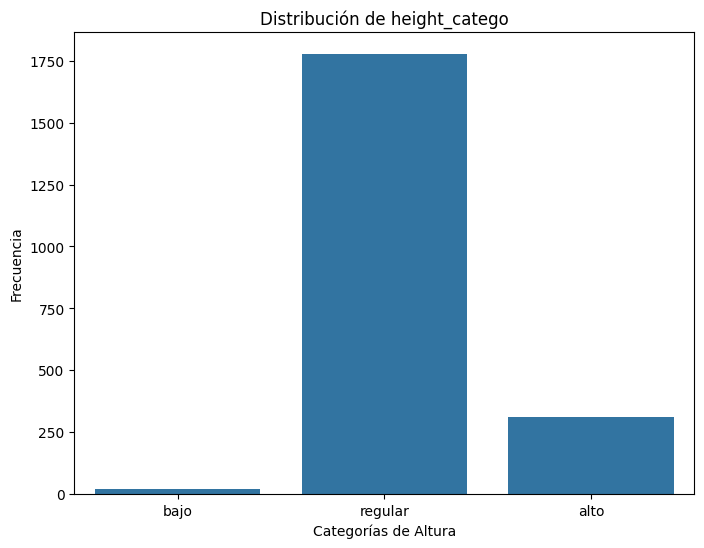

In [ ]:
# Visualizamos la variable height_catego
plt.figure(figsize=(8, 6))
sns.countplot(x='height_catego', data=df)
plt.title('Distribución de height_catego')
plt.xlabel('Categorías de Altura')
plt.ylabel('Frecuencia')
plt.show()

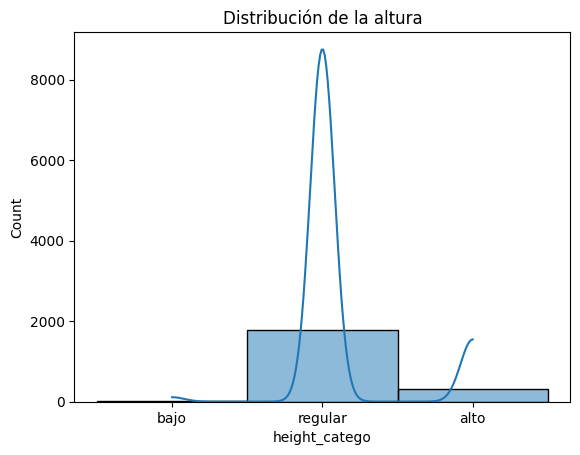

In [ ]:
sns.histplot(df["height_catego"], bins=20, kde=True)
plt.title("Distribución de la altura")
plt.show()


- La distribución muestra una clara concentración en la categoría "regular", con un pico muy pronunciado que indica que la mayoría de los individuos en el conjunto de datos tienen una altura considerada como "regular".
- Hay una diferencia significativa en la frecuencia entre las categorías. La categoría "regular" tiene una frecuencia mucho mayor en comparación con las categorías "bajo" y "alto".
- La distribución no es simétrica, con una clara predominancia de la categoría de altura "regular" sobre las otras dos categorías.
- Las categorías "bajo" y "alto" tienen frecuencias mucho más bajas, lo que sugiere que son menos comunes en el conjunto de datos.
La representación gráfica indica que la altura "regular" es la norma en esta población, con muy pocos individuos clasificados en los extremos de altura baja o alta.
- El diseño de la gráfica parece ser una categorización de la altura en tres niveles: bajo, regular y alto, lo que proporciona una vista general de la distribución de alturas más que un detalle preciso de medidas específicas.
- La gran concentración en la categoría "regular" podría indicar que esta categoría fue definida para capturar el rango de altura más común en la población estudiada.

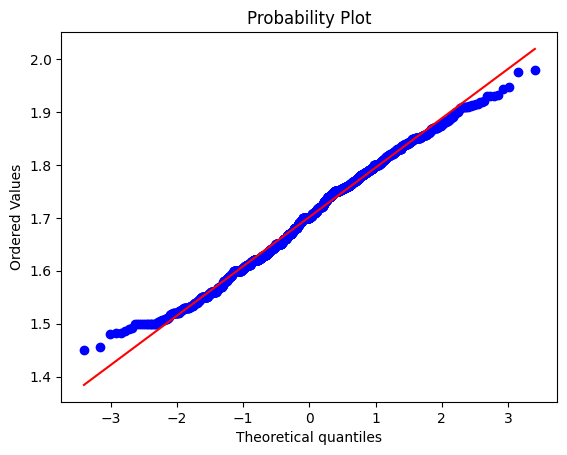

In [ ]:
stats.probplot(df["height"], plot=sns.mpl.pyplot)
plt.show()

- La variable Altura no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, especialmente en las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

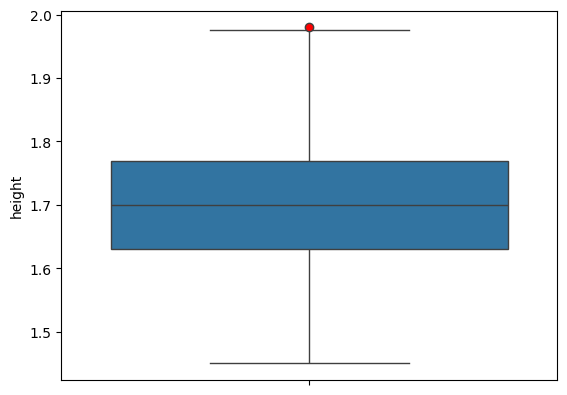

In [ ]:
sns.boxplot(df["height"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana de la altura es aproximadamente 1.70 metros, lo que significa que el 50% de los individuos tienen una altura menor o igual a 1.70 metros, y el otro 50% tienen una altura mayor o igual a 1.70 metros.
- El rango intercuartil (IQR) de la altura está entre aproximadamente 1.62 y 1.78 metros, lo que indica que el 50% central de las alturas se encuentra en este rango. Esto sugiere una concentración bastante homogénea de alturas.
- Los valores se extienden desde aproximadamente 1.45 hasta 1.98 metros, mostrando una distribución relativamente amplia.
- Se observa un outlier por encima del rango superior, representado por un punto rojo, que indica un individuo con una altura significativamente mayor al grueso de la distribución.
- La caja del boxplot (que representa el 50% central de los datos) es muy compacta, lo que sugiere una concentración muy homogénea de alturas alrededor de 1.70 metros.


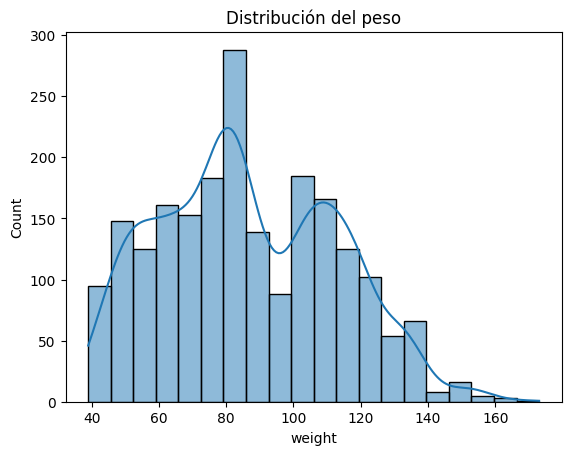

In [ ]:
# Analizamos la variable weight (PESO)
sns.histplot(df["weight"], bins=20, kde=True)
plt.title("Distribución del peso")
plt.show()

- La distribución del peso muestra una forma aproximadamente normal, con un pico principal alrededor de los 80-90 kg y una clara simetría.
- El rango principal de peso se extiende aproximadamente desde los 60 kg hasta los 110 kg, con la mayor concentración de individuos en este intervalo.
- Se observa una disminución gradual en la frecuencia a medida que nos alejamos del pico central, tanto hacia los pesos más bajos como hacia los más altos.
- Hay una cola más larga hacia la derecha (pesos más altos), lo que sugiere la presencia de algunos individuos con sobrepeso u obesidad.
- El pico más alto de la distribución está entre 80-90 kg, indicando que esta es la franja de peso más común en el conjunto de datos.
- Los extremos de la distribución (por debajo de 40 kg y por encima de 140 kg) tienen muy pocos casos, representando individuos con pesos considerablemente fuera del rango típico.
- La forma de la distribución sugiere que, aunque no es una distribución normal perfecta, se aproxima bastante a una curva normal, con una concentración central y disminución simétrica hacia ambos extremos.
- La variabilidad en el peso es significativa, reflejando la diversidad de la población estudiada en términos de composición corporal.

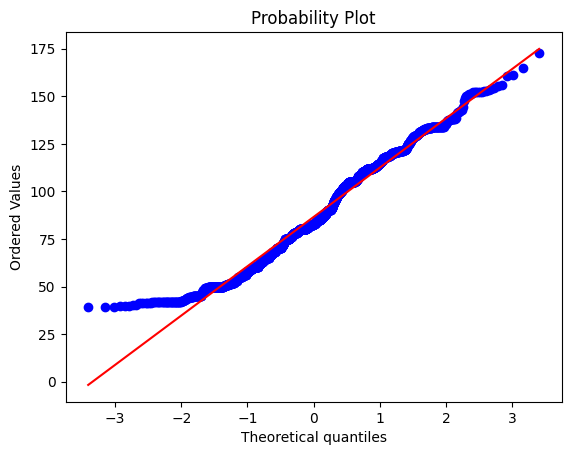

In [ ]:
stats.probplot(df["weight"], plot=sns.mpl.pyplot)
plt.show()

- La variable Altura no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, especialmente en las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

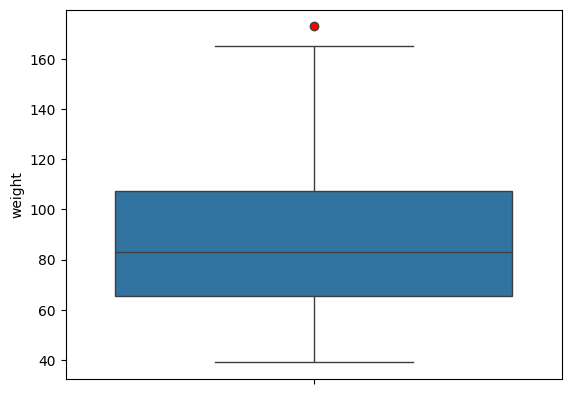

In [ ]:
sns.boxplot(df["weight"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana del peso es aproximadamente 83 kg, lo que significa que el 50% de los individuos tienen un peso menor o igual a 83 kg, y el otro 50% tienen un peso mayor o igual a 83 kg.
- El rango intercuartil (IQR) del peso está entre aproximadamente 65 y 100 kg, lo que indica que el 50% central de los pesos se encuentra en este rango. Esto sugiere una variabilidad considerable en el peso de los individuos.
- Los valores se extienden desde aproximadamente 39 hasta 173 kg, mostrando una distribución muy amplia.
- Se observa un outlier por encima del rango superior, representado por un punto rojo, que indica un individuo con un peso significativamente mayor al grueso de la distribución.
- La caja del boxplot (que representa el 50% central de los datos) es relativamente grande, lo que sugiere una dispersión importante de pesos.


In [ ]:
# Analizamos la variable FCVC (Frecuencia de consumo de verduras) la categorizamos para visualizarla de forma mas clara

df['fcvc_catego'] = pd.cut(df['fcvc'],
                             bins = sorted([1.0, 1.50, 1.80, df['fcvc'].max()]), #DUDA OJO
                             labels=['bajo', 'regular', 'alto'],
                             right=True, include_lowest=True, duplicates='drop')

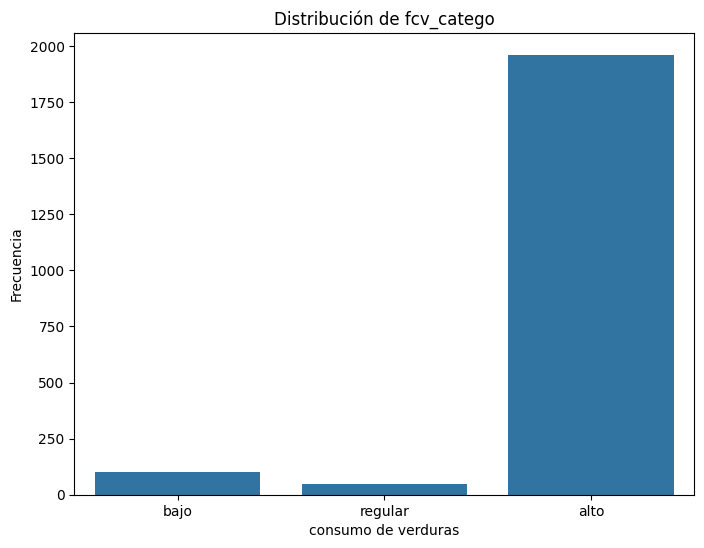

In [ ]:
# Visualizamos FCVC (Frecuencia de consumo de verduras)
plt.figure(figsize=(8, 6))
sns.countplot(x='fcvc_catego', data=df)
plt.title('Distribución de fcv_catego')
plt.xlabel('consumo de verduras')
plt.ylabel('Frecuencia')
plt.show()

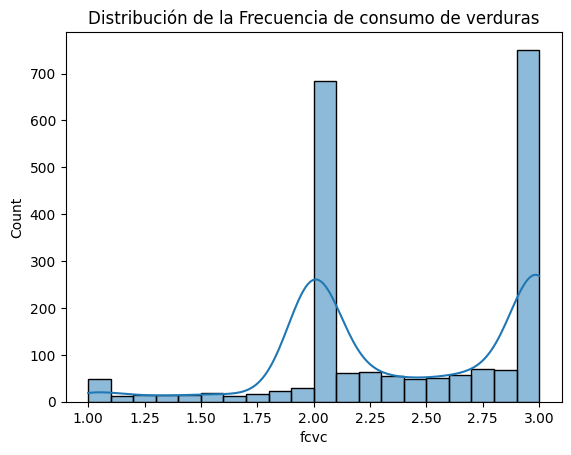

In [ ]:
sns.histplot(df["fcvc"], bins=20, kde=True)
plt.title("Distribución de la Frecuencia de consumo de verduras")
plt.show()

- La distribución muestra tres puntos de concentración principales, con dos picos muy claros alrededor de los valores 2.0 y 3.0.
- El primer pico importante está en 2.0, indicando que un número significativo de individuos consume verduras de manera moderada.
- Un segundo pico muy pronunciado se encuentra en 3.0, lo que sugiere que un gran número de personas reporta un consumo alto de verduras.
- Hay una distribución muy baja en los valores cercanos a 1.0, lo que implica que son pocos los individuos que reportan un consumo muy bajo de verduras.
- La distribución no es simétrica y no sigue una distribución normal clásica, presentando más bien una forma bimodal con concentración en los valores medios y altos.
- La curva de densidad sugiere que la mayoría de los individuos tienden a consumir verduras de manera moderada a alta (entre 2.0 y 3.0).
- La variabilidad es relativamente baja, con la mayoría de los datos concentrados en un rango estrecho entre 2.0 y 3.0.
- El patrón de distribución podría indicar que la población estudiada tiene una conciencia relativamente alta sobre el consumo de verduras, o que el estudio fue realizado en un contexto donde se promueve una alimentación saludable.

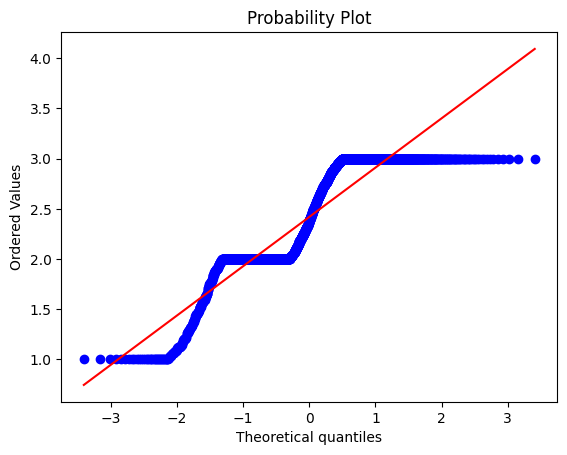

In [ ]:
stats.probplot(df["fcvc"], plot=sns.mpl.pyplot)
plt.show()

- La variable Frecuencia de consumo de verduras no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, tanto puntos centrales como las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

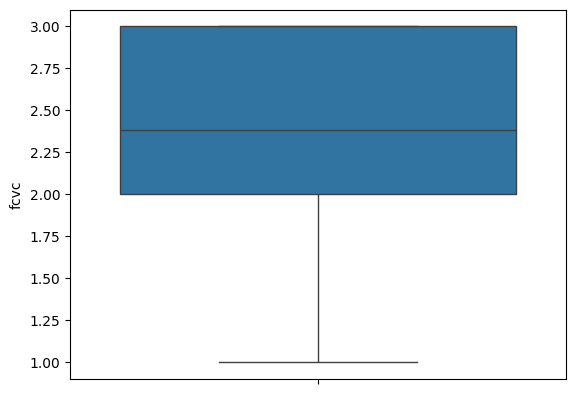

In [ ]:
sns.boxplot(df["fcvc"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana del consumo de verduras es aproximadamente 2.5, lo que significa que el 50% de los individuos tienen una frecuencia de consumo de verduras menor o igual a 2.5, y el otro 50% tienen una frecuencia mayor o igual a 2.5.
- El rango intercuartil (IQR) del consumo de verduras está entre aproximadamente 2.0 y 3.0, lo que indica que el 50% central de las frecuencias se encuentra en este rango. Esto sugiere una concentración relativamente alta de consumo de verduras.
- Los valores se extienden desde 1.0 hasta 3.0, mostrando un rango completo de las posibles frecuencias de consumo.
- No parece haber outliers.
- La caja del boxplot (que representa el 50% central de los datos) es amplia, pero concentrada en valores altos, lo que sugiere que la mayoría de los individuos reportan un consumo moderado a alto de verduras.

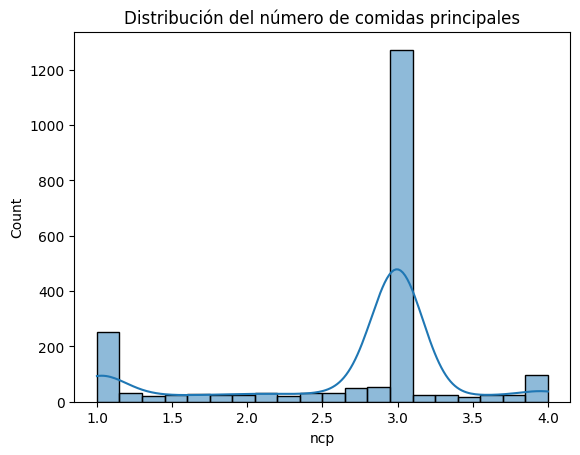

In [ ]:
# Analizamos la variable NCP (Número de comidas principales)
sns.histplot(df["ncp"], bins=20, kde=True)
plt.title("Distribución del número de comidas principales")
plt.show()

- La distribución muestra un pico principal muy marcado alrededor de 3 comidas principales, lo que sugiere que esta es la frecuencia más común en la población estudiada.
- El histograma presenta una distribución asimétrica, con una concentración clara en 3 comidas diarias.
- Hay una cantidad considerable de individuos con 2 comidas principales, aunque significativamente menos que los que reportan 3 comidas.
- Los valores extremos de 1 y 4 comidas tienen frecuencias mucho más bajas, representando casos menos comunes.
- La curva de densidad superpuesta muestra una forma que se aproxima a una distribución normal, pero con un sesgo hacia la izquierda.
- La mayoría de los individuos se agrupan entre 2 y 3 comidas principales por día, lo que parece reflejar un patrón alimenticio típico.
- Los valores en los extremos (1 y 4 comidas) son relativamente raros, lo que indica que la mayoría de las personas mantiene un patrón de alimentación similar.
- La distribución sugiere una cierta homogeneidad en los hábitos alimenticios de la población estudiada, con una clara preferencia por las 3 comidas principales diarias.

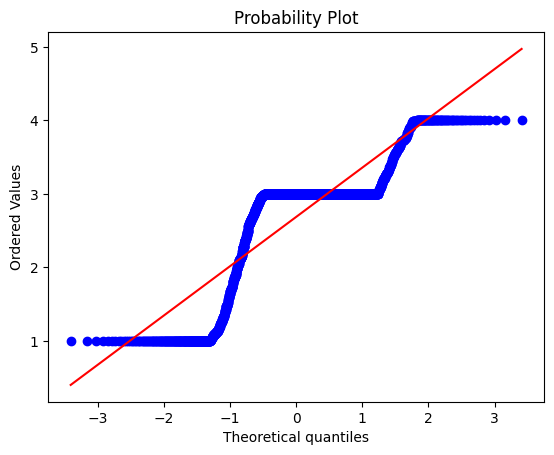

In [ ]:
stats.probplot(df["ncp"], plot=sns.mpl.pyplot)
plt.show()

- La variable Número de Comidas Principales no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, tanto puntos centrales como las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

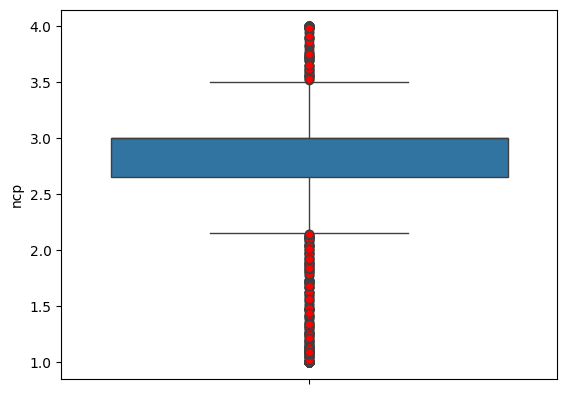

In [ ]:
sns.boxplot(df["ncp"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana del número de comidas principales es 3, lo que significa que el 50% de los individuos tienen 3 o menos comidas principales, y el otro 50% tienen 3 o más comidas principales.
- El rango intercuartil (IQR) del número de comidas está entre aproximadamente 2 y 4, lo que indica que el 50% central de los individuos realizan entre 2 y 4 comidas principales.
- Los valores se extienden desde 1 hasta 4 comidas principales, mostrando un rango completo de las posibles frecuencias de comidas.
- Se observan outliers tanto en el límite inferior como en el superior, representados por puntos rojos, que indican individuos con números de comidas significativamente diferentes a la distribución principal.
- La caja del boxplot (que representa el 50% central de los datos) es amplia pero centrada alrededor de 3 comidas, lo que sugiere que la mayoría de los individuos realizan 3 comidas principales.


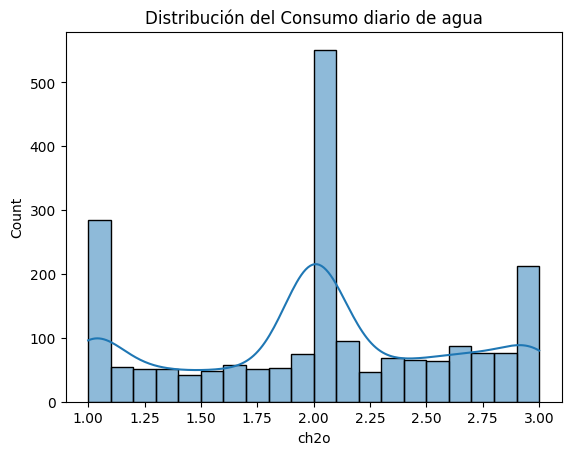

In [ ]:
# Analizamos la variable CH2O (Consumo diario de agua)
sns.histplot(df["ch2o"], bins=20, kde=True)
plt.title("Distribución del Consumo diario de agua")
plt.show()

- La distribución muestra varios puntos de concentración, con un pico principal alrededor de 2.0, indicando que este es el nivel de consumo de agua más común en la población estudiada.
- Existe una frecuencia significativa en los valores 1.0 y 3.0, creando una distribución trimodal con máximos en estos tres puntos.
- El pico más alto se encuentra en 2.0, lo que sugiere que la mayoría de los individuos consume una cantidad moderada de agua diariamente.
- Los valores de 1.0 y 3.0 también muestran frecuencias importantes, indicando variabilidad en los hábitos de consumo de agua.
- La distribución no sigue una forma de campana normal, sino que presenta múltiples picos.
- La curva de densidad superpuesta muestra una distribución compleja, con máximos en 1.0, 2.0 y 3.0.
- La variabilidad en el consumo de agua sugiere diferencias individuales significativas en los hábitos de hidratación.
- El patrón de distribución podría reflejar diferentes niveles de conciencia sobre la importancia de la hidratación o variaciones en el estilo de vida de los individuos.

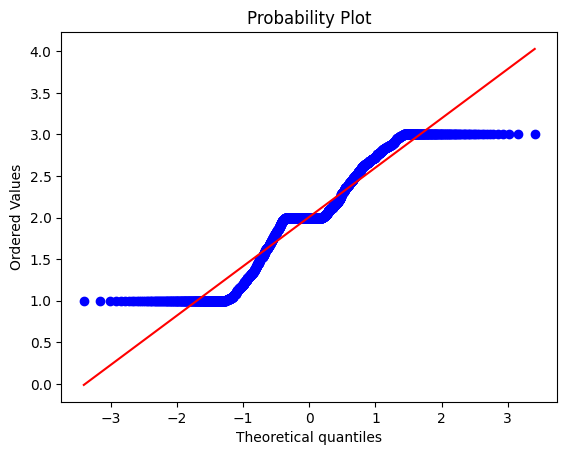

In [ ]:
stats.probplot(df["ch2o"], plot=sns.mpl.pyplot)
plt.show()

- La variable Consumo diario de agua no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, tanto puntos centrales como las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

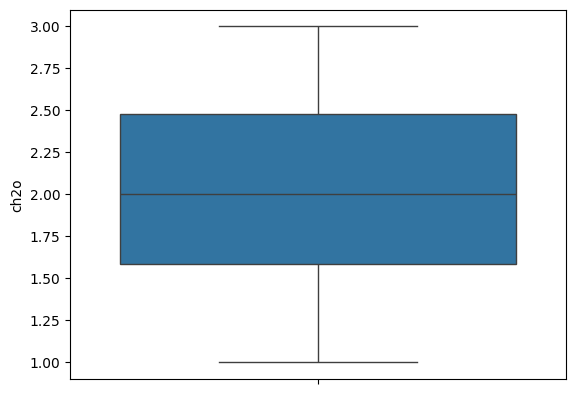

In [ ]:
sns.boxplot(df["ch2o"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana del consumo de agua es aproximadamente 2.0, lo que significa que el 50% de los individuos tienen un consumo de agua menor o igual a 2.0, y el otro 50% tienen un consumo mayor o igual a 2.0.
- El rango intercuartil (IQR) del consumo de agua está entre aproximadamente 1.5 y 2.5, lo que indica que el 50% central de los consumos se encuentra en este rango. Esto sugiere una variabilidad moderada en la ingesta de agua.
- Los valores se extienden desde 1.0 hasta 3.0, mostrando un rango completo de las posibles frecuencias de consumo de agua.
- No parece haber outliers.
- La caja del boxplot (que representa el 50% central de los datos) es amplia y centrada, lo que sugiere una distribución relativamente simétrica del consumo de agua.

In [ ]:
# Analizamos la variable FAF (Frecuencia de Actividad Física)
df.faf.unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [ ]:
df.faf =  df.faf.round(2)

In [ ]:
df.faf.min()

0.0

In [ ]:
df.faf.unique()

array([0.  , 3.  , 2.  , 1.  , 0.32, 1.54, 1.98, 0.1 , 1.59, 1.4 , 1.68,
       2.21, 1.32, 0.9 , 0.6 , 0.12, 0.35, 2.54, 0.2 , 1.6 , 0.75, 0.43,
       0.55, 1.3 , 1.49, 1.23, 1.66, 0.66, 0.54, 0.82, 0.19, 1.9 , 1.07,
       1.64, 2.87, 0.62, 1.44, 0.11, 0.29, 1.93, 0.99, 1.25, 0.52, 0.28,
       2.6 , 2.24, 2.46, 0.14, 0.65, 1.52, 1.37, 0.26, 2.78, 2.35, 2.04,
       0.87, 0.63, 2.2 , 0.07, 0.03, 0.68, 2.31, 2.01, 1.26, 1.24, 0.23,
       1.84, 0.83, 1.95, 0.95, 1.97, 1.55, 1.7 , 0.48, 0.13, 0.78, 0.17,
       1.16, 2.83, 1.88, 2.51, 0.37, 2.08, 0.77, 0.79, 1.1 , 1.61, 1.19,
       0.42, 1.42, 1.35, 0.21, 0.88, 1.85, 1.56, 1.29, 0.85, 0.53, 0.25,
       1.86, 1.51, 2.11, 0.49, 1.08, 1.62, 1.22, 2.03, 2.33, 2.41, 1.94,
       1.46, 2.7 , 0.61, 2.43, 0.04, 0.51, 0.06, 1.33, 0.98, 0.46, 0.02,
       0.05, 0.7 , 2.64, 0.92, 2.29, 2.57, 2.55, 2.02, 1.91, 1.36, 2.71,
       0.24, 0.69, 0.18, 0.56, 2.89, 0.93, 0.01, 1.81, 0.73, 0.34, 0.38,
       0.44, 0.94, 1.92, 0.15, 2.16, 2.06, 2.12, 1.

In [ ]:
# Analizamos la variable FAF (Frecuencia de actividad física), la categorIzamos para visualizarla de forma mas clara

df['faf_catego'] = pd.cut(df['faf'],
                          bins=sorted([df['faf'].min(), 1, 2, df['faf'].max()]),
                          labels=['baja', 'regular', 'alta'],
                          right=True,
                          include_lowest=True)


In [ ]:
df.faf_catego.isnull().sum()

np.int64(0)

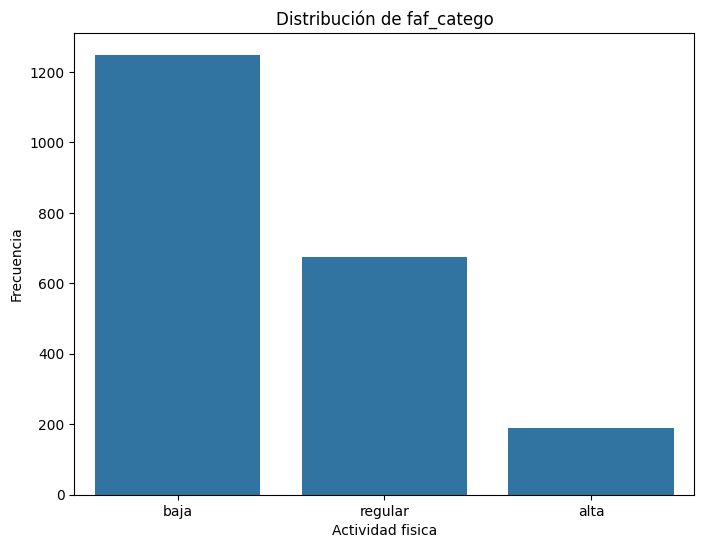

In [ ]:
# Visualizamos la variable faf_catego
plt.figure(figsize=(8, 6))
sns.countplot(x='faf_catego', data=df)
plt.title('Distribución de faf_catego')
plt.xlabel('Actividad fisica')
plt.ylabel('Frecuencia')
plt.show()

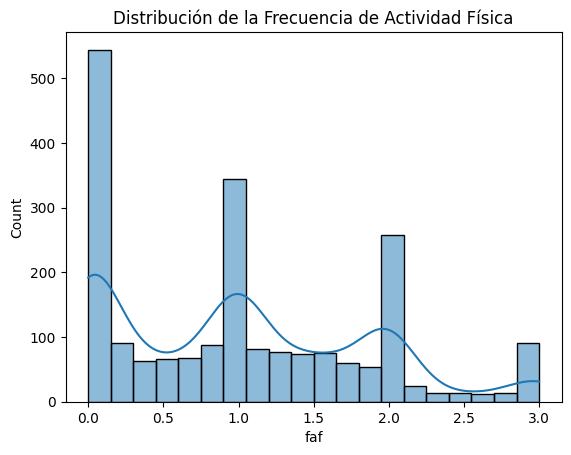

In [ ]:
sns.histplot(df["faf"], bins=20, kde=True)
plt.title("Distribución de la Frecuencia de Actividad Física")
plt.show()

- La distribución muestra una concentración muy alta en el valor 0, indicando que un número significativo de individuos reporta una frecuencia de actividad física muy baja o nula.
- Hay un segundo pico importante alrededor de 1.0-1.5, sugiriendo un grupo de personas con actividad física ligera o poco frecuente.
La distribución es claramente asimétrica y no sigue una forma de campana normal.
- Se observan frecuencias decrecientes a medida que aumenta la frecuencia de actividad física, con muy pocos individuos en los valores más altos (2.5-3.0).
- El alto número de individuos en 0 podría indicar un estilo de vida sedentario o la presencia de barreras para realizar actividad física regular.
- La curva de densidad muestra múltiples valles y picos, reflejando una gran variabilidad en los niveles de actividad física de la población.
- Los valores intermedios (entre 1.5 y 2.5) tienen frecuencias relativamente bajas, lo que sugiere una polarización entre individuos muy poco activos y aquellos con algo de actividad física.
- La distribución podría estar relacionada con factores como el estilo de vida urbano, condiciones de trabajo, o aspectos socioculturales que influyen en la actividad física.

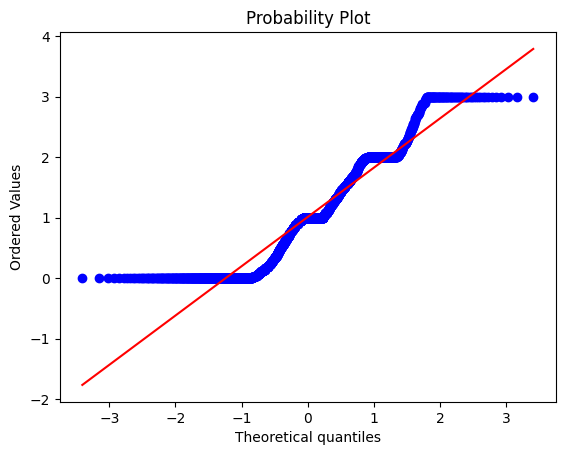

In [ ]:
stats.probplot(df["faf"], plot=sns.mpl.pyplot)
plt.show()

- La variable Frecuencia de Actividad Física no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, tanto puntos centrales como las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

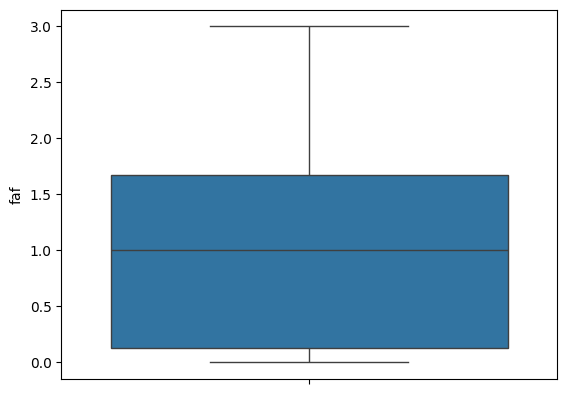

In [ ]:
sns.boxplot(df["faf"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana de la frecuencia de actividad física es aproximadamente 1.0, lo que significa que el 50% de los individuos tienen una frecuencia de actividad física menor o igual a 1.0, y el otro 50% tienen una frecuencia mayor o igual a 1.0.
- El rango intercuartil (IQR) de la actividad física está entre aproximadamente 0.5 y 1.5, lo que indica que el 50% central de las frecuencias se encuentra en este rango. Esto sugiere una concentración de niveles bajos a moderados de actividad física.
- Los valores se extienden desde 0 hasta 3.0, mostrando un rango completo de las posibles frecuencias de actividad física.
- No parece haber outliers..
- La caja del boxplot (que representa el 50% central de los datos) está más cercana a la parte inferior del rango, lo que sugiere que la mayoría de los individuos tienen niveles bajos de actividad física.

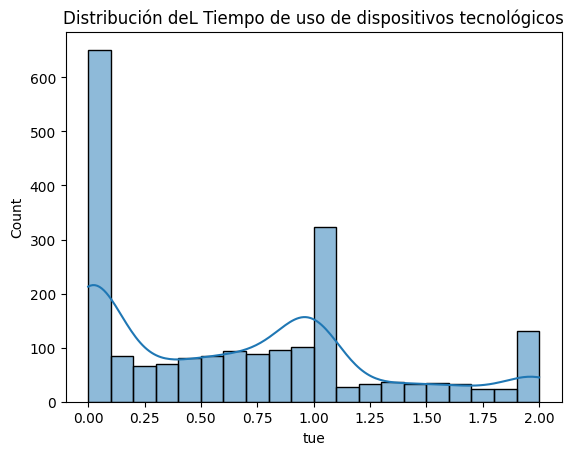

In [ ]:
# Analizamos la variable TUE (Tiempo de uso de dispositivos tecnológicos)
sns.histplot(df["tue"], bins=20, kde=True)
plt.title("Distribución deL Tiempo de uso de dispositivos tecnológicos")
plt.show()

- La distribución muestra una concentración muy alta en el valor 0, indicando que un número significativo de individuos reporta un uso mínimo o nulo de dispositivos tecnológicos.
- Hay un segundo pico importante alrededor de 1.0, sugiriendo un grupo de personas con un uso moderado de dispositivos tecnológicos.
- La distribución es claramente asimétrica y no sigue una forma de campana normal.
- Se observan frecuencias decrecientes a medida que aumenta el tiempo de uso de dispositivos tecnológicos, con pocos individuos en los valores más altos (cercanos a 2.0).
- El alto número de individuos en 0 podría indicar una variedad de comportamientos, desde restricción deliberada hasta falta de acceso a tecnología.
- La curva de densidad muestra múltiples valles y picos, reflejando una gran variabilidad en el uso de dispositivos tecnológicos.
- Los valores intermedios (entre 1.0 y 1.5) tienen frecuencias moderadas, lo que sugiere un uso variado de dispositivos tecnológicos.
- La distribución podría estar relacionada con factores como la edad, ocupación, nivel socioeconómico o preferencias personales en cuanto al uso de tecnología.

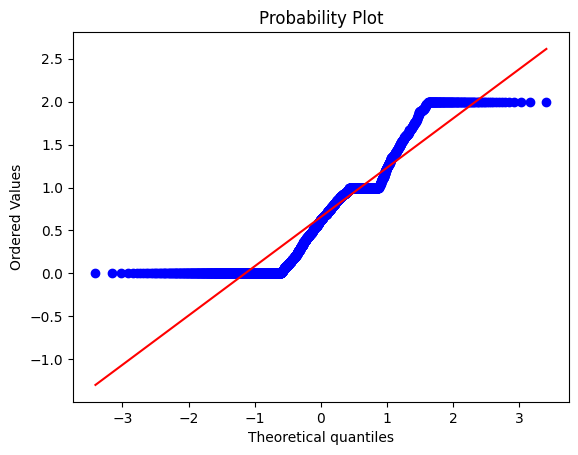

In [ ]:
stats.probplot(df["tue"], plot=sns.mpl.pyplot)
plt.show()

- La variable Tiempo de uso de dispositivos tecnológicos no tiene una distribución normal ya que los puntos se desvian de la linea de referencia, tanto puntos centrales como las colas (los extremos).

- Esa desviación puede ser por valores extremos o atípicos.

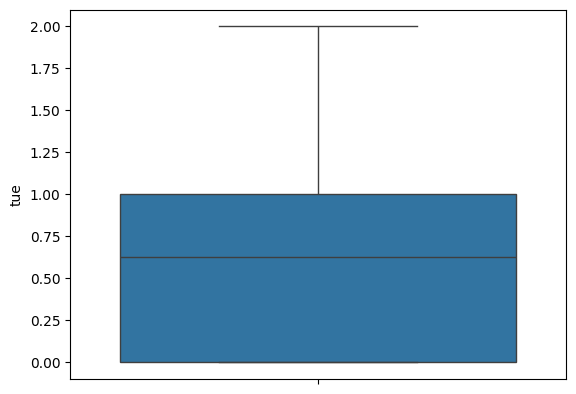

In [ ]:
sns.boxplot(df["tue"], showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()

- La mediana del tiempo de uso de dispositivos tecnológicos es aproximadamente 0.75, lo que significa que el 50% de los individuos tienen un tiempo de uso menor o igual a 0.75, y el otro 50% tienen un tiempo de uso mayor o igual a 0.75.
- El rango intercuartil (IQR) del tiempo de uso está entre aproximadamente 0.25 y 1.0, lo que indica que el 50% central de los tiempos de uso se encuentra en este rango. Esto sugiere una variabilidad moderada en el uso de dispositivos tecnológicos.
- Los valores se extienden desde 0 hasta 2.0, mostrando un rango completo de los posibles tiempos de uso.
- No parece haber outliers.
- La caja del boxplot (que representa el 50% central de los datos) está sesgada hacia la parte inferior, lo que sugiere que la mayoría de los individuos tienen tiempos de uso relativamente bajos.

## Análisis de variables categóricas

In [ ]:
# Analizamos la variable genero

(df.gender.value_counts(dropna = False) / len(df)).round(2)

gender
Male      0.51
Female    0.49
Name: count, dtype: float64

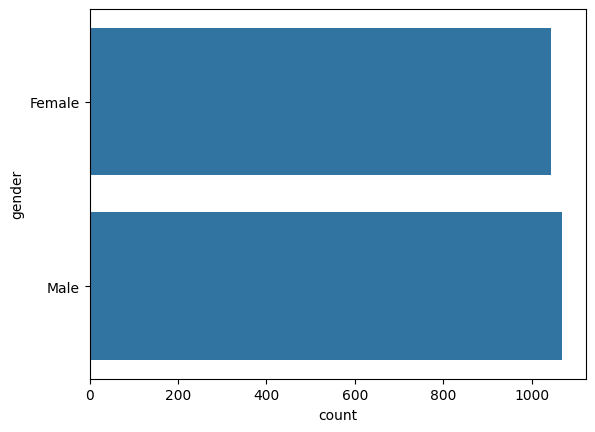

In [ ]:
sns.countplot(df['gender'])
plt.show()

- La distribución de los géneros es bastante equilibrada, con ambas categorías hombres y mujeres teniendo recuentos ligeramente superiores a 1000. Esto sugiere que hay una representación casi equitativa de los dos géneros en el conjunto de datos.

- Aunque ambos géneros están bien representados, la categoría "Male" tiene una cuenta ligeramente mayor que la categoría "Female.

In [ ]:
def draw_piechar(data:pd.DataFrame, col: str, legend:bool=False) -> None:
  vc = df[col].value_counts().reset_index()
  keys = vc[col].to_list()
  values = vc['count'].to_list()

  plt.pie(values, labels=keys, autopct='%0.2f%%')
  if legend:
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
  plt.show()

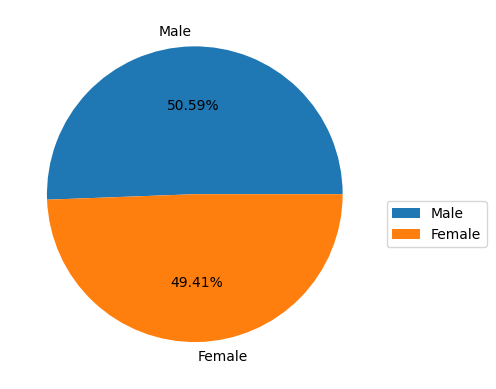

In [ ]:
draw_piechar(df, 'gender', True)

- El género masculino es el más predominante, representando el 50,59% de la muestra.

- El género femenino representa el 49,41%.

In [ ]:
# Analizamos como esta distribuido el dataset en funcion de CALC (INGESTA CALORICA)
(df.calc.value_counts(dropna = False) / len(df)).round(2)

calc
Sometimes     0.66
no            0.30
Frequently    0.03
Always        0.00
Name: count, dtype: float64

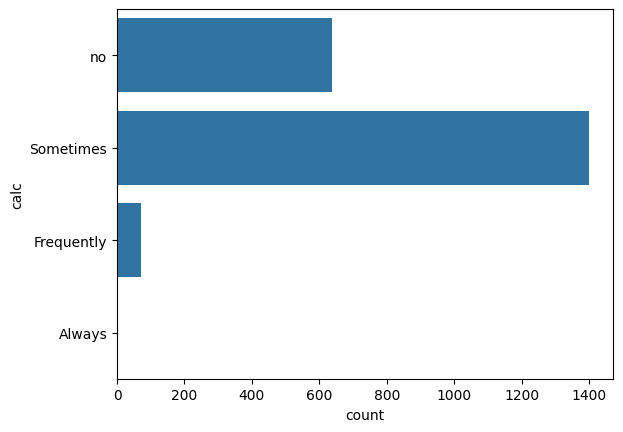

In [ ]:
sns.countplot(df['calc'])
plt.show()

- La categoría "Sometimes" (A veces) es claramente la más común, con aproximadamente 1,400 individuos. Esto sugiere que la mayoría de las personas en el conjunto de datos tienen un consumo calórico ocasional o moderado.
- La categoría "no" (sin consumo especial) es la segunda más frecuente, con alrededor de 600 individuos, lo que indica un grupo significativo de personas con un consumo calórico básico o restringido.
- "Frequently" (Frecuentemente) tiene una representación muy pequeña, con menos de 100 individuos, lo que sugiere que un número muy limitado de personas consume calorías de manera frecuente o en grandes cantidades.
- La categoría "Always" (Siempre) es casi insignificante, con muy pocos individuos, lo que indica que casi nadie reporta un consumo calórico constante o excesivo.
- La distribución muestra una clara polarización entre quienes tienen un consumo calórico ocasional y quienes mantienen un consumo más básico o restringido, con muy pocos individuos en los extremos de consumo frecuente o constante.


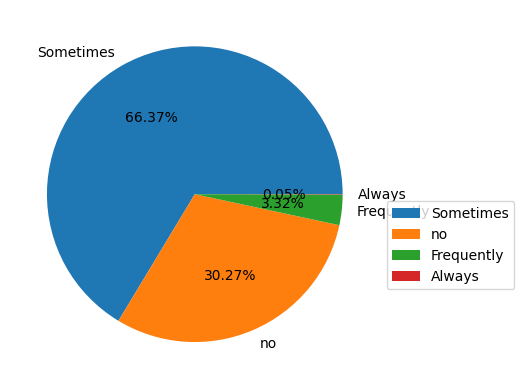

In [ ]:
draw_piechar(df, 'calc', True)

- La categoría "Sometimes" (A veces) es la más representativa, con un 66.37% de la población.
- La categoría "no" representa el 30.27% de los individuos.
- "Frequently" (Frecuentemente) tiene un 3.32% de representación.
- La categoría "Always" (Siempre) es la menos frecuente, con apenas un 0.04% de la población.
- Esta distribución sugiere que:

  - La mayoría de las personas tiene un consumo calórico ocasional
  - Un grupo significativo reporta un consumo calórico mínimo o nulo
  - Muy pocos individuos reportan un consumo calórico frecuente o constante

- Los patrones de ingesta calórica podrían reflejar:

  - Variabilidad en los hábitos alimenticios
  - Diferentes niveles de conciencia nutricional
  - Diversidad de estilos de vida y rutinas alimentarias

- La predominancia del consumo ocasional indica una tendencia hacia un comportamiento alimenticio moderado en la población estudiada.

In [ ]:
# Vamos a analizar la variable FAVC (Consumo frecuente de alimentos ricos en calorías.) vs output

print("Proporción de output por FAVC:")
favc_output = pd.crosstab(df['favc'], df['nobeyesdad'], normalize='index').round(2)
print(favc_output)

Proporción de output por FAVC:
nobeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
favc                                                             
no                         0.21           0.32            0.04   
yes                        0.12           0.11            0.18   

nobeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
favc                                                                
no                     0.03              0.00                0.09   
yes                    0.16              0.17                0.14   

nobeyesdad  Overweight_Level_II  
favc                             
no                         0.30  
yes                        0.12  


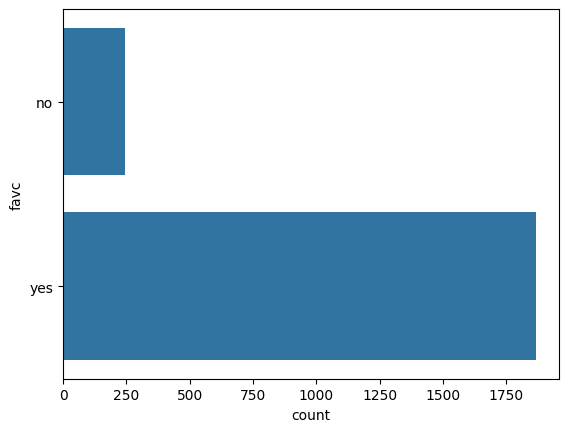

In [ ]:
sns.countplot(df['favc'])
plt.show()

- La categoría "yes" (sí) domina la distribución, con aproximadamente 1,750 individuos. Esto indica que una gran mayoría de las personas en el conjunto de datos consume frecuentemente alimentos de alta densidad calórica.
- La categoría "no" tiene una representación mucho menor, con alrededor de 250 individuos, lo que sugiere que solo una pequeña parte de la población evita el consumo frecuente de alimentos de alta densidad calórica.
- La distribución es extremadamente desequilibrada, con una proporción de casi 7:1 entre quienes consumen frecuentemente estos alimentos y quienes no lo hacen.
- Este patrón sugiere un comportamiento alimenticio generalizado que incluye el consumo frecuente de alimentos con alto contenido calórico.
- La prevalencia del "sí" podría estar relacionada con factores como:

  - Accesibilidad de alimentos de alta densidad calórica
  - Preferencias culturales o personales
  - Estilo de vida moderno
  - Posibles limitaciones económicas o de tiempo para opciones alimenticias más saludables


- El alto consumo de alimentos de alta densidad calórica podría ser un factor de riesgo importante para problemas de obesidad en esta población.



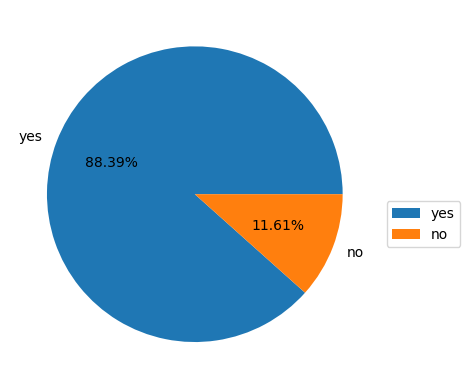

In [ ]:
draw_piechar(df, 'favc', True)

- La categoría "yes" representa el 88.39% de la población.
- La categoría "no" representa solo un 11.61% de los individuos.
- Esta distribución sugiere que:

  - Una gran mayoría de la población consume frecuentemente alimentos de alta densidad calórica
  - Solo una pequeña proporción evita este tipo de alimentos


- La alta prevalencia de consumo de alimentos de alta densidad calórica podría indicar:

  - Accesibilidad de estos alimentos
  - Preferencias culturales o personales
  - Posibles limitaciones económicas o de tiempo para opciones alimenticias más saludables
  - Influencia de la cultura alimentaria actual


In [ ]:
# Vamos a analizar la variable SCC (Consumo de bebidas dulces) vs output

print("Proporción de output por scc:")
scc_output = pd.crosstab(df['scc'], df['nobeyesdad'], normalize='index').round(2)
print(scc_output)

Proporción de output por scc:
nobeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
scc                                                              
no                         0.12           0.13            0.17   
yes                        0.23           0.31            0.02   

nobeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
scc                                                                 
no                     0.15              0.16                0.13   
yes                    0.01              0.00                0.39   

nobeyesdad  Overweight_Level_II  
scc                              
no                         0.14  
yes                        0.04  


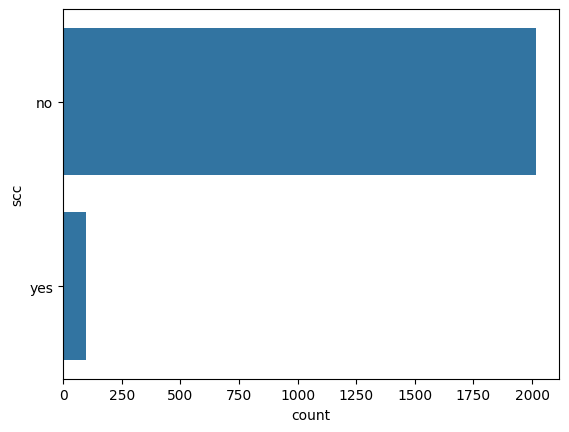

In [ ]:
sns.countplot(df['scc'])
plt.show()

- La categoría "no" es abrumadoramente dominante, con aproximadamente 2,000 individuos. Esto indica que una gran mayoría de las personas en el conjunto de datos no consume bebidas dulces o las consume muy raramente.
- La categoría "yes" tiene una representación muy pequeña, con alrededor de 100 individuos, lo que sugiere que solo una pequeña fracción de la población consume bebidas dulces de manera regular.
- La distribución es extremadamente desequilibrada, con una proporción de casi 20:1 entre quienes no consumen bebidas dulces y quienes sí lo hacen.
- Este patrón sugiere que el consumo de bebidas dulces no es una práctica común en esta población.
- Las razones para la baja tasa de consumo de bebidas dulces podrían incluir:

  - Mayor conciencia sobre los efectos de las bebidas azucaradas
  - Preferencias por otras bebidas
  - Posibles recomendaciones de salud o dieta
  - Factores culturales o económicos


- La baja prevalencia de consumo de bebidas dulces podría ser un factor positivo en términos de salud nutricional de la población estudiada.



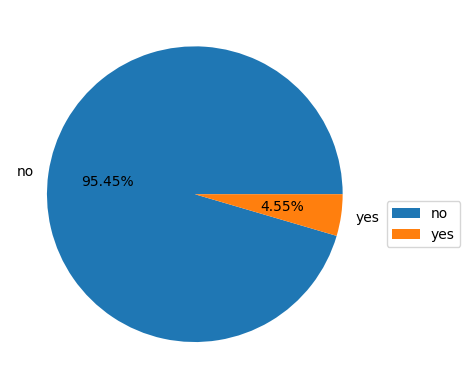

In [ ]:
draw_piechar(df, 'scc', True)

- La categoría "no" representa el 95.45% de la población.
- La categoría "yes" representa solo un 4.55% de los individuos.
- Esta distribución sugiere que:

  - Una inmensa mayoría de la población no consume bebidas dulces
  - Solo una pequeña minoría reporta consumir bebidas dulces

- La distribución podría reflejar:

  - Mayor conciencia sobre los efectos negativos del azúcar
  - Preferencias por bebidas más saludables
  - Posibles recomendaciones dietéticas
  - Cambios en los hábitos de consumo

- La gran diferencia entre ambas categorías indica una tendencia muy marcada hacia la no ingesta de bebidas dulces.
- Esta distribución sugiere un comportamiento alimenticio relativamente saludable en términos de consumo de bebidas azucaradas en la población estudiada.

In [ ]:
# Vamos a analizar la variable smoke
(df.smoke.value_counts(dropna = False) / len(df)).round(2)

smoke
no     0.98
yes    0.02
Name: count, dtype: float64

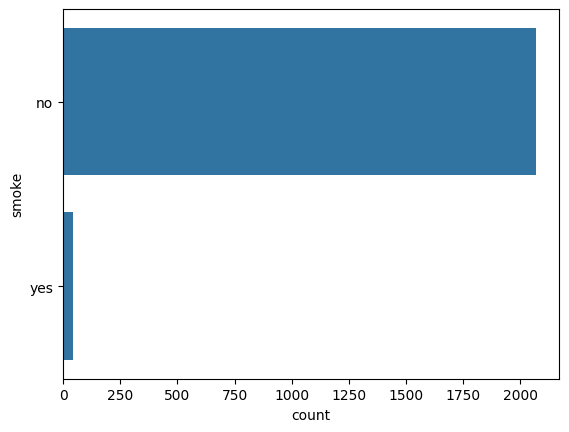

In [ ]:
sns.countplot(df['smoke'])
plt.show()

- La categoría "no" es abrumadoramente dominante, con aproximadamente 2,000 individuos. Esto indica que una gran mayoría de las personas en el conjunto de datos no fuma.
- La categoría "yes" tiene una representación casi insignificante, con alrededor de 50 individuos, lo que sugiere que solo una pequeña fracción muy reducida de la población consume tabaco.
- La distribución es extremadamente desequilibrada, con una proporción de cerca de 40:1 entre no fumadores y fumadores.
- Este patrón sugiere que el consumo de tabaco es muy poco común en esta población.
- Las razones para la baja tasa de consumo de tabaco podrían incluir:

  - Mayor conciencia sobre los riesgos para la salud
  - Campañas de prevención del tabaquismo
  - Posibles restricciones en entornos sociales o laborales
  - Cambios culturales en las percepciones sobre el tabaco


- La muy baja prevalencia de fumadores podría ser un indicador positivo de hábitos saludables en la población estudiada.


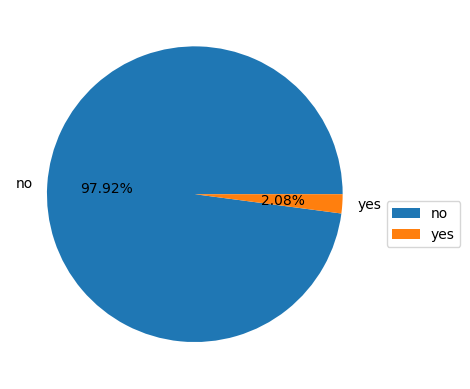

In [ ]:
draw_piechar(df, 'smoke', True)

- La categoría "no" representa el 97.92% de la población, dominando el gráfico.
- La categoría "yes" representa solo un 2.08% de los individuos.
- Esta distribución totalmente desequilibrada sugiere que:

  - Una inmensa mayoría de la población no fuma
  - Solo una pequeña minoría reporta consumo de tabaco

- La distribución podría reflejar:

  - Alta conciencia sobre los riesgos para la salud
  - Efectividad de campañas antitabaco
  - Posibles restricciones sociales o legales sobre el consumo de tabaco
  - Cambios culturales en las percepciones sobre el tabaquismo

Esta distribución sugiere un comportamiento saludable en términos de consumo de tabaco en la población estudiada.

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

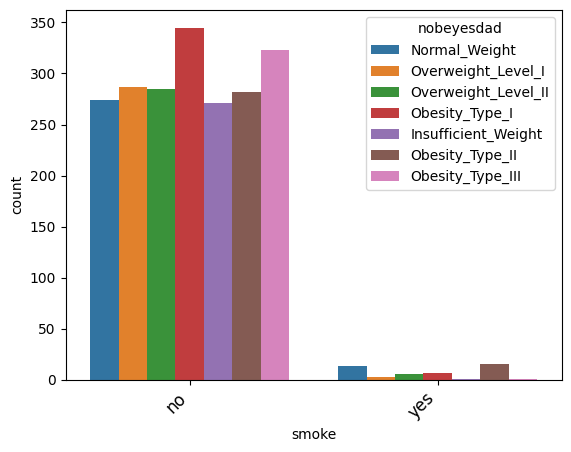

In [ ]:
## Barplots de smoke con varibale nobeyesdad

sns.countplot(data = df, x = 'smoke', hue = 'nobeyesdad',
              order= df['smoke'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=12)

In [ ]:
# Analizamos como esta distribuido el dataset en funcion de family_history_with_overweight
(df.family_history.value_counts(dropna = False) / len(df)).round(2)

family_history
yes    0.82
no     0.18
Name: count, dtype: float64

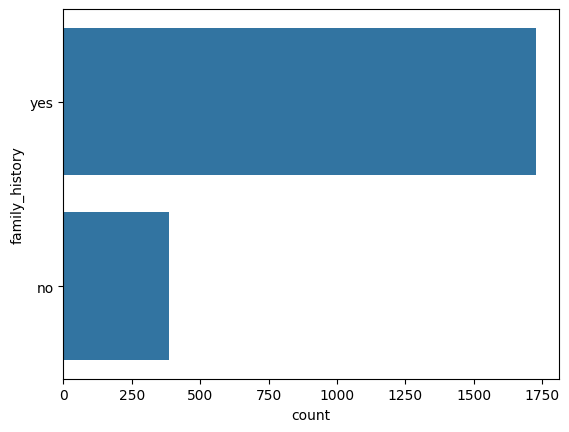

In [ ]:
sns.countplot(df['family_history'])
plt.show()

- La categoría "yes" es claramente dominante, con aproximadamente 1,700 individuos. Esto indica que una gran mayoría de las personas en el conjunto de datos tiene antecedentes familiares de sobrepeso.
- La categoría "no" tiene una representación significativamente menor, con alrededor de 400 individuos, lo que sugiere que solo una pequeña parte de la población no tiene antecedentes familiares de sobrepeso.
- La distribución es muy desequilibrada, con una proporción de aproximadamente 4:1 entre quienes tienen antecedentes familiares de sobrepeso y quienes no los tienen.
- Este patrón sugiere que los antecedentes familiares de sobrepeso son muy comunes en esta población.
- Las implicaciones de esta distribución podrían incluir:

  - Posible componente genético en la predisposición al sobrepeso
  - Influencia de hábitos familiares en la alimentación y estilo de vida
Mayor riesgo potencial de obesidad para aquellos con antecedentes familiares


- La alta prevalencia de antecedentes familiares de sobrepeso podría ser un factor importante a considerar en estudios de obesidad y salud nutricional.


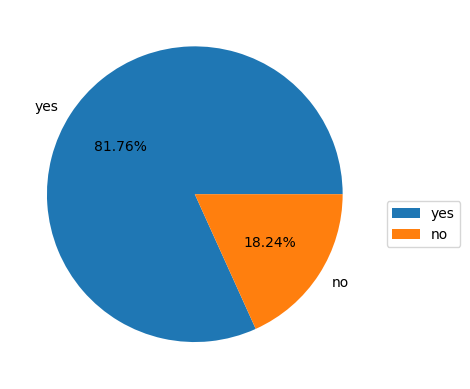

In [ ]:
draw_piechar(df, 'family_history', True)

- La categoría "yes" representa el 81.75% de la población, dominando claramente el gráfico.
- La categoría "no" representa solo un 18.25% de los individuos.
- Esta distribución muy desequilibrada sugiere que:

  - Una gran mayoría de la población tiene antecedentes familiares de sobrepeso
  - Solo una pequeña proporción no tiene estos antecedentes familiares


- La alta prevalencia de antecedentes familiares de sobrepeso podría indicar:

  - Posible componente genético importante
  - Influencia de hábitos familiares en el peso
  - Factores ambientales y de estilo de vida compartidos en las familias

- Esta distribución sugiere que el sobrepeso podría tener un fuerte componente familiar en la población estudiada.


In [ ]:
# Vamos a analizar la variable family_history_with_overweight vs output

print("Proporción de output por family_history:")
family_history_output = pd.crosstab(df['family_history'], df['nobeyesdad'], normalize='index').round(2)
print(family_history_output)

Proporción de output por family_history:
nobeyesdad      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
family_history                                                       
no                             0.38           0.34            0.02   
yes                            0.07           0.09            0.20   

nobeyesdad      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
family_history                                                          
no                         0.00              0.00                0.21   
yes                        0.17              0.19                0.12   

nobeyesdad      Overweight_Level_II  
family_history                       
no                             0.05  
yes                            0.16  


In [ ]:
# Vamos a analizar la variable CAEC (Consumo de alimentos entre comidas) vs output

print("Proporción de output por CAEC: ")
CAEC_output = pd.crosstab(df['caec'], df['nobeyesdad'], normalize='index').round(2)
print(CAEC_output)

Proporción de output por CAEC: 
nobeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
caec                                                             
Always                     0.04           0.66            0.11   
Frequently                 0.50           0.34            0.02   
Sometimes                  0.08           0.09            0.19   
no                         0.06           0.20            0.02   

nobeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
caec                                                                
Always                 0.04              0.00                0.09   
Frequently             0.00              0.00                0.06   
Sometimes              0.17              0.18                0.13   
no                     0.02              0.00                0.69   

nobeyesdad  Overweight_Level_II  
caec                             
Always                     0.06  
Frequently                 0.07  
Sometimes           

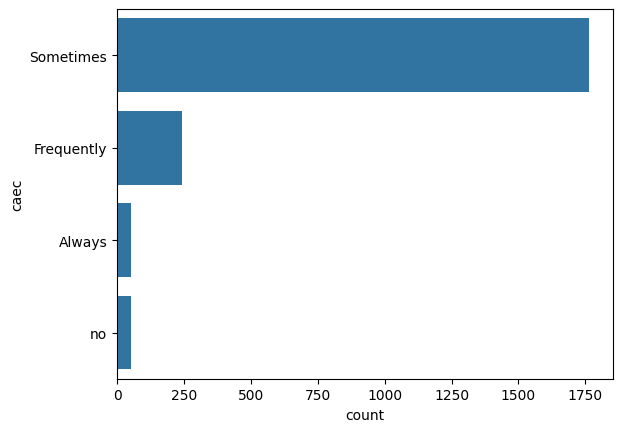

In [ ]:
sns.countplot(df['caec'])
plt.show()

- La categoría "Sometimes" (A veces) es abrumadoramente dominante, con aproximadamente 1,750 individuos. Esto indica que la mayoría de las personas en el conjunto de datos consume alimentos entre comidas de manera ocasional.
- La categoría "Frequently" (Frecuentemente) tiene una representación mucho menor, con alrededor de 250 individuos, lo que sugiere que solo una parte limitada de la población consume alimentos entre comidas de manera regular.
- La categoría "Always" (Siempre) tiene una representación muy pequeña, con aproximadamente 50 individuos, indicando que muy pocas personas reportan un consumo constante de alimentos entre comidas.
- La categoría "no" tiene una representación casi marginal, con alrededor de 50 individuos, lo que sugiere que casi nadie reporta no consumir alimentos entre comidas.
- La distribución muestra un patrón de consumo de alimentos entre comidas principalmente ocasional, con variaciones en la frecuencia.
- Este patrón podría reflejar:

  - Hábitos alimenticios flexibles
  - Posibles diferencias en los horarios de trabajo o estudio
  - Variabilidad en los patrones de apetito y nutrición


- La predominancia del consumo ocasional de alimentos entre comidas podría ser un factor relevante en los patrones de alimentación y nutrición de esta población.

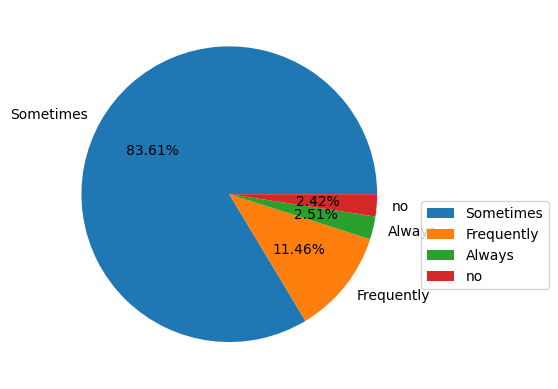

In [ ]:
draw_piechar(df, 'caec', True)

- La categoría "no" representa el 95.45% de la población, dominando completamente el gráfico.
- La categoría "yes" representa solo un 4.55% de los individuos.

- La distribución podría reflejar:

  - Hábitos alimenticios estructurados
  - Disciplina nutricional
  - Posibles restricciones dietéticas
  - Diferencias culturales en patrones de alimentación

- La gran diferencia entre ambas categorías indica una tendencia muy marcada hacia el no consumo de alimentos entre comidas.


([0, 1, 2, 3],
 [Text(0, 0, 'Sometimes'),
  Text(1, 0, 'Frequently'),
  Text(2, 0, 'Always'),
  Text(3, 0, 'no')])

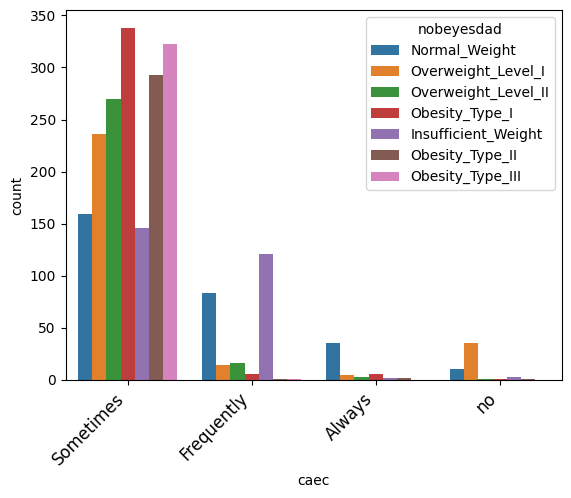

In [ ]:
## Barplots de CAEC (Consumo de alimentos entre comidas)

sns.countplot(data = df, x = 'caec', hue = 'nobeyesdad',
              order= df['caec'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=12)

In [ ]:
# Analizamos como esta distribuido el dataset en funcion de MTRANS: Método de transporte.
(df.mtrans.value_counts(dropna = False) / len(df)).round(2)

mtrans
Public_Transportation    0.75
Automobile               0.22
Walking                  0.03
Motorbike                0.01
Bike                     0.00
Name: count, dtype: float64

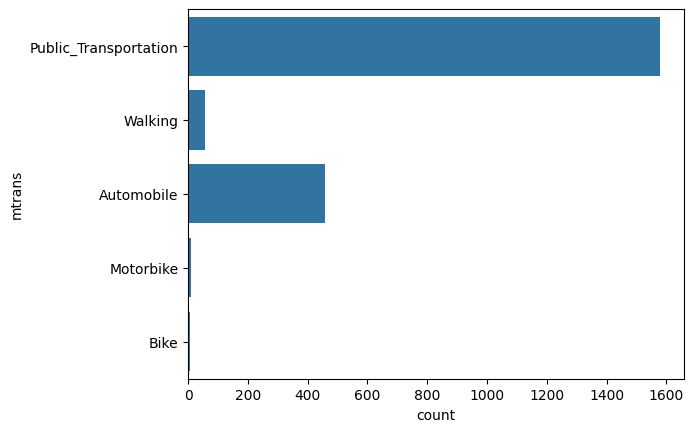

In [ ]:
sns.countplot(df['mtrans'])
plt.show()

- La categoría "Public_Transportation" (Transporte Público) es claramente dominante, con aproximadamente 1,580 individuos. Esto indica que la gran mayoría de las personas en el conjunto de datos utiliza transporte público como medio principal de desplazamiento.
- "Automobile" (Automóvil) es la segunda categoría más frecuente, con alrededor de 457 individuos, lo que sugiere que un grupo significativo utiliza automóvil como medio de transporte.
- "Walking" (Caminando) tiene una representación mucho menor, con aproximadamente 56 individuos, indicando que relativamente pocas personas caminan como medio principal de transporte.
- Las categorías "Motorbike" (Motocicleta) y "Bike" (Bicicleta) tienen una representación casi marginal, con 11 y 7 individuos respectivamente.
- La distribución refleja un patrón de movilidad urbana con predominio del transporte público, seguido por el uso de automóviles.
- Este patrón de transporte podría estar relacionado con:

  - Infraestructura urbana
  - Costos de transporte
  - Disponibilidad de servicios públicos
  - Densidad poblacional


- La alta utilización del transporte público sugiere un contexto urbano o suburbano con buena infraestructura de transporte colectivo.

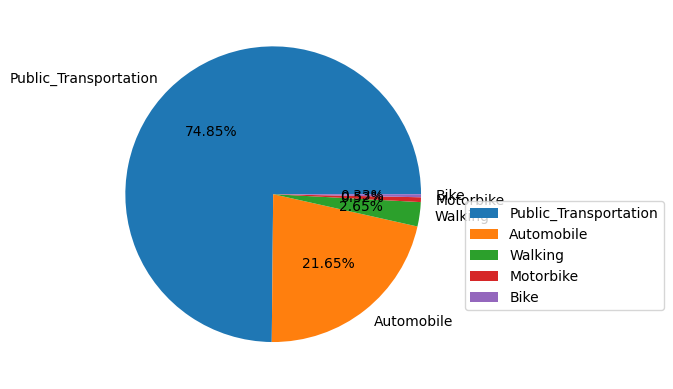

In [ ]:
draw_piechar(df, 'mtrans', True)



- La categoría "no" domina el gráfico, representando el 95.45% de la población.
- La categoría "yes" representa solo un 4.55% de los individuos.
- Esta distribución extremadamente desequilibrada sugiere que:

  - Hay una categoría de transporte principal muy predominante
  - Una pequeña minoría utiliza un medio de transporte alternativo o secundario

- La gran diferencia entre ambas categorías podría estar relacionada con:

  - Infraestructura de transporte
  - Condiciones socioeconómicas
  - Características urbanas o rurales del entorno

In [ ]:
# Analizamos como esta distribuido el dataset en funcion de Nobeyesdad: Nivel de obesidad.
(df.nobeyesdad.value_counts(dropna = False) / len(df)).round(2)

nobeyesdad
Obesity_Type_I         0.17
Obesity_Type_III       0.15
Obesity_Type_II        0.14
Overweight_Level_I     0.14
Overweight_Level_II    0.14
Normal_Weight          0.14
Insufficient_Weight    0.13
Name: count, dtype: float64

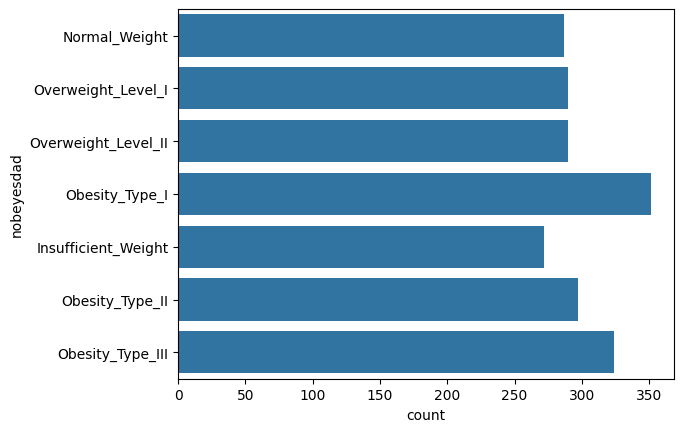

In [ ]:
sns.countplot(df['nobeyesdad'])
plt.show()

- La distribución de niveles de obesidad muestra una variación relativamente equilibrada, con algunas diferencias notables entre categorías.
- "Obesity_Type_I" tiene la frecuencia más alta, con aproximadamente 350 individuos, lo que sugiere que este es el tipo de obesidad más común en el conjunto de datos.
- "Obesity_Type_III" y "Overweight_Level_II" le siguen en frecuencia, cada uno con alrededor de 300 individuos.
- "Normal_Weight", "Overweight_Level_I" e "Insufficient_Weight" tienen frecuencias similares, entre 250 y 300 individuos.
- "Obesity_Type_II" tiene una frecuencia ligeramente menor, con aproximadamente 250 individuos.
- La distribución sugiere que:

  - No hay una categoría de peso completamente dominante
  - Hay una representación significativa de individuos con diferentes niveles de peso
  - Los tipos de obesidad y sobrepeso son bastante comunes en la población estudiada


- La variedad de categorías indica la complejidad de los patrones de peso en esta población.
- La presencia relativamente equilibrada de diferentes categorías podría reflejar:

  - Diversidad de factores que influyen en el peso
  - Variabilidad en estilos de vida y hábitos alimenticios
  - Posibles diferencias individuales en metabolismo y composición corporal


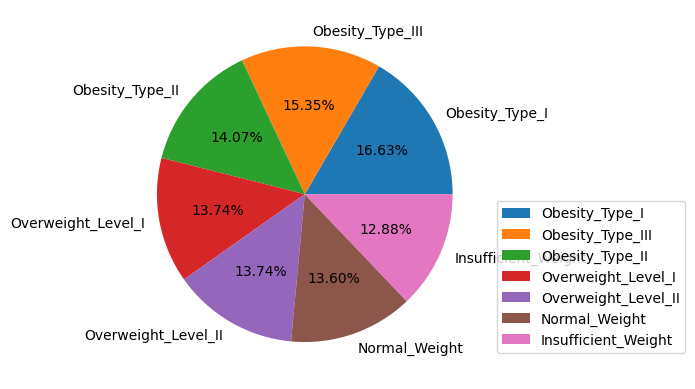

In [ ]:
draw_piechar(df, 'nobeyesdad', True)

- "Obesity_Type_I" es la categoría más representativa, con un 16.63% de la población, lo que sugiere que este tipo de obesidad es ligeramente más común.
- "Obesity_Type_III" le sigue en importancia, representando el 15.35% de los individuos, indicando un grupo significativo con obesidad severa.
- "Obesity_Type_II" y "Overweight_Level_I" tienen porcentajes muy similares, alrededor del 14.07% y 13.74% respectivamente.
- "Overweight_Level_II" también presenta un porcentaje similar, del 13.74% de la población.
- "Normal_Weight" representa el 12.88% de los individuos, siendo la categoría con menor representación.
- "Insufficient_Weight" tiene un porcentaje del 12.89%, muy cercano al de peso normal.
- La distribución sugiere que:

  - Aproximadamente un tercio de la población (alrededor del 45%) está en alguna categoría de obesidad
  - Otro tercio está en categorías de sobrepeso
  - Solo cerca del 13% se encuentra en un rango de peso considerado normal


- Esta distribución indica una prevalencia significativa de problemas de peso en la población estudiada, con una mayoría de individuos fuera del rango de peso considerado saludable.

# Analisis Bivariable

### Aux functions

In [ ]:
def calculate_cramer_v(df: pd.DataFrame, cat1: str, cat2: str) -> float:
    # create a contingency table
    contingency_table = pd.crosstab(df[cat1], df[cat2])

    # perform chi-square contingency test and retrieve chi2_stat
    chi2_stat, _, _, _ = chi2_contingency(contingency_table)

    # calculate Cramer V
    total_count = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)

    cramers_v = np.sqrt(chi2_stat / (total_count * (min_dim - 1)))
    return cramers_v

In [ ]:
def calculate_kruskal_pvalue(df: pd.DataFrame, cat: str, cont: str) -> float:
    # first create groups
    grouped_data = [group[cont] for _, group in df.groupby(cat)]
    _,p_value = kruskal(*grouped_data)
    return p_value

In [ ]:
def run_conover(df: pd.DataFrame, cat: str, cont: str)-> pd.DataFrame:
    grouped_data = [(cat_, group[cont]) for cat_, group in df.groupby(cat)]
    groups = [g[1] for g in grouped_data]
    categories = [g[0] for g in grouped_data]

    corr_matrix = posthoc_conover(groups, p_adjust='bonferroni')
    corr_matrix.columns = categories
    corr_matrix.set_index(pd.Index(categories), inplace=True)
    return corr_matrix < 0.05

### Separamos variable continuas y categoricas

In [ ]:
cat_cols = df.select_dtypes(include=object).columns.to_list()
cont_cols = df.select_dtypes(include=np.number).columns.to_list()

print(cat_cols)
print(cont_cols)

['gender', 'calc', 'favc', 'scc', 'smoke', 'family_history', 'caec', 'mtrans', 'nobeyesdad']
['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue']


#### Análisis continuas vs continuas

In [ ]:
normal_pvalues = {col: [normaltest(df[col], nan_policy='omit').pvalue] for col in cont_cols}

print(pd.DataFrame(normal_pvalues).T < 0.05)

           0
age     True
height  True
weight  True
fcvc    True
ncp     True
ch2o    True
faf     True
tue     True


## Correlaciones

In [ ]:
# Calculamos la matriz de correlacion

corr_pearson = df.corr(numeric_only=True, method='pearson')
corr_spearman = df.corr(numeric_only=True, method='spearman')

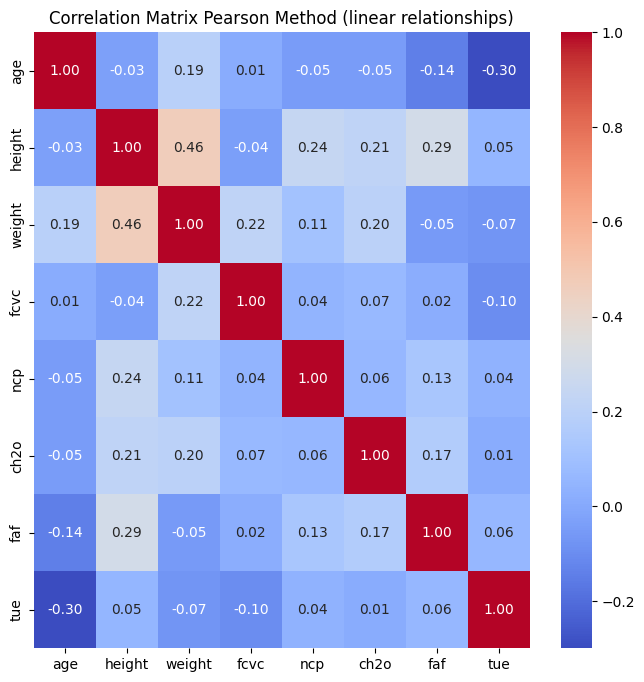

In [ ]:
# Para visualizarlo mejor hacemos un heatmap de ambos metodos para ver si tenemos correlaciones monotonicas o de otro tipo

plt.figure(figsize=(8, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Pearson Method (linear relationships)')
plt.show()


- La mayoría de las variables tienen correlaciones muy débiles entre sí
- No se observan correlaciones muy fuertes o determinantes
- Sugiere que las variables son relativamente independientes entre sí

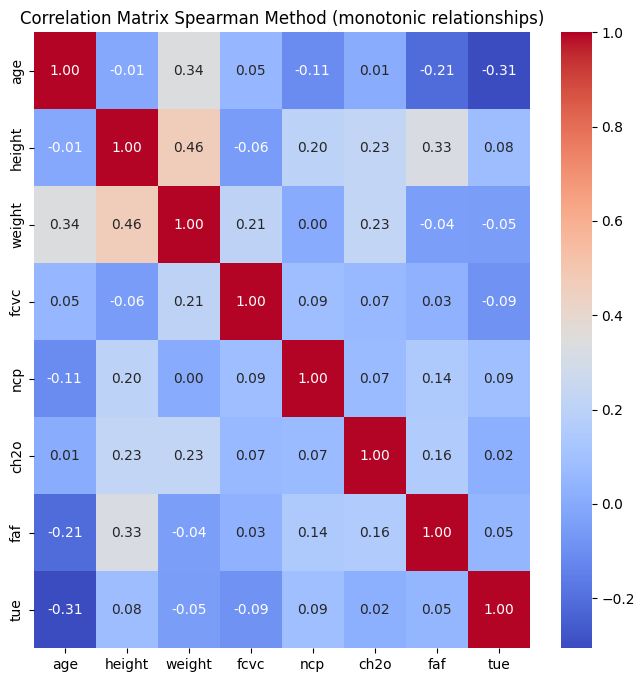

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Spearman Method (monotonic relationships)')
plt.show()

Observamos que no hay correlaciones importantes más allá de la del peso con la altura que es de 0.46 lo cual tampoco es un valor a tener en cuenta

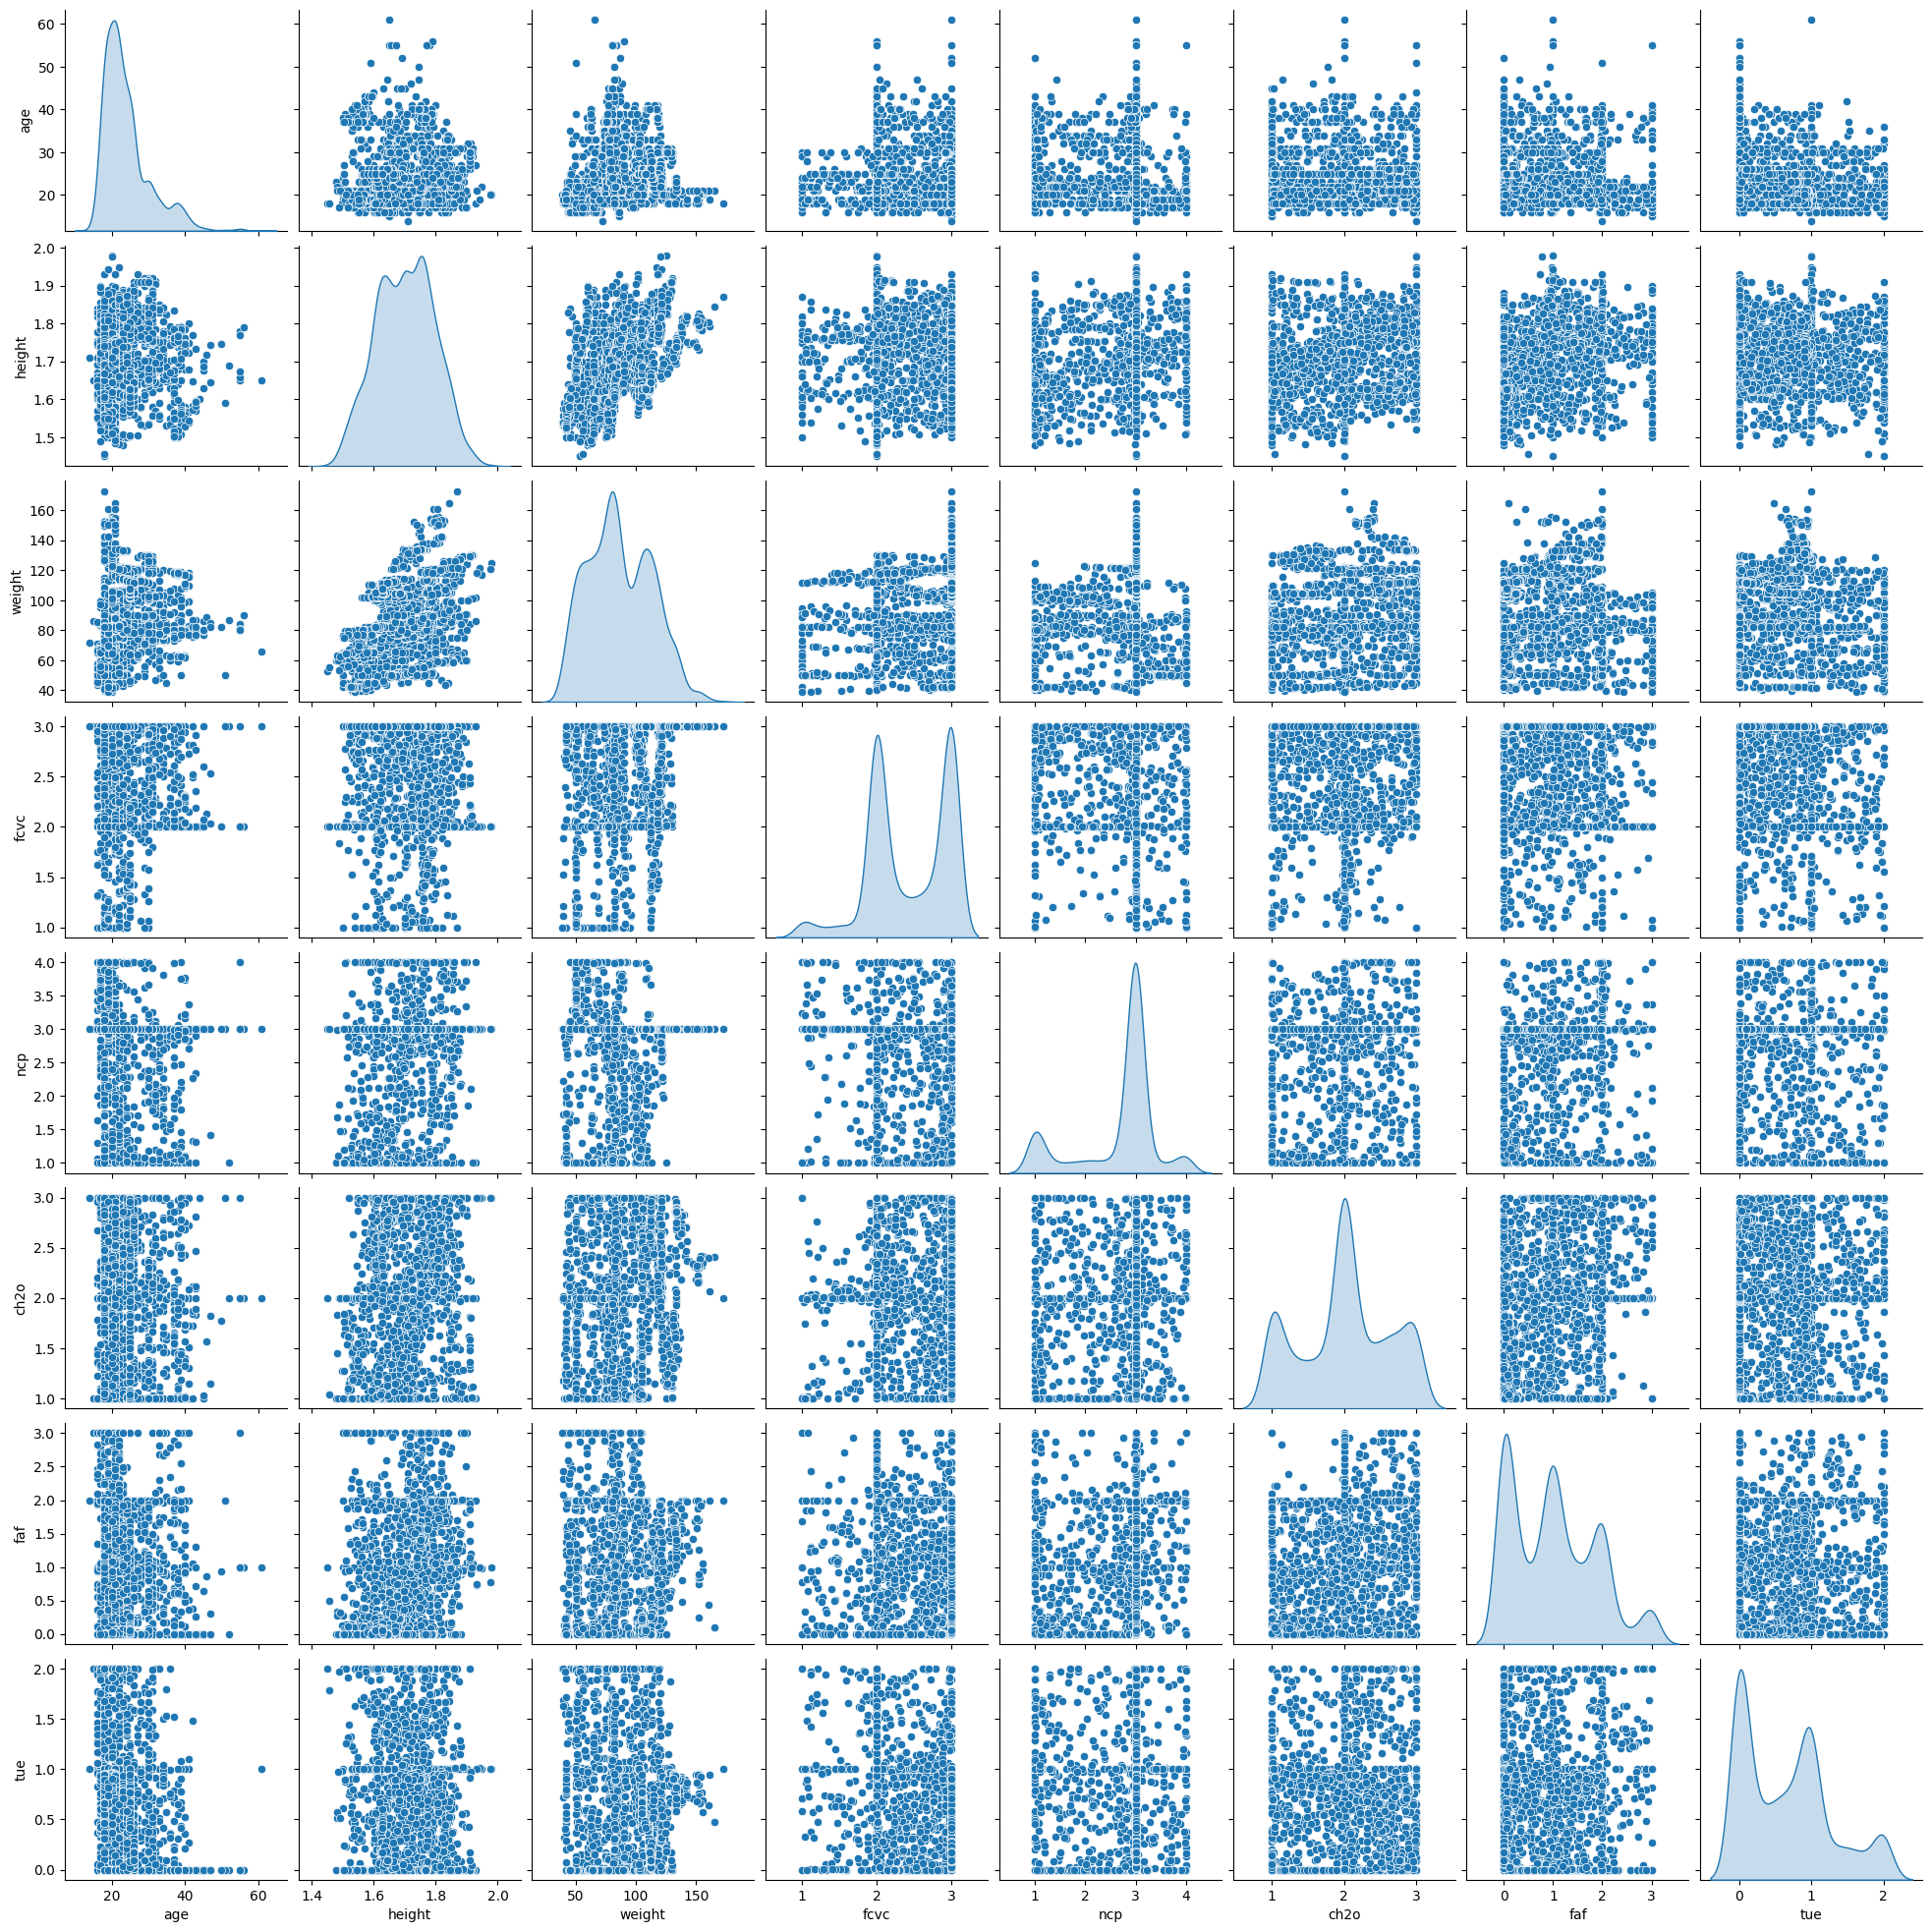

In [ ]:
#Genaramos una matriz de graficos para verlo de manera mas visual

sns.pairplot(df, vars = df.select_dtypes(include="number").columns , diag_kind='kde')
plt.show()

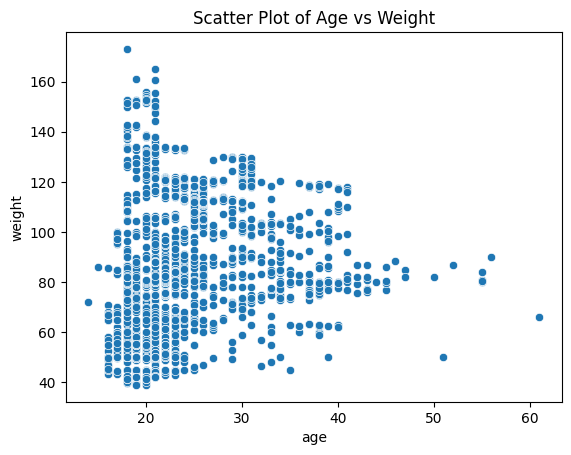

In [ ]:
# Scatter plot
sns.scatterplot(x="age", y="weight", data=df)
plt.title("Scatter Plot of Age vs Weight")
plt.show()

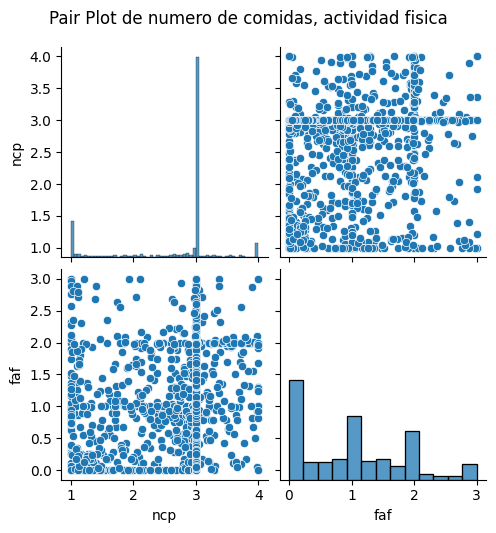

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["ncp", "faf"])
plt.suptitle("Pair Plot de numero de comidas, actividad fisica", y=1.05)
plt.show()

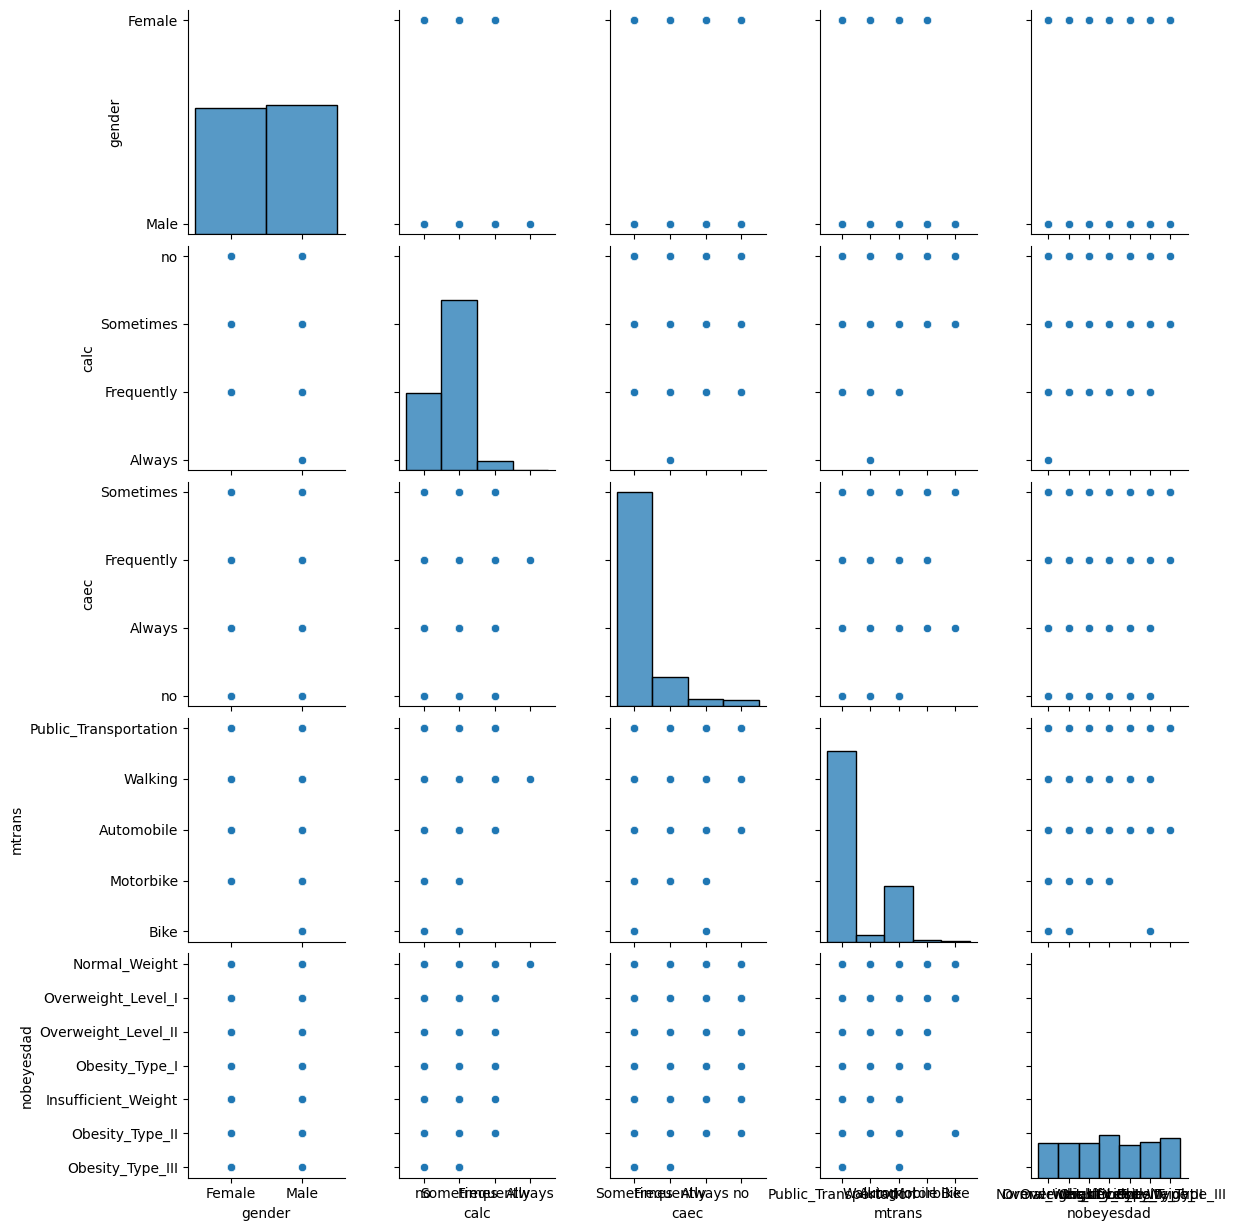

In [ ]:
sns.pairplot(data=df, vars=['gender', 'calc', 'caec', 'mtrans', 'nobeyesdad'])
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [ ]:
#Definimos una funcion para crear una matriz de correlacion con Cramen para usarla posteriormente en los modelos de ML

def cramers_V(var1,var2) :
  confusion_matrix = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

  #stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  #obs = np.sum(crosstab) # Number of observations
  #mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  #return (stat/(obs*mini))

def cramers_correlation_matrix(data_encoded):
  rows= []
  for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
      cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
      col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
    rows.append(col)

  cramers_results = np.array(rows)

  df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

  return df

In [ ]:
corr = cramers_correlation_matrix(df)

### Análisis continuas vs categoicas

Como no tenemos variables continuas con una distribución normal, utilizaremos la prueba de kruskal-wallis para comparar variables continuas frente a variables categóricas

In [ ]:
df.describe()

age       height       weight         fcvc          ncp  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     23.972525     1.701677    86.586058     2.419043     2.685628   
std       6.308664     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.000000     1.630000    65.473343     2.000000     2.658738   
50%      22.000000     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              ch2o          faf          tue  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010313     0.657866  
std       0.612953     0.850613     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.125000     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.670000     1.000000  
max       3.000000     3.000000     2.000000

In [ ]:
# Convertimos todo a minuscula y limpiamos antes y despues
df.columns= df.columns.str.lower().str.strip()

# Quitamos todos los caracteres diacriticos
df.columns = [unidecode(col) for col in df.columns]

#Vemos que al variable age y faf tiene valores con decimales por lo que la convertimos en enteros
df.age = df.age.astype(int)

#Renombramos la variable family_history_with_overweight
df.rename(columns={'family_history_with_overweight': 'family_history'}, inplace=True)

#Convertimos la variable favc, ssc, smoke y Family history of overweight en bolleanas
to_bool = ['favc', 'scc', 'smoke' , 'family_history']

for col in to_bool:
 df[col] = df[col].astype(bool)


# Kruskal-wallis

Realizamos un analisis con kruskal-wallis enstre las variables CAEC: Consumption of food between meals y la variable weight (peso), para determinar si se cumple o no la hipotesis nula (la población media de todos los grupos son iguales.)

In [ ]:
df['caec'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [ ]:
from scipy.stats import normaltest

pvalue = normaltest(df['weight'], nan_policy='omit').pvalue
if pvalue < 0.05:
  print("no tiene una distribución normal")

no tiene una distribución normal


Continuamos con Kruscal ya que Anova no es apropiado para variables no normales

In [ ]:
from scipy.stats import kruskal

# separate data in different "groups" depending on the value of the categorical column.
grouped_data = [group['weight'] for _, group in df.groupby('caec')]

# run the test
h_statistic, p_value = kruskal(*grouped_data, nan_policy='omit')

print(f"p_value is: {p_value}")

if p_value < 0.05:
  print('Existen diferencias entre las personas que comen entre horas con respecto a su peso')
else:
  print('No existen diferencias entre las personas que comen entre horas con respecto a su peso')

p_value is: 1.0048018456925384e-85
Existen diferencias entre las personas que comen entre horas con respecto a su peso


Realizamos el mismo testo con la variable faf (Frecuencia de actividad física.)

In [ ]:
df.faf_catego.unique()

['baja', 'alta', 'regular']
Categories (3, object): ['baja' < 'regular' < 'alta']

In [ ]:
grouped_data = [group['nobeyesdad'] for _, group in df.groupby('faf_catego')]

# run the test
h_statistic, p_value = kruskal(*grouped_data, nan_policy='omit')

print(f"p_value is: {p_value}")

if p_value < 0.05:
  print('Existen diferencias entre las personas que realizan actividad fisica con respecto a su nivel de obesidad')
else:
  print('No existen diferencias entre las personas que realizan actividad fisica con respecto  a su nivel de obesidad')


p_value is: 2.1475528901849602e-06
Existen diferencias entre las personas que realizan actividad fisica con respecto a su nivel de obesidad


<ipython-input-458-108add791ef3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group['nobeyesdad'] for _, group in df.groupby('faf_catego')]


Para comprobar que grupos en particular son diferentes podemos usar post-hoc

In [ ]:
%pip install scikit-posthocs

In [ ]:
#Comparamos los grupos que pican entre otras con su nivel de obesidad

grouped_data = [(cat, group['nobeyesdad']) for cat, group in df.groupby('caec')]
groups = [g[1] for g in grouped_data]
categories = [g[0] for g in grouped_data]

pvalue_matrix = posthoc_conover(groups, p_adjust='bonferroni')
pvalue_matrix.columns = categories
pvalue_matrix = pvalue_matrix.set_index(pd.Index(categories))
pvalue_matrix < 0.05

Always  Frequently  Sometimes     no
Always       False       False       True   True
Frequently   False       False       True   True
Sometimes     True        True      False  False
no            True        True      False  False

Podemos concluir que hay una SI diferencia significativa en cuanto al nivel de obesidad entre los grupos que pican entre horas y los que no. Excepto el grupo que pica algunas veces el cual no tiene gran diferencia con los que no pican nunca.
Igual que el grupo que pica frecuentemente no tiene diferencias con el que pica siempre.


In [ ]:
#Comparamos los grupos que pican entre otras con su peso

grouped_data = [(cat, group['weight']) for cat, group in df.groupby('caec')]
groups = [g[1] for g in grouped_data]
categories = [g[0] for g in grouped_data]

pvalue_matrix = posthoc_conover(groups, p_adjust='bonferroni')
pvalue_matrix.columns = categories
pvalue_matrix = pvalue_matrix.set_index(pd.Index(categories))
pvalue_matrix < 0.05

Always  Frequently  Sometimes     no
Always       False        True       True  False
Frequently    True       False       True  False
Sometimes     True        True      False   True
no           False       False       True  False

Podemos concluir que hay una NO diferencia significativa en cuanto al peso entre los grupos que pican entre horas y los que no. Habiendo algo de diferenica entre los que NO pican entre horas y los que pican a veces.

In [ ]:
#Comparamos los grupos que hacen actividad fisica con su nivel de obesidad

grouped_data = [(cat, group['nobeyesdad']) for cat, group in df.groupby('faf_catego')]
groups = [g[1] for g in grouped_data]
categories = [g[0] for g in grouped_data]

pvalue_matrix = posthoc_conover(groups, p_adjust='bonferroni')
pvalue_matrix.columns = categories
pvalue_matrix = pvalue_matrix.set_index(pd.Index(categories))
pvalue_matrix < 0.05

<ipython-input-462-57621a62389d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [(cat, group['nobeyesdad']) for cat, group in df.groupby('faf_catego')]


baja  regular   alta
baja     False     True   True
regular   True    False  False
alta      True    False  False

Observamos que SI existe una difecian signicativa entre los diferentes niveles de actividad fisica con respecto a su peso

In [ ]:
#Comparamos los grupos que hacen actividad fisica con su peso

grouped_data = [(cat, group['weight']) for cat, group in df.groupby('faf_catego')]
groups = [g[1] for g in grouped_data]
categories = [g[0] for g in grouped_data]

pvalue_matrix = posthoc_conover(groups, p_adjust='bonferroni')
pvalue_matrix.columns = categories
pvalue_matrix = pvalue_matrix.set_index(pd.Index(categories))
pvalue_matrix < 0.05

<ipython-input-463-c94be77640dd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [(cat, group['weight']) for cat, group in df.groupby('faf_catego')]


baja  regular   alta
baja     False     True   True
regular   True    False   True
alta      True     True  False

Finalmente realizamos un analisis automatico de todas las variables numericas con el test de Kruskal

In [ ]:
#Comparamos todas las variables numericas con el nivel de obesidad

def Kruskal_automatico(df):
    for i in df.select_dtypes(include="number").columns:
        grouped_data=[group[i] for _,group in df.groupby("nobeyesdad")]
        _,p_value=st.kruskal(*grouped_data)
        print(f"columna:{i}")
        if p_value < 0.05:
            print("Se rechaza la hipotesis nula")
        else:
            print("No se rechaza")

In [ ]:
Kruskal_automatico(df)

columna:age
Se rechaza la hipotesis nula
columna:height
Se rechaza la hipotesis nula
columna:weight
Se rechaza la hipotesis nula
columna:fcvc
Se rechaza la hipotesis nula
columna:ncp
Se rechaza la hipotesis nula
columna:ch2o
Se rechaza la hipotesis nula
columna:faf
Se rechaza la hipotesis nula
columna:tue
Se rechaza la hipotesis nula


Vemos que en todas las variables hay variaciones significaticas con respecto al nivel de obesidad, por lo que se descarta la hipoitesis nula en todos los casos

In [ ]:
# Comparamos todas las variables numericas con el peso

def Kruskal_automatico(df):
    for i in df.select_dtypes(include="number").columns:
        grouped_data=[group[i] for _,group in df.groupby("weight")]
        _,p_value=st.kruskal(*grouped_data)
        print(f"columna:{i}")
        if p_value < 0.05:
            print("Se rechaza la hipotesis nula")
        else:
            print("No se rechaza")

In [ ]:
Kruskal_automatico(df)

columna:age
Se rechaza la hipotesis nula
columna:height
Se rechaza la hipotesis nula
columna:weight
Se rechaza la hipotesis nula
columna:fcvc
No se rechaza
columna:ncp
No se rechaza
columna:ch2o
No se rechaza
columna:faf
No se rechaza
columna:tue
No se rechaza


En esta ocasion vemos que no se rechaza la hipotesis para las variables:
*   FCVC: Frequency of vegetable consumption.
*   NCP: Number of main meals.
*   CH2O: Daily water intake.
*   FAF: Physical activity frequency.
*   TUE: Time using technology devices.

Por lo que no hay diferencias entre los grupos segun su peso, pero si en segun su nivel de obesidad

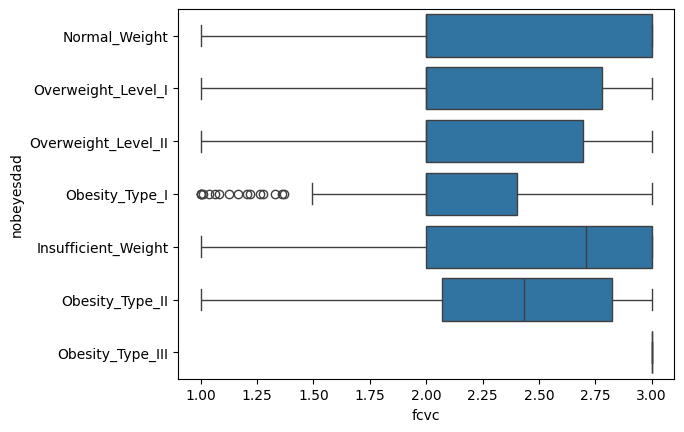

In [ ]:
#Graficamos con las variables en las que no se descarta la hipotesis y vemos claramenteo que no hay grandes diferencias entre los grupos
sns.boxplot(x="fcvc", y="nobeyesdad", data=df)
plt.show()

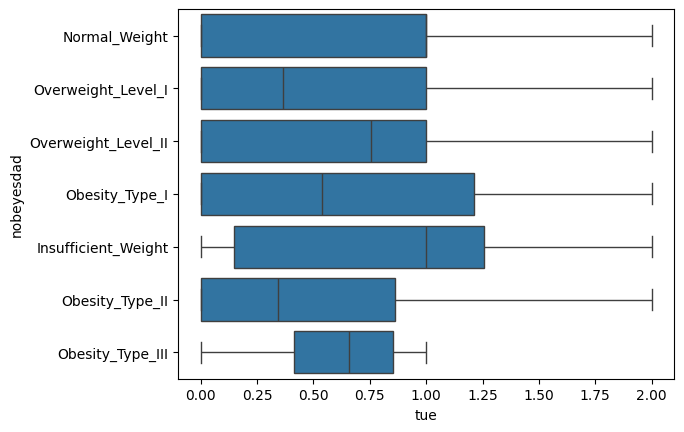

In [ ]:
sns.boxplot(x="tue", y="nobeyesdad", data=df)
plt.show()

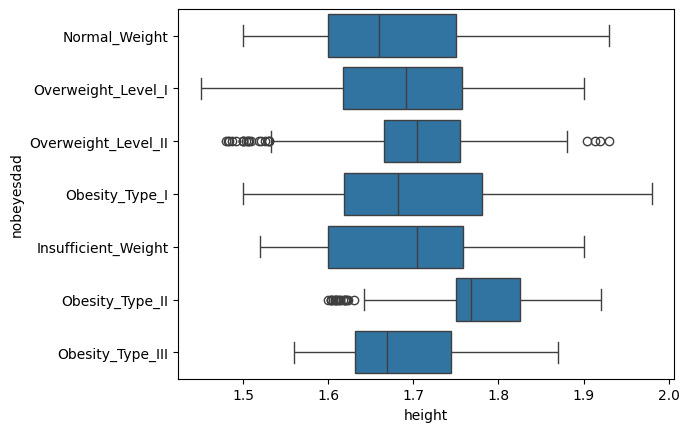

In [ ]:
#Graficamos con height donde vemos mas diferencias entre los grupos
sns.boxplot(x="height", y="nobeyesdad", data=df)
plt.show()

# Análisis Categoricas vs Categoricas

 Cramer's V para ver la relacion entre variales categoricas

In [ ]:
#Separamos variable continuas y categoricas

cat_cols = df.select_dtypes(include=object).columns.to_list()
cont_cols = df.select_dtypes(exclude=object).columns.to_list()

print(cat_cols)
print(cont_cols)

['gender', 'calc', 'caec', 'mtrans', 'nobeyesdad']
['age', 'height', 'weight', 'favc', 'fcvc', 'ncp', 'scc', 'smoke', 'ch2o', 'family_history', 'faf', 'tue', 'height_catego', 'fcvc_catego', 'faf_catego']


In [ ]:
def cramers_v_automatico(df):
    categorical_variable2 = 'nobeyesdad'
    for i in df.select_dtypes(include=object).columns:

        # Create a contingency table
        contingency_table = pd.crosstab(df[i], df[categorical_variable2])

        # Perform the chi-squared test
        chi2_stat, _, _, _ = chi2_contingency(contingency_table)

        # Calculate Cramér's V
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape)
        cramers_v = np.sqrt(chi2_stat / (n * (min_dim - 1)))

        print(f"Cramér's V de la variable {categorical_variable2} con {i} es de: {cramers_v}")

In [ ]:
cramers_v_automatico(df)

Cramér's V de la variable nobeyesdad con gender es de: 0.5581938743788853
Cramér's V de la variable nobeyesdad con calc es de: 0.23121942452822006
Cramér's V de la variable nobeyesdad con caec es de: 0.3560794291808786
Cramér's V de la variable nobeyesdad con mtrans es de: 0.18614807835124358
Cramér's V de la variable nobeyesdad con nobeyesdad es de: 0.9999999999999999


Ninguna variable tiene una correlacion significativa ni entre ellas ni con la variable de salida

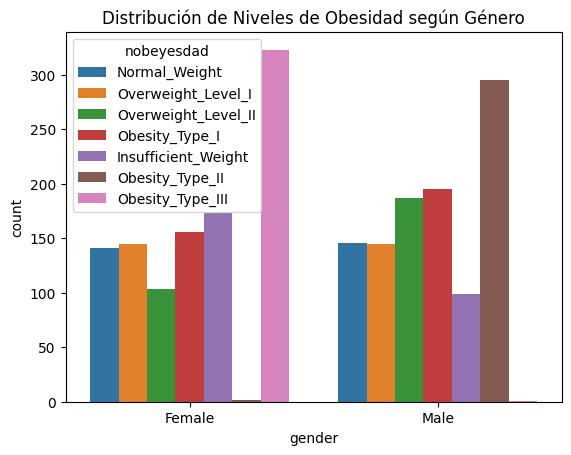

In [ ]:
sns.countplot(data=df, x='gender', hue='nobeyesdad')
plt.title('Distribución de Niveles de Obesidad según Género')
plt.xticks(rotation=0)
plt.show()


# Data Model

Tenemos un problema de clasificacion multiclase con una variable de salida nobeyesdad que tiene las siguientes opciones de clasificacion:

- Normal_Weight
- Obesity_Type_I
- Overweight_Level_I
- Overweight_Level_II
- Insufficient_Weight
- Obesity_Type_II
- Obesity_Type_III

Aplicaremos un metodo de  One - vs - all

In [ ]:
#Seleccionamos unicamente las variables numericas y la de salida para usarlas en la regresion logitica

train_cont = df[['age', 'height', 'weight', 'favc', 'fcvc', 'ncp', 'scc', 'smoke',
       'ch2o', 'family_history', 'faf', 'tue','nobeyesdad']]

In [ ]:
##----------------------------
# Train & Test split

X = train_cont.drop('nobeyesdad',axis=1)
y = train_cont['nobeyesdad']

seed = 2022
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = seed , test_size = test_size)


In [ ]:
y_train.value_counts()

nobeyesdad
Obesity_Type_I         279
Obesity_Type_III       253
Obesity_Type_II        240
Overweight_Level_I     239
Overweight_Level_II    237
Normal_Weight          225
Insufficient_Weight    215
Name: count, dtype: int64

In [ ]:
#Las variables que incluimos en el modelo
X.columns

Index(['age', 'height', 'weight', 'favc', 'fcvc', 'ncp', 'scc', 'smoke',
       'ch2o', 'family_history', 'faf', 'tue'],
      dtype='object')

In [ ]:
#longitud de conjunto de train y test
len(X_train), len(X_test),

(1688, 423)

 ## Definimos las metricas


In [ ]:
def compute_metrics(model, X_train, y_train, X_test, y_test):

    # Predicciones y probabilidades
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)

    # Calcular la matriz de confusión
    mcm_train = metrics.confusion_matrix(y_train, y_pred_train)
    mcm_test = metrics.confusion_matrix(y_test, y_pred_test)

    # Calcular métricas
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    f1_train = metrics.f1_score(y_train, y_pred_train, average='weighted')
    f1_test = metrics.f1_score(y_test, y_pred_test, average='weighted')
    precision_test = metrics.precision_score(y_test, y_pred_test, average='weighted')
    recall_test = metrics.recall_score(y_test, y_pred_test, average='weighted')

    # Imprimir resultados
    print('Train/Test split results:')
    print(f"{model.__class__.__name__} accuracy (train) is {accuracy_train:.3f}")
    print(f"{model.__class__.__name__} accuracy (test) is {accuracy_test:.3f}")
    print(f"{model.__class__.__name__} F1 score (train) is {f1_train:.3f}")
    print(f"{model.__class__.__name__} F1 score (test) is {f1_test:.3f}")
    print(f"{model.__class__.__name__} Precision (test) is {precision_test:.3f}")
    print(f"{model.__class__.__name__} Recall/Sensitividad (test) is {recall_test:.3f}")
    print("Confusion Matrix (Train):")
    print(mcm_train)
    print("Confusion Matrix (Test):")
    print(mcm_test)

    # Crear matriz de confusión visual
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train)')
    sns.heatmap(mcm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test)')
    sns.heatmap(mcm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,auc

def metrics_no_predict_proba(model, X_train, y_train, X_test, y_test):

    # Realizar predicciones en el conjunto de test
    y_pred_test = model.predict(X_test)
    # Realizar predicciones en el conjunto de train
    y_pred_train = model.predict(X_train)

    # Calcular la matriz de confusión
    mcm_train = metrics.confusion_matrix(y_train, y_pred_train)
    mcm_test = metrics.confusion_matrix(y_test, y_pred_test)


    # Calcular métricas para el conjunto de test
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    accuracy_test = accuracy_score(y_test, y_pred_test)


    # Calcular métricas para el conjunto de Train
    precision_train = precision_score(y_train, y_pred_train, average='macro')
    recall_train = recall_score(y_train, y_pred_train, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Imprimir resultados
    print('Train/Test split results:')
    print(f"{model.__class__.__name__} accuracy (train) is {accuracy_train:.3f}")
    print(f"{model.__class__.__name__} accuracy (test) is {accuracy_test:.3f}")
    print(f"{model.__class__.__name__} F1 score (train) is {f1_train:.3f}")
    print(f"{model.__class__.__name__} F1 score (test) is {f1_test:.3f}")
    print(f"{model.__class__.__name__} Precision (test) is {precision_test:.3f}")
    print(f"{model.__class__.__name__} Recall/Sensitividad (test) is {recall_train}")
    print(f"{model.__class__.__name__} Recall/Sensitividad (test) is {recall_test}")
    print("Confusion Matrix (Train):")
    print(mcm_train)
    print("Confusion Matrix (Test):")
    print(mcm_test)

    # Crear matriz de confusión visual
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train)')
    sns.heatmap(mcm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test)')
    sns.heatmap(mcm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

## Logistic Regression Model

In [ ]:
# Lanzamos una regresion logistica para establecer un baseline de cara a mejorar el modelo

# Train a model
from sklearn.linear_model import LogisticRegression

model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234)
model_rl_1.fit(X_train, y_train)


LogisticRegression(random_state=1234, solver='liblinear')

In [ ]:
#-----------------------------------------
# Predict con el dataset de test

y_pred = model_rl_1.predict(X_test)
y_pred_prb = model_rl_1.predict_proba(X_test)

In [ ]:
# Valores en TRAIN
model_rl_1.predict(X_train)[0:10]

array(['Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_I'], dtype=object)

Train/Test split results:
LogisticRegression accuracy (train) is 0.667
LogisticRegression accuracy (test) is 0.652
LogisticRegression F1 score (train) is 0.648
LogisticRegression F1 score (test) is 0.631
LogisticRegression Precision (test) is 0.624
LogisticRegression Recall/Sensitividad (test) is 0.652
Confusion Matrix (Train):
[[210   5   0   0   0   0   0]
 [ 45 117   5   0   1  35  22]
 [  0   8 187  33  19  11  21]
 [  0   1   9 205  25   0   0]
 [  0   0   0   0 253   0   0]
 [  1  48  27   2   1  93  67]
 [  0  17  89  22   3  45  61]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [15 24  4  0  0 11  8]
 [ 0  1 48 12  3  0  8]
 [ 0  0  2 43 12  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0 13  8  0  0 21  9]
 [ 0  7 14  9  3  6 14]]


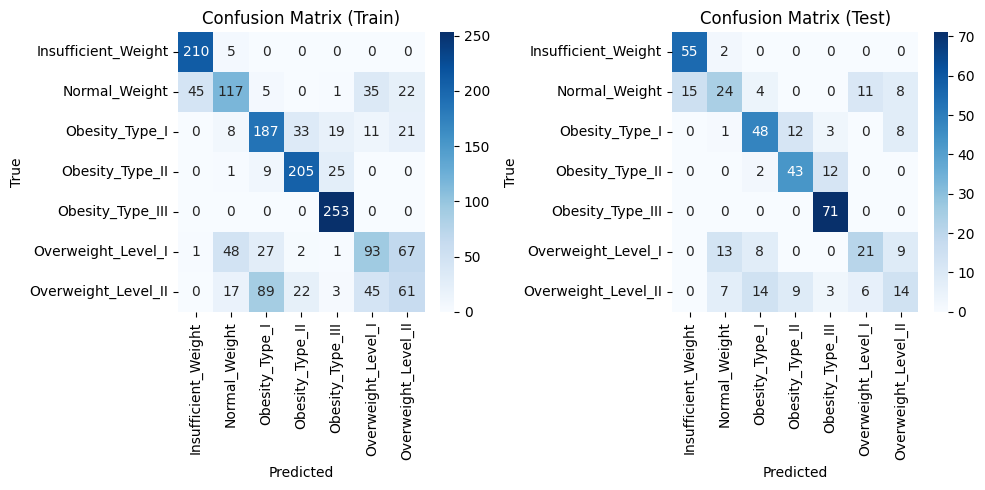

In [ ]:
# Evaluamos el modelo
compute_metrics(model_rl_1, X_train, y_train, X_test, y_test)

In [ ]:
#----------------------------------------
# Ajustamos los hiperparametros de la regresion para un probelma multiclase

from sklearn.linear_model import LogisticRegression

model_rl_2 =  LogisticRegression(multi_class='multinomial', solver = 'newton-cg', random_state= 1234, max_iter=1000)
model_rl_2.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=1234,
                   solver='newton-cg')

In [ ]:
#-----------------------------------------
# Predict con el dataset de test

y_pred = model_rl_2.predict(X_test)
y_pred_prb = model_rl_2.predict_proba(X_test)

Train/Test split results:
LogisticRegression accuracy (train) is 0.771
LogisticRegression accuracy (test) is 0.761
LogisticRegression F1 score (train) is 0.766
LogisticRegression F1 score (test) is 0.754
LogisticRegression Precision (test) is 0.752
LogisticRegression Recall/Sensitividad (test) is 0.761
Confusion Matrix (Train):
[[203  12   0   0   0   0   0]
 [ 33 139   0   0   0  49   4]
 [  0   0 232  16   3   2  26]
 [  0   0   4 225  11   0   0]
 [  0   0   0   0 253   0   0]
 [  1  36   0   0   0 138  64]
 [  0  17  50   4   1  54 111]]
Confusion Matrix (Test):
[[51  6  0  0  0  0  0]
 [14 28  0  0  0 16  4]
 [ 0  0 59  9  1  0  3]
 [ 0  0  2 52  3  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  7  0  0  0 31 13]
 [ 0  6 10  2  0  5 30]]


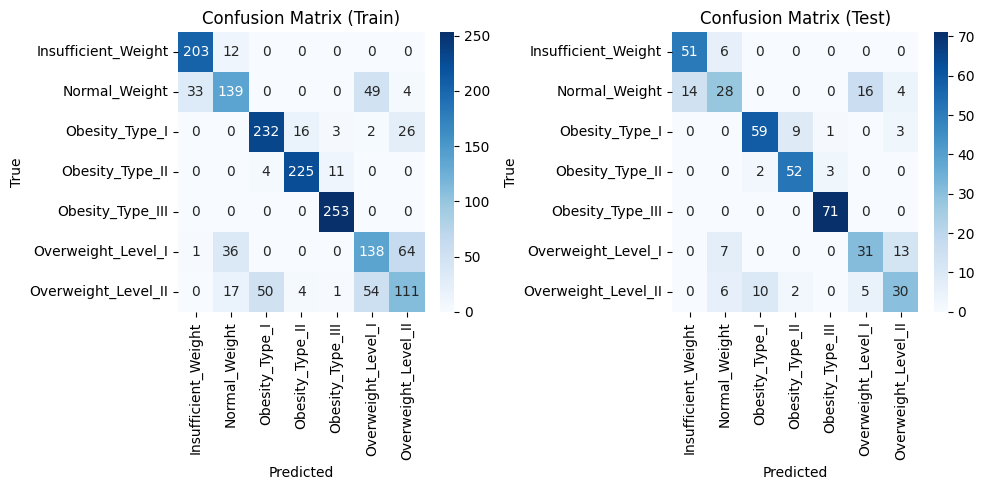

In [ ]:
# Evaluamos el modelo
compute_metrics(model_rl_2, X_train, y_train, X_test, y_test)

 ##  OneVsRest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

#Antes de pasarle las variables transformamos las categoricas en numericas con un LeabelEncoder
le = LabelEncoder()

#seleccionamos las variables categoricas
categorical_cols = ['favc', 'scc', 'smoke', 'family_history']

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Fit the OneVsRestClassifier with the transformed X
model_rc_1 = OneVsRestClassifier(SVC()).fit(X, y)

# Ajustamos el codificador a la variable objetivo de entrenamiento
le.fit(y_train)

# Transformar las variables objetivo tanto de entrenamiento como de prueba (se reemplaza cada categorías por un número)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)



Train/Test split results:
OneVsRestClassifier accuracy (train) is 0.538
OneVsRestClassifier accuracy (test) is 0.501
OneVsRestClassifier F1 score (train) is 0.513
OneVsRestClassifier F1 score (test) is 0.472
OneVsRestClassifier Precision (test) is 0.513
OneVsRestClassifier Recall/Sensitividad (test) is 0.5391196343755448
OneVsRestClassifier Recall/Sensitividad (test) is 0.49869614246469446
Confusion Matrix (Train):
[[213   2   0   0   0   0   0]
 [124  71   8   0   0  20   2]
 [  0   0 187  28  44   5  15]
 [  0   0  20 171  46   0   3]
 [  0   0  32  91 129   0   1]
 [ 14  65  54   1   0  88  17]
 [  4  35 114  13   0  22  49]]
Confusion Matrix (Test):
[[56  1  0  0  0  0  0]
 [34 17  2  0  0  7  2]
 [ 0  0 43 14 14  0  1]
 [ 0  0  3 40 14  0  0]
 [ 0  0 15 28 28  0  0]
 [ 5 12 12  0  0 17  5]
 [ 1  8 23  5  0  5 11]]


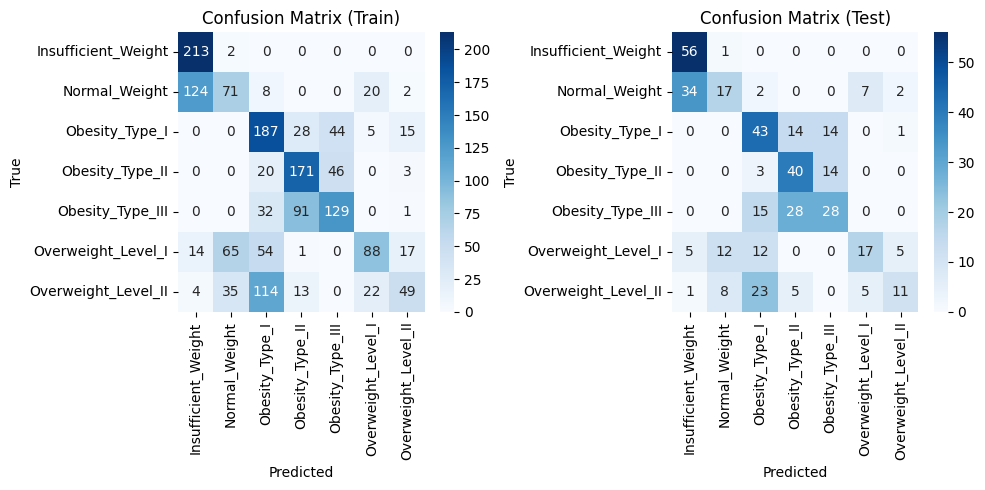

In [ ]:
resultados = metrics_no_predict_proba(model_rc_1, X_train, y_train, X_test, y_test)
resultados

 ## K-Nearest Neighbors (KNN)

Train/Test split results:
KNeighborsClassifier accuracy (train) is 0.899
KNeighborsClassifier accuracy (test) is 0.823
KNeighborsClassifier F1 score (train) is 0.896
KNeighborsClassifier F1 score (test) is 0.812
KNeighborsClassifier Precision (test) is 0.822
KNeighborsClassifier Recall/Sensitividad (test) is 0.823
Confusion Matrix (Train):
[[209   6   0   0   0   0   0]
 [ 37 145   2   0   0  31  10]
 [  0   0 265   3   3   0   8]
 [  0   0   1 235   3   0   1]
 [  0   0   0   1 252   0   0]
 [  2  13   5   0   0 210   9]
 [  0   5  16   3   0  11 202]]
Confusion Matrix (Test):
[[56  1  0  0  0  0  0]
 [17 26  4  0  0 11  4]
 [ 0  0 58  4  2  0  8]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  1 70  0  0]
 [ 0  5  1  0  0 42  3]
 [ 0  2  6  0  0  5 40]]


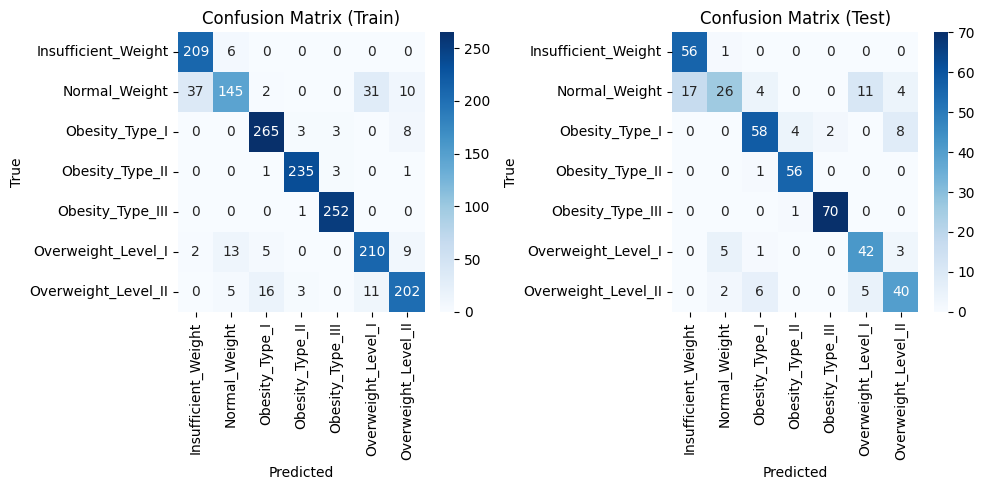

In [ ]:
# Es importante normalizar las magnitudes para tener todas las medidas en un mismo rango.
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las variables continuas
variales_continuas = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
scaler.fit(df[variales_continuas])

# Transformamos las variables continuas y creamos un nuevo DataFrame
scaled_features = scaler.transform(df[variales_continuas])
df_feat = pd.DataFrame(scaled_features, columns=variales_continuas)

# Concatenamos las scaled variables continuas con las variables categoricas originales
df_feat = pd.concat([df_feat, df.select_dtypes(exclude=['number'])], axis=1)

# Define model
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Eval model
compute_metrics(knn, X_train, y_train, X_test, y_test)

 ## Decision Tree

Train/Test split results:
DecisionTreeClassifier accuracy (train) is 1.000
DecisionTreeClassifier accuracy (test) is 0.934
DecisionTreeClassifier F1 score (train) is 1.000
DecisionTreeClassifier F1 score (test) is 0.933
DecisionTreeClassifier Precision (test) is 0.934
DecisionTreeClassifier Recall/Sensitividad (test) is 0.934
Confusion Matrix (Train):
[[215   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   0   0   0   0 239   0]
 [  0   0   0   0   0   0 237]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [ 3 52  0  0  0  5  2]
 [ 0  0 70  1  0  0  1]
 [ 0  0  2 55  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  4  0  0  0 43  4]
 [ 0  0  2  0  0  2 49]]


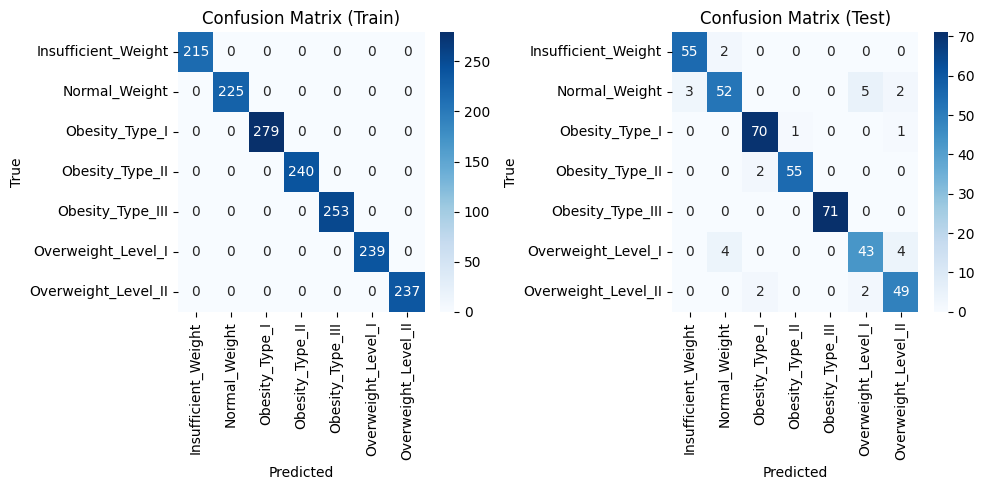

In [ ]:
#----------------------------------------
# Entrenamos un modelo de clasificacion de tipo decision tree y lo dejamos crecer al maximo (y que sobreajuste) para ver que valores alcanza y realizar un feature importance

#### Model Decision Tree

# Define model
model_dt1 = DecisionTreeClassifier(random_state = 1234)

# Train model
model_dt1.fit(X_train, y_train)

# Predict
y_pred = model_dt1.predict(X_test)

# Eval model
compute_metrics(model_dt1, X_train, y_train, X_test, y_test)


In [ ]:
model_dt1.get_depth()

12

In [ ]:
model_dt1.get_n_leaves()

np.int64(111)

In [ ]:
model_dt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1234,
 'splitter': 'best'}

In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para tomar decisiones en funcion

feature_importance =pd.DataFrame(zip(model_dt1.feature_names_in_,model_dt1.feature_importances_)).sort_values(1,ascending=False)
feature_importance

0         1
2           weight  0.470960
1           height  0.275331
4             fcvc  0.142853
0              age  0.054852
5              ncp  0.024265
11             tue  0.015640
10             faf  0.009398
8             ch2o  0.006701
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.922
RandomForestClassifier accuracy (test) is 0.896
RandomForestClassifier F1 score (train) is 0.921
RandomForestClassifier F1 score (test) is 0.895
RandomForestClassifier Precision (test) is 0.896
RandomForestClassifier Recall/Sensitividad (test) is 0.896
Confusion Matrix (Train):
[[209   6   0   0   0   0   0]
 [  4 208   0   0   0   9   4]
 [  0   3 259   7   6   0   4]
 [  0   1   2 237   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0  18   1   0   0 199  21]
 [  0  12   8   3   0  23 191]]
Confusion Matrix (Test):
[[54  3  0  0  0  0  0]
 [ 2 53  0  0  0  5  2]
 [ 0  0 62  4  3  0  3]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 45  5]
 [ 0  3  4  0  0  8 38]]


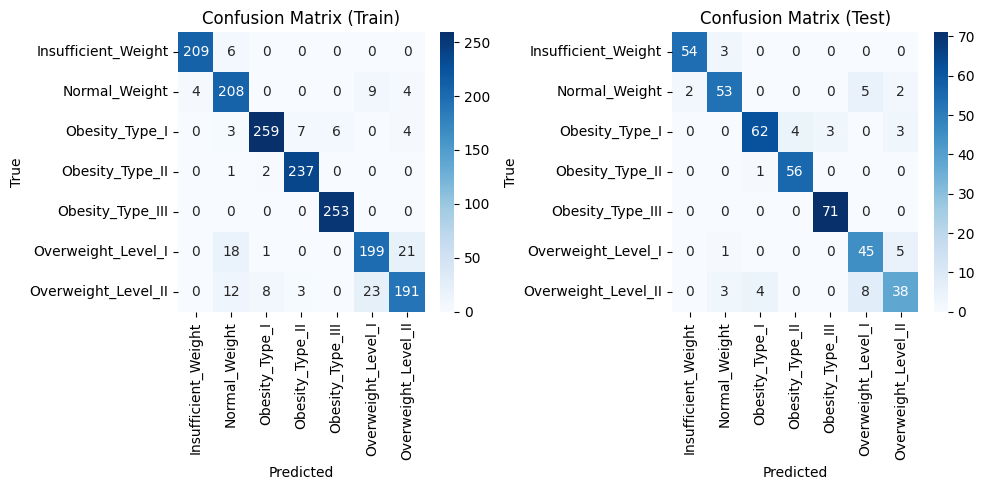

In [ ]:
#Probamos ahora con un RandomizedSearchCV para ver cual nos da mejores resultados
from sklearn.model_selection import RandomizedSearchCV


# Define Model
model_2 =  RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini','log_loss'),
              'n_estimators': (400,500,600),
              'min_samples_leaf': (5, 10, 15),
              'max_depth': (5, 7, 10)}

# Train model
model_2_rs = RandomizedSearchCV(model_2, parameters, n_iter = 10, scoring = 'roc_auc')
model_2_rs.fit(X_train, y_train)

# Predict
y_pred = model_2_rs.best_estimator_.predict(X_test)
y_train_pred = model_2_rs.best_estimator_.predict(X_train)

# Eval Model
compute_metrics(model_2_rs.best_estimator_, X_train, y_train, X_test, y_test)


In [ ]:
model_2_rs.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=15, n_estimators=400,
                       random_state=1234)

 ## Random forest

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.775
RandomForestClassifier accuracy (test) is 0.780
RandomForestClassifier F1 score (train) is 0.767
RandomForestClassifier F1 score (test) is 0.774
RandomForestClassifier Precision (test) is 0.776
RandomForestClassifier Recall/Sensitividad (test) is 0.780
Confusion Matrix (Train):
[[205  10   0   0   0   0   0]
 [ 38 145   2   0   0  21  19]
 [  0   9 209  32  10   0  19]
 [  0   1   3 231   5   0   0]
 [  0   0   0   0 253   0   0]
 [ 12  29  45   0   1 117  35]
 [  0  21  49   4   0  14 149]]
Confusion Matrix (Test):
[[54  3  0  0  0  0  0]
 [ 6 44  2  0  0  8  2]
 [ 0  0 44 20  3  0  5]
 [ 0  0  1 55  1  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  4  8  0  0 33  6]
 [ 0  5 13  1  0  5 29]]


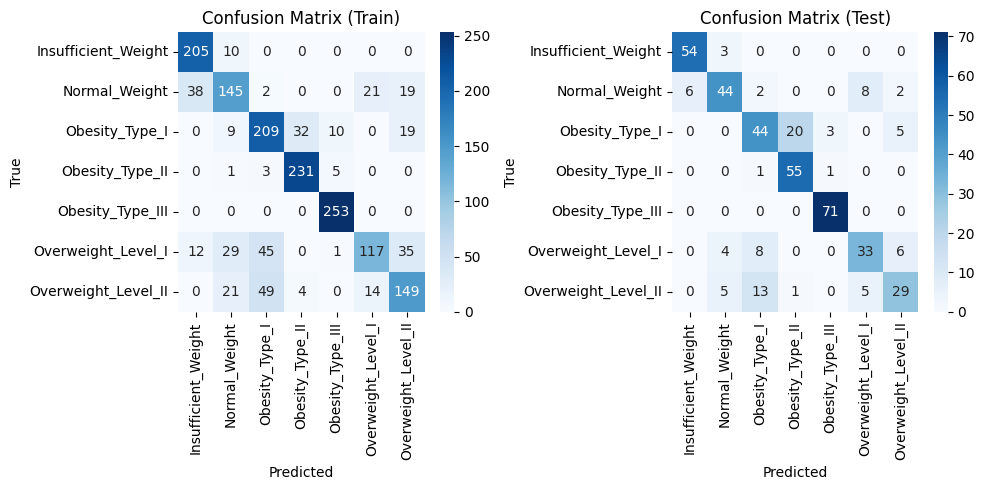

In [ ]:
# Entrenamos un modelo de clasificacion de tipo Random Forest

#### Model Random Forest

# Define model
model_rf1 = RandomForestClassifier(
    n_estimators=100,
    random_state=1234,
    max_depth=3,
    min_samples_leaf=4
)

# Train model con todas las columnas
model_rf1.fit(X_train, y_train)

# Predict
y_pred = model_rf1.predict(X_test)

# Eval model
compute_metrics(model_rf1, X_train, y_train, X_test, y_test)

In [ ]:
model_rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

Streaming output truncated to the last 5000 lines.
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py", line 634, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueError: multi_class must be

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.917
RandomForestClassifier accuracy (test) is 0.861
RandomForestClassifier F1 score (train) is 0.916
RandomForestClassifier F1 score (test) is 0.857
RandomForestClassifier Precision (test) is 0.859
RandomForestClassifier Recall/Sensitividad (test) is 0.861
Confusion Matrix (Train):
[[210   5   0   0   0   0   0]
 [  2 206   0   0   0  11   6]
 [  0   2 262  10   2   0   3]
 [  0   1   1 238   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0  18   2   0   0 199  20]
 [  0  10  20   3   0  24 180]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [ 2 50  0  0  0  7  3]
 [ 0  0 60 10  0  0  2]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 1  1  1  0  0 42  6]
 [ 0  3 12  0  0  8 30]]


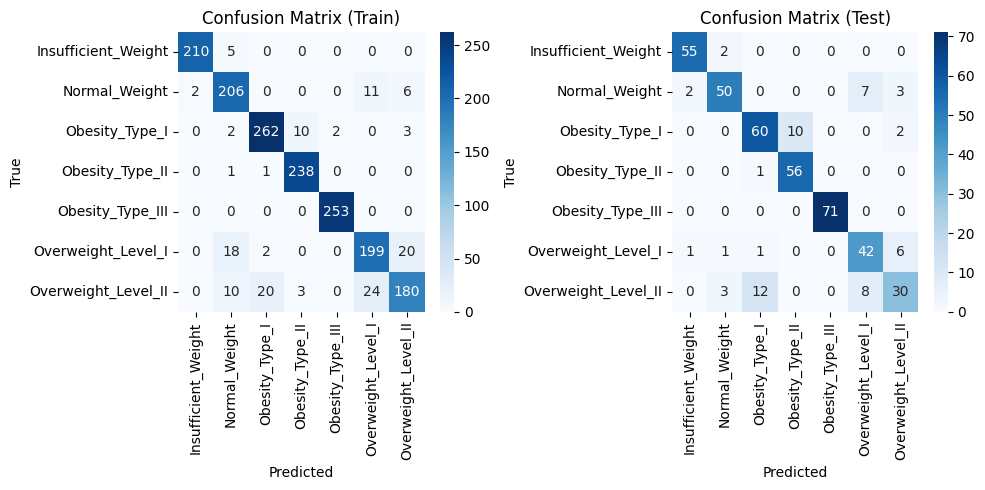

In [ ]:
# Probamos con GridSearchCV para buscar el mejor modelo probando con los hiperparámetros más importantes

from sklearn.model_selection import GridSearchCV

#### Model Random Forest con GridSearchCV

# modelo base
model_rf_2 = RandomForestClassifier()

parameters = {
    'random_state': [1234],
    'criterion': ('entropy', 'gini', 'log_loss'),
    'n_estimators': (50, 100, 250),
    'min_samples_leaf': (2, 4, 6),
    'max_depth': (5, 7, 10, 20)
}

# Grid Search
model_12_gs = GridSearchCV(model_rf_2, parameters, scoring='roc_auc')

# Entrenamiento del modelo con todas las columnas
model_12_gs.fit(X_train, y_train)

# Predicción
y_pred = model_12_gs.best_estimator_.predict(X_test)

# Evaluación
compute_metrics(model_12_gs.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
model_12_gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       n_estimators=50, random_state=1234)

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.964
RandomForestClassifier accuracy (test) is 0.939
RandomForestClassifier F1 score (train) is 0.964
RandomForestClassifier F1 score (test) is 0.938
RandomForestClassifier Precision (test) is 0.939
RandomForestClassifier Recall/Sensitividad (test) is 0.939
Confusion Matrix (Train):
[[212   3   0   0   0   0   0]
 [  1 215   0   0   0   5   4]
 [  0   0 274   0   1   0   4]
 [  0   0   1 238   0   1   0]
 [  0   0   0   0 253   0   0]
 [  0  12   0   0   0 214  13]
 [  0   3   7   1   0   5 221]]
Confusion Matrix (Test):
[[54  3  0  0  0  0  0]
 [ 0 57  0  0  0  2  3]
 [ 0  0 68  2  0  0  2]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  0  0  0  0 48  3]
 [ 0  1  5  0  0  4 43]]


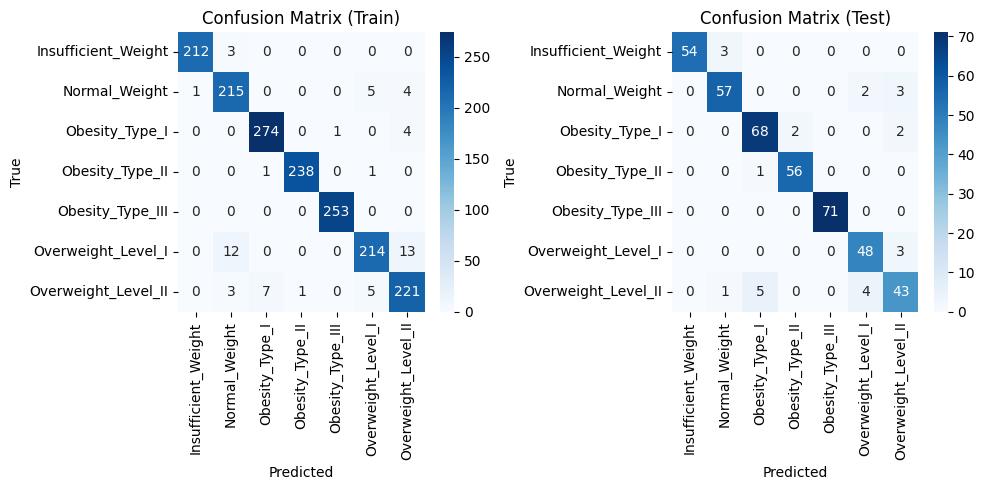

In [ ]:
# Tiramos el segundo modelo ajustando los mejores hiperparámetros que nos ha dado el Grid Search

#### Model Random Forest

# Define model con hiperparámetros ajustados
model_rf4 = RandomForestClassifier(
    n_estimators=50,
    criterion="entropy",
    random_state=1234,
    max_depth=7,
    min_samples_leaf=4
)

# Train model con todas las columnas
model_rf4.fit(X_train, y_train)

# Predict
y_pred = model_rf4.predict(X_test)

# Eval model
compute_metrics(model_rf4, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.963
RandomForestClassifier accuracy (test) is 0.948
RandomForestClassifier F1 score (train) is 0.963
RandomForestClassifier F1 score (test) is 0.948
RandomForestClassifier Precision (test) is 0.948
RandomForestClassifier Recall/Sensitividad (test) is 0.948
Confusion Matrix (Train):
[[211   4   0   0   0   0   0]
 [  2 216   0   0   0   5   2]
 [  0   0 273   3   1   0   2]
 [  0   0   2 238   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0  15   0   0   0 214  10]
 [  0   4   7   0   0   6 220]]
Confusion Matrix (Test):
[[54  3  0  0  0  0  0]
 [ 0 58  0  0  0  2  2]
 [ 0  0 68  2  0  0  2]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 48  2]
 [ 0  2  3  0  0  3 45]]


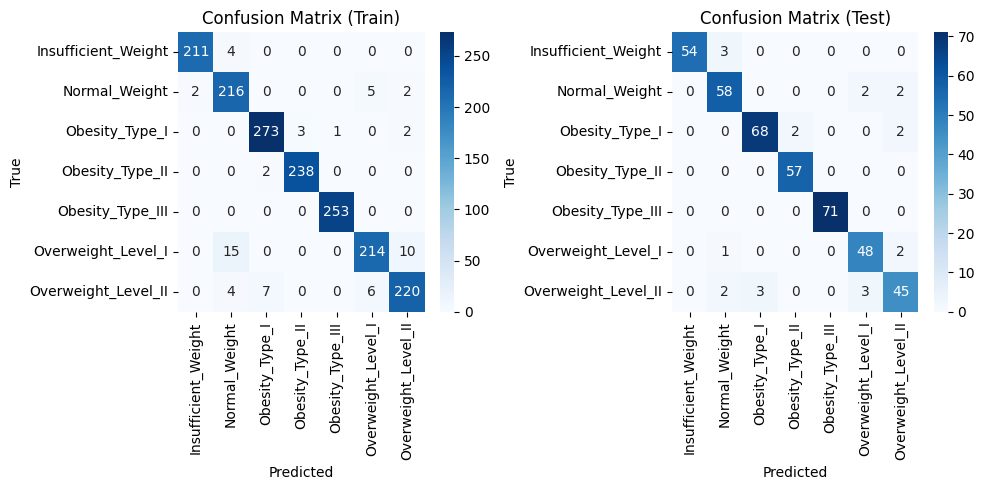

In [ ]:
# Probamos ahora con un RandomizedSearchCV para ver cuál nos da mejores resultados

from sklearn.model_selection import RandomizedSearchCV

# Define modelo base
model_5 = RandomForestClassifier()

# Define el espacio de búsqueda de hiperparámetros
parameters = {
    'random_state': [1234],
    'criterion': ('entropy', 'gini', 'log_loss'),
    'n_estimators': (400, 500, 600),
    'min_samples_leaf': (5, 10, 15),
    'max_depth': (5, 7, 10)
}

# Randomized Search
model_5_rs = RandomizedSearchCV(model_5, parameters, n_iter=10, scoring='roc_auc')

# Entrenamiento del modelo con todas las columnas
model_5_rs.fit(X_train, y_train)

# Predicciones
y_pred = model_5_rs.best_estimator_.predict(X_test)
y_train_pred = model_5_rs.best_estimator_.predict(X_train)

# Evaluación
compute_metrics(model_5_rs.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
model_5_rs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=5,
                       n_estimators=500, random_state=1234)

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.985
RandomForestClassifier accuracy (test) is 0.965
RandomForestClassifier F1 score (train) is 0.985
RandomForestClassifier F1 score (test) is 0.965
RandomForestClassifier Precision (test) is 0.966
RandomForestClassifier Recall/Sensitividad (test) is 0.965
Confusion Matrix (Train):
[[212   3   0   0   0   0   0]
 [  1 219   0   0   0   4   1]
 [  0   0 277   0   0   0   2]
 [  0   0   1 238   0   1   0]
 [  0   0   0   0 253   0   0]
 [  0   6   0   0   0 233   0]
 [  0   3   2   0   0   2 230]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [ 0 57  0  0  0  2  3]
 [ 0  0 70  0  0  1  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  0  0  0  0 49  2]
 [ 0  2  0  0  0  2 49]]


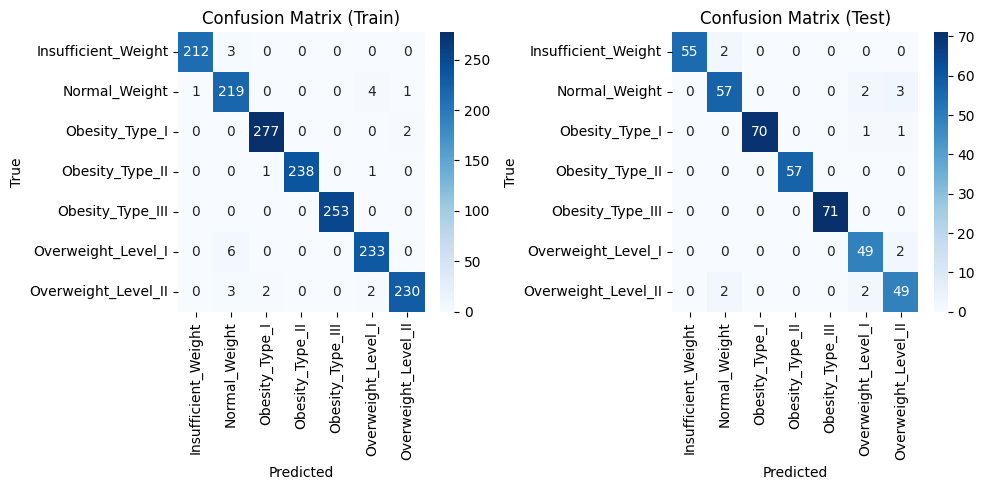

In [ ]:
# Tiramos el segundo modelo ajustando los mejores hiperparámetros que nos ha dado el Grid Search

#### Model Random Forest

# Define el modelo con los hiperparámetros ajustados
model_rf7 = RandomForestClassifier(
    n_estimators=70,
    criterion="entropy",
    random_state=1234,
    max_depth=10,
    min_samples_leaf=4
)

# Entrenamos el modelo con todas las columnas
model_rf7.fit(X_train, y_train)

# Predicción
y_pred = model_rf7.predict(X_test)

# Evaluación
compute_metrics(model_rf7, X_train, y_train, X_test, y_test)


In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_rf7.feature_names_in_,model_rf7.feature_importances_)).sort_values(1,ascending=False)

0         1
2           weight  0.467073
4             fcvc  0.123306
1           height  0.107432
0              age  0.092846
5              ncp  0.060610
11             tue  0.057657
10             faf  0.049422
8             ch2o  0.041654
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.971
RandomForestClassifier accuracy (test) is 0.939
RandomForestClassifier F1 score (train) is 0.971
RandomForestClassifier F1 score (test) is 0.939
RandomForestClassifier Precision (test) is 0.940
RandomForestClassifier Recall/Sensitividad (test) is 0.939
Confusion Matrix (Train):
[[210   5   0   0   0   0   0]
 [  0 215   0   0   0   8   2]
 [  0   0 273   3   2   0   1]
 [  0   1   2 237   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0  13   0   0   0 222   4]
 [  0   3   2   1   0   2 229]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [ 0 56  0  0  0  4  2]
 [ 0  0 67  3  0  1  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 1  0  0  0  0 46  4]
 [ 0  1  3  0  0  4 45]]


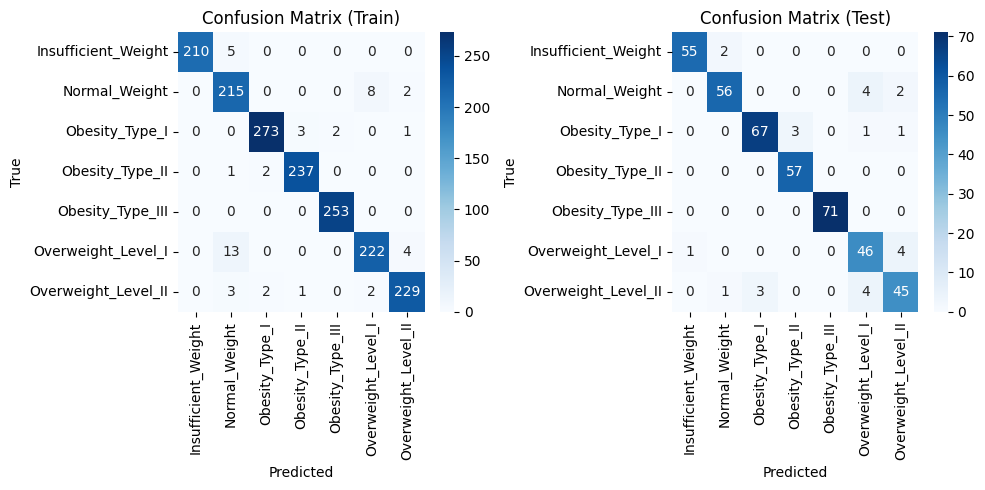

In [ ]:
# Probamos ahora con un RandomizedSearchCV para ver cuál nos da mejores resultados

from sklearn.model_selection import RandomizedSearchCV

# Define el modelo base
model_6 = RandomForestClassifier()

# Espacio de búsqueda de hiperparámetros
parameters = {
    'random_state': [1234],
    'criterion': ('entropy', 'gini', 'log_loss'),
    'n_estimators': (40, 50, 70),
    'min_samples_leaf': (2, 4, 6),
    'max_depth': (10, 20, 30)
}

# Randomized Search
model_6_rs = RandomizedSearchCV(model_6, parameters, n_iter=10, scoring='roc_auc')

# Entrenar el modelo con todas las columnas
model_6_rs.fit(X_train, y_train)

# Predicciones
y_pred = model_6_rs.best_estimator_.predict(X_test)
y_train_pred = model_6_rs.best_estimator_.predict(X_train)

# Evaluación
compute_metrics(model_6_rs.best_estimator_, X_train, y_train, X_test, y_test)


In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_6_rs.feature_names_in_,model_rf7.feature_importances_)).sort_values(1,ascending=False)

0         1
2           weight  0.467073
4             fcvc  0.123306
1           height  0.107432
0              age  0.092846
5              ncp  0.060610
11             tue  0.057657
10             faf  0.049422
8             ch2o  0.041654
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

In [ ]:
model_6_rs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=20, min_samples_leaf=6,
                       n_estimators=40, random_state=1234)

## The Bayes Classifier (Naïve Bayes)

Train/Test split results:
CategoricalNB accuracy (train) is 0.770
CategoricalNB accuracy (test) is 0.730
CategoricalNB F1 score (train) is 0.767
CategoricalNB F1 score (test) is 0.728
CategoricalNB Precision (test) is 0.729
CategoricalNB Recall/Sensitividad (test) is 0.730
Confusion Matrix (Train):
[[183  29   0   1   2   0   0]
 [ 42 146   2   2   2  24   7]
 [  1   2 193  10   8  19  46]
 [  0   2  10 221   1   2   4]
 [  2   0   0   1 250   0   0]
 [ 10  15  14   3   0 170  27]
 [  0  18  42   8   0  33 136]]
Confusion Matrix (Test):
[[48  8  0  0  1  0  0]
 [12 38  1  0  1  9  1]
 [ 0  3 41  6  2  7 13]
 [ 0  0  3 53  0  0  1]
 [ 1  0  0  0 70  0  0]
 [ 1  4  2  0  0 31 13]
 [ 0  7 11  0  0  7 28]]


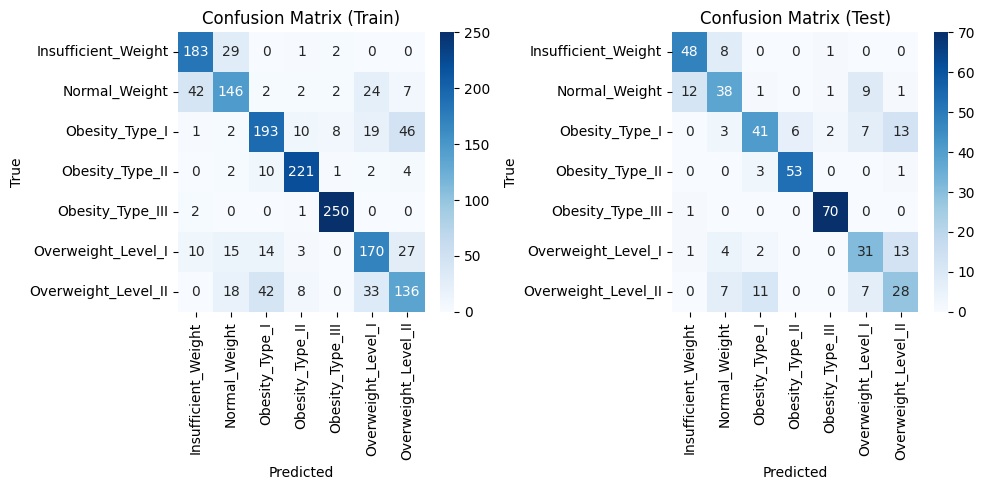

In [ ]:
#Entrenamos un modelo de clasificacion de tipo NAIVE BAYES

from sklearn.naive_bayes import CategoricalNB

# Define model
model_nb_1 = CategoricalNB(alpha=0.5, fit_prior=False)

# Train model
model_nb_1 .fit(X_train, y_train)

# Predict
y_pred = model_nb_1.predict(X_test)

# Eval model
compute_metrics(model_nb_1, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Train/Test split results:
CategoricalNB accuracy (train) is 0.772
CategoricalNB accuracy (test) is 0.723
CategoricalNB F1 score (train) is 0.769
CategoricalNB F1 score (test) is 0.719
CategoricalNB Precision (test) is 0.717
CategoricalNB Recall/Sensitividad (test) is 0.723
Confusion Matrix (Train):
[[180  29   0   2   2   1   1]
 [ 38 148   2   2   5  24   6]
 [  1   2 204  11   8  16  37]
 [  0   2  10 221   1   2   4]
 [  2   0   0   1 250   0   0]
 [ 10  12  17   3   1 171  25]
 [  0  20  48   7   1  32 129]]
Confusion Matrix (Test):
[[47  8  0  0  2  0  0]
 [11 38  2  0  1  9  1]
 [ 0  3 43  6  2  8 10]
 [ 0  1  3 52  0  0  1]
 [ 1  0  0  0 70  0  0]
 [ 1  4  5  1  0 30 10]
 [ 0  7 12  2  0  6 26]]


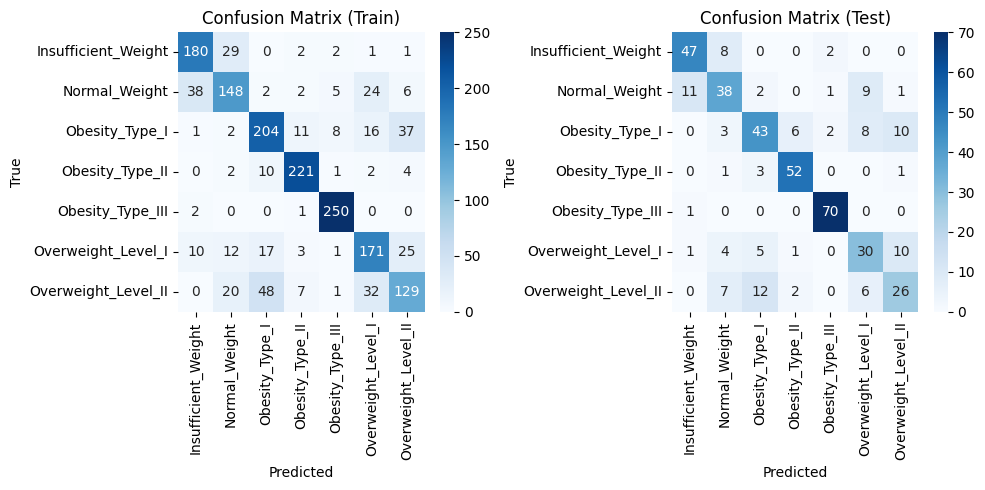

In [ ]:
#Probamos diferentes configuraciones de hiper-parametros con RandomizedSearchCV

# Definimos el modelo
model_nb_1 = CategoricalNB()

# Definimos el espacio de búsqueda para los hiperparámetros
param_dist = {
    'alpha': np.linspace(0.01, 1.0, 100),
    'fit_prior': [True, False]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(model_nb_1, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1)

# Entrenar el modelo
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Predecir
y_pred = best_model.predict(X_test)

# Eval model
compute_metrics(best_model, X_train, y_train, X_test, y_test)

## XGboost Model

Train/Test split results:
XGBClassifier accuracy (train) is 1.000
XGBClassifier accuracy (test) is 0.972
XGBClassifier F1 score (train) is 1.000
XGBClassifier F1 score (test) is 0.972
XGBClassifier Precision (test) is 0.972
XGBClassifier Recall/Sensitividad (test) is 0.972
Confusion Matrix (Train):
[[215   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   0   0   0   0 239   0]
 [  0   0   0   0   0   0 237]]
Confusion Matrix (Test):
[[56  1  0  0  0  0  0]
 [ 1 58  0  0  0  3  0]
 [ 0  0 71  0  0  0  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 46  4]
 [ 0  0  1  0  0  0 52]]


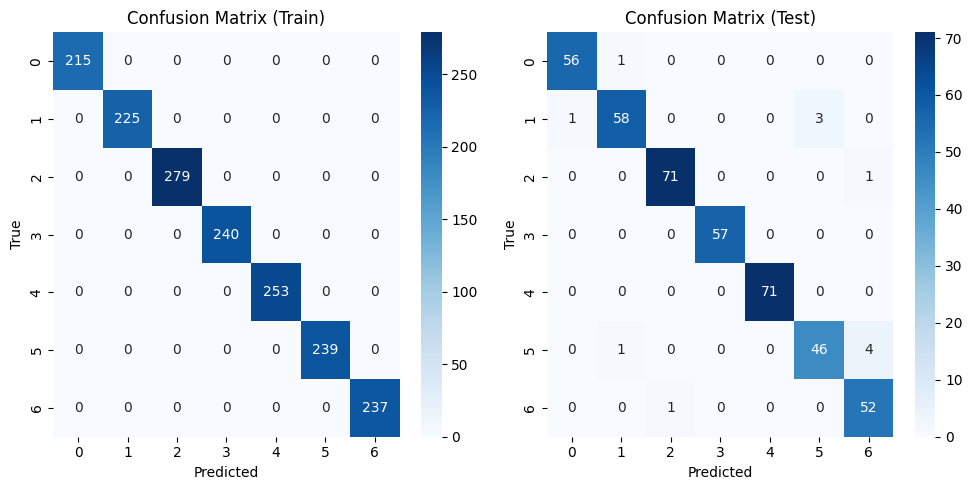

In [ ]:
import xgboost as xgb

#(Me daba un error al seleccionar las clases, le di al explain error y era porque las categorías no eran números, así que antes de pasar el modelo hay que codificarlas)
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creamos el codificador
le = LabelEncoder()

# Ajustamos el codificador a la variable objetivo de entrenamiento
le.fit(y_train)

# Transformar las variables objetivo tanto de entrenamiento como de prueba (se reemplaza cada categorías por un número)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Definimos el modelo (a partir de aquí hecho a mano)
model_xgb_1 = xgb.XGBClassifier(
    objective='multi:softprob', # Es la función objetivo (hay regresión, clasificación binaria y clasificación multiclase, en nuestro caso al ser multiclase es multi:softprob)
    num_class=7,  # (número de clases de la variable objetivo(
    learning_rate=0.1, # (Controla la influencia de cada árbol nuevo en el modelo final, si el número es bajo el impacto en menor y se necesitarán más árboles)
    max_depth=6, # máxima profundidad
    n_estimators=100 #número de árboles
)

# Entrenar el modelo utilizando la variable objetivo codificada
model_xgb_1.fit(X_train, y_train_encoded)

# Predict
y_pred = model_xgb_1.predict(X_test)

# Eval model
compute_metrics(model_xgb_1, X_train, y_train_encoded, X_test, y_test_encoded) # (si compute_metrics no puede manejar etiquetas habría que hacer una transformación inversa antes de pasárselas. -> le.inverse_transform(y_encoded))

Train/Test split results:
XGBClassifier accuracy (train) is 1.000
XGBClassifier accuracy (test) is 0.972
XGBClassifier F1 score (train) is 1.000
XGBClassifier F1 score (test) is 0.972
XGBClassifier Precision (test) is 0.972
XGBClassifier Recall/Sensitividad (test) is 0.972
Confusion Matrix (Train):
[[215   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   0   0   0   0 239   0]
 [  0   0   0   0   0   0 237]]
Confusion Matrix (Test):
[[56  1  0  0  0  0  0]
 [ 1 58  0  0  0  3  0]
 [ 0  0 71  0  0  0  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 46  4]
 [ 0  0  1  0  0  0 52]]


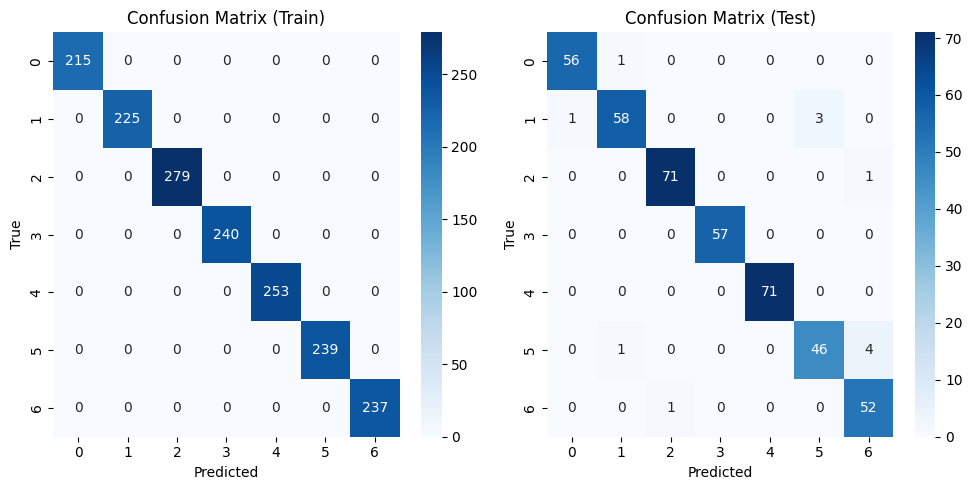

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

#seleccionamos las variables categoricas
categorical_cols = ['favc', 'scc', 'smoke', 'family_history']

# Ya que las variables son booleanas por lo tamtp no tiene un orden/jerarquia les aplicamos un LabelEncoder que asigna un numero a cada valor para que puedan funcionar con XGBClassifier
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    # If X_test exists, apply the same transformation to it
    if 'X_test' in globals() and isinstance(globals()['X_test'], pd.DataFrame):
        X_test[col] = le.transform(X_test[col])

# Ajustamos el codificador a la variable objetivo de entrenamiento
le.fit(y_train)

# Transformar las variables objetivo tanto de entrenamiento como de prueba (se reemplaza cada categorías por un número)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Definimos el modelo (a partir de aquí hecho a mano)
model_xgb_2 = xgb.XGBClassifier(
    objective='multi:softprob', # Es la función objetivo (hay regresión, clasificación binaria y clasificación multiclase, en nuestro caso al ser multiclase es multi:softprob)
    num_class=7,  # (número de clases de la variable objetivo(
    learning_rate=0.1, # (Controla la influencia de cada árbol nuevo en el modelo final, si el número es bajo el impacto en menor y se necesitarán más árboles)
    max_depth=6, # máxima profundidad
    n_estimators=100 #número de árboles
)

# Entrenar el modelo utilizando la variable objetivo codificada
model_xgb_2.fit(X_train, y_train_encoded)

# Predict
y_pred = model_xgb_2.predict(X_test)

# Eval model
compute_metrics(model_xgb_2, X_train, y_train_encoded, X_test, y_test_encoded)

In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_xgb_2.feature_names_in_,model_xgb_2.feature_importances_)).sort_values(1,ascending=False)

0         1
4             fcvc  0.329448
2           weight  0.254517
1           height  0.106170
5              ncp  0.087754
8             ch2o  0.071822
11             tue  0.056919
0              age  0.054587
10             faf  0.038782
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

# Best models

Train/Test split results:
RandomForestClassifier accuracy (train) is 0.993
RandomForestClassifier accuracy (test) is 0.972
RandomForestClassifier F1 score (train) is 0.993
RandomForestClassifier F1 score (test) is 0.972
RandomForestClassifier Precision (test) is 0.972
RandomForestClassifier Recall/Sensitividad (test) is 0.972
Confusion Matrix (Train):
[[213   2   0   0   0   0   0]
 [  0 224   0   0   0   0   1]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   6   0   0   0 233   0]
 [  0   0   2   0   0   0 235]]
Confusion Matrix (Test):
[[54  3  0  0  0  0  0]
 [ 0 59  0  0  0  2  1]
 [ 0  0 70  0  0  1  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 48  2]
 [ 0  0  1  0  0  0 52]]


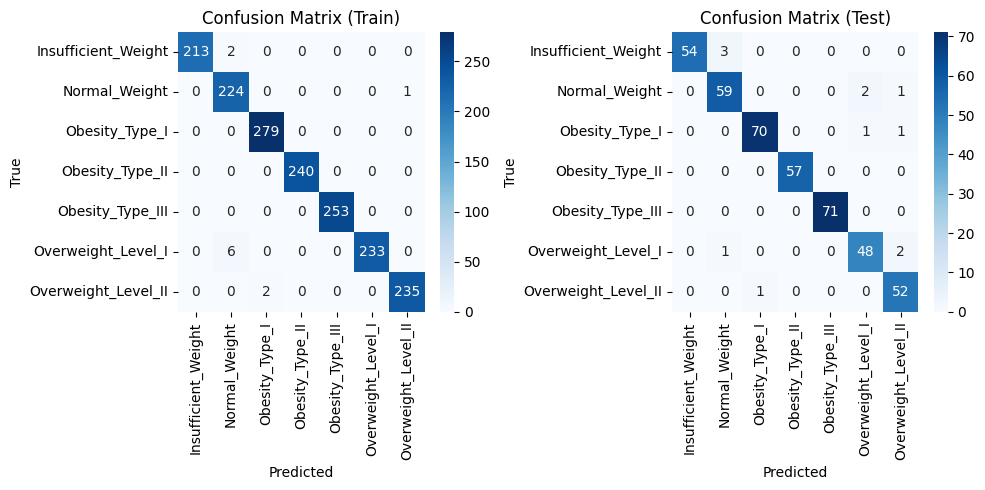

In [ ]:
# Este es el mejor modelo de Random Forest que hemos entrenado

#### Model Random Forest

# Define model con hiperparámetros seleccionados
model_rf3 = RandomForestClassifier(
    n_estimators=200,
    criterion="entropy",
    random_state=1234,
    max_depth=10,
    min_samples_leaf=2
)

# Train model con todas las columnas
model_rf3.fit(X_train, y_train)

# Predict
y_pred = model_rf3.predict(X_test)

# Eval model
compute_metrics(model_rf3, X_train, y_train, X_test, y_test)

In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_rf3.feature_names_in_,model_rf3.feature_importances_)).sort_values(1,ascending=False)

0         1
2           weight  0.438632
4             fcvc  0.125450
1           height  0.114868
0              age  0.093259
5              ncp  0.067294
11             tue  0.062378
10             faf  0.049469
8             ch2o  0.048650
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

Este es el mejor modelo que hemos obtenido usando XGBClassifier


Train/Test split results:
XGBClassifier accuracy (train) is 1.000
XGBClassifier accuracy (test) is 0.972
XGBClassifier F1 score (train) is 1.000
XGBClassifier F1 score (test) is 0.972
XGBClassifier Precision (test) is 0.972
XGBClassifier Recall/Sensitividad (test) is 0.972
Confusion Matrix (Train):
[[215   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   0   0   0   0 239   0]
 [  0   0   0   0   0   0 237]]
Confusion Matrix (Test):
[[56  1  0  0  0  0  0]
 [ 1 58  0  0  0  3  0]
 [ 0  0 71  0  0  0  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  1  0  0  0 46  4]
 [ 0  0  1  0  0  0 52]]


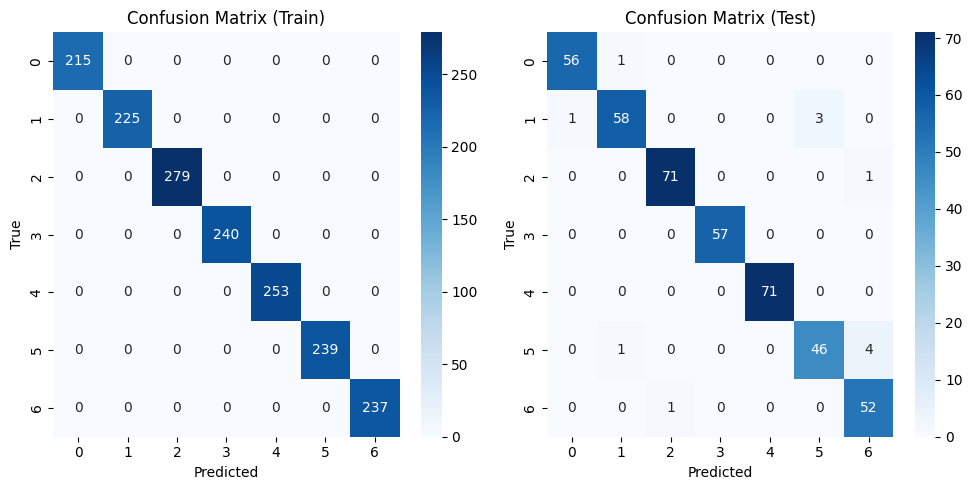

In [ ]:
#seleccionamos las variables categoricas ya que XGboost no admite categorias
categorical_cols = ['favc', 'scc', 'smoke', 'family_history']

# Ya que las variables son booleanas por lo tamtp no tiene un orden/jerarquia les aplicamos un LabelEncoder que asigna un numero a cada valor para que puedan funcionar con XGBClassifier
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    # If X_test exists, apply the same transformation to it
    if 'X_test' in globals() and isinstance(globals()['X_test'], pd.DataFrame):
        X_test[col] = le.transform(X_test[col])

# Ajustamos el codificador a la variable objetivo de entrenamiento
le.fit(y_train)

# Transformar las variables objetivo tanto de entrenamiento como de prueba (se reemplaza cada categorías por un número)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Definimos el modelo (a partir de aquí hecho a mano)
model_xgb_2 = xgb.XGBClassifier(
    objective='multi:softprob', # Es la función objetivo (hay regresión, clasificación binaria y clasificación multiclase, en nuestro caso al ser multiclase es multi:softprob)
    num_class=7,  # (número de clases de la variable objetivo(
    learning_rate=0.1, # (Controla la influencia de cada árbol nuevo en el modelo final, si el número es bajo el impacto en menor y se necesitarán más árboles)
    max_depth=6, # máxima profundidad
    n_estimators=100 #número de árboles
)

# Entrenar el modelo utilizando la variable objetivo codificada
model_xgb_2.fit(X_train, y_train_encoded)

# Predict
y_pred = model_xgb_2.predict(X_test)

# Eval model
compute_metrics(model_xgb_2, X_train, y_train_encoded, X_test, y_test_encoded)

In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_xgb_2.feature_names_in_,model_xgb_2.feature_importances_)).sort_values(1,ascending=False)

0         1
4             fcvc  0.329448
2           weight  0.254517
1           height  0.106170
5              ncp  0.087754
8             ch2o  0.071822
11             tue  0.056919
0              age  0.054587
10             faf  0.038782
3             favc  0.000000
6              scc  0.000000
7            smoke  0.000000
9   family_history  0.000000

#Feature Engineering

Train/Test split results:
Pipeline accuracy (train) is 1.000
Pipeline accuracy (test) is 0.976
Pipeline F1 score (train) is 1.000
Pipeline F1 score (test) is 0.976
Pipeline Precision (test) is 0.977
Pipeline Recall/Sensitividad (test) is 0.976
Confusion Matrix (Train):
[[215   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 279   0   0   0   0]
 [  0   0   0 240   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0   0   0   0   0 239   0]
 [  0   0   0   0   0   0 237]]
Confusion Matrix (Test):
[[55  2  0  0  0  0  0]
 [ 0 59  0  0  0  2  1]
 [ 0  0 70  0  0  1  1]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  0  0  0  0 50  1]
 [ 0  0  1  0  0  1 51]]


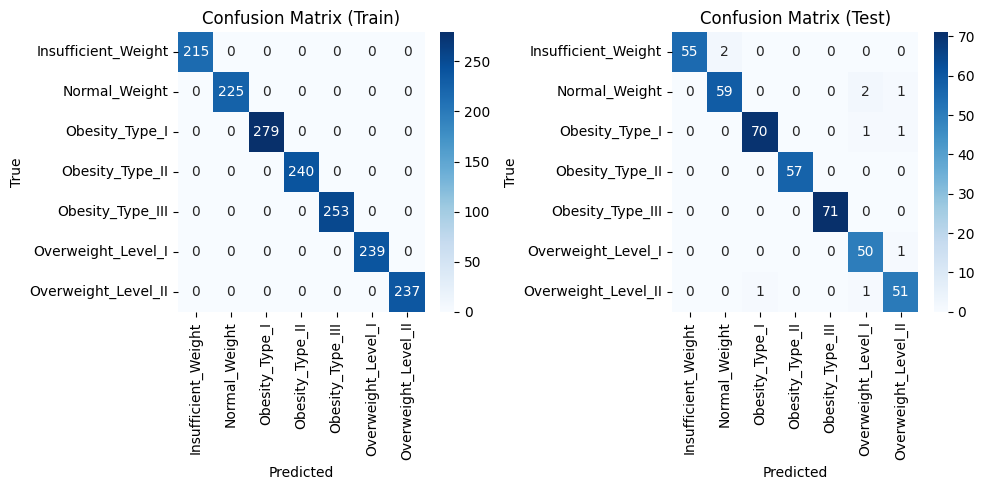

In [ ]:
#Usamos Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear un pipeline que normaliza los datos y luego aplica un clasificador
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Paso 1: Normalización de las variables
    ('classifier', RandomForestClassifier())  # Paso 2: Clasificación
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = pipeline.predict(X_test)


# Eval model
compute_metrics(pipeline, X_train, y_train, X_test, y_test)


In [ ]:
#Vemos cuales son las variables mas importantes en el modelo

feature_importances = pipeline.named_steps['classifier'].feature_importances_
print('Feature Importances:', feature_importances)

Feature Importances: [0.10711171 0.13548746 0.38378912 0.         0.11079469 0.0645383
 0.         0.         0.06384522 0.         0.06454795 0.06988556]


In [ ]:
#Usamos Pipeline con XGBClassifier

# Crear un pipeline que normaliza los datos y luego aplica un clasificador
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Paso 1: Normalización de las variables
    ('classifier',XGBClassifier())  # Paso 2: Esta vez con XGBClassifier
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = pipeline.predict(X_test)


# Eval model
compute_metrics(pipeline, X_train, y_train, X_test, y_test)



## Conclusiones generales

Este proyecto tiene como objetivo desarrollar un modelo predictivo multiclase  capaz de clasificar el nivel de obesidad en individuos utilizando datos fisiológicos y hábitos de vida.

1. Carga y comprensión del dataset

Se describen 17 variables relacionadas con la salud y estilo de vida. Estas variables incluyen edad, peso, altura, frecuencia de consumo de verduras, antecedentes familiares, entre otras, y el objetivo final es clasificar a cada persona según su nivel de obesidad (NObeyesdad). Se identificó que el dataset senillo, bien estructurado y aborda múltiples dimensiones relevantes para un problema de salud como la obesidad. La variable objetivo tiene varias clases, lo que hace del problema una clasificación multiclase.

2. Preprocesamiento de datos

En este seccion se incluyen las diferentes transformaciones aplicadas para un mejor manejo de los datos asegurando consistencia en los nombres de variables y tipos de datos. No se detectaron valores nulos, lo que simplifica el tratamiento.

- Limpieza y estandarización de nombres de columnas.

- Conversión de variables numéricas a tipos adecuados.

- Eliminación de caracteres especiales (como acentos) para facilitar la manipulación.

- Renombramiento de columnas para mayor claridad.

3. Análisis exploratorio de datos (EDA)

En esta sección se analiza la forma y distribución del dataset, se realizan análisis univariables y bivariables para comprobrar las relaciones entre variables y algunas pruebas estadísticas.

- Edad: media ~24 años.

- Altura: media ~1.70 m, distribución razonablemente simétrica.

- Peso: media ~86 kg, con outliers (personas >130 kg).

- Se analizaron gráficamente relaciones entre variables como: hábitos alimenticios y nivel de obesidad, frecuencia de actividad física y nivel de obesidad, etc.

También se aplicaron pruebas estadísticas como Kruskal-Wallis para evaluar diferencias significativas entre clases de obesidad.

Se confirmó que variables como el consumo de alimentos hipercalóricos (FAVC), la frecuencia de ejercicio (FAF), y la ingesta de agua (CH2O) tienen relación con el nivel de obesidad. Estas observaciones fundamentan la selección de variables para el modelado.

4. Modelado y resultados

Para la fase de modelado predictivo, se probaron diferentes algoritmos de clasificación, incluyendo Regresión Logística, Naive Bayes, K-Nearest Neighbors, Árboles de Decisión, Random Forest y XGBoost. Estos modelos fueron evaluados mediante métricas como la precisión, recall, F1 score y la matriz de confusión, permitiendo comparar la efectividad de cada modelo.

- Modelos avanzados como Random Forest y XGBoost demostraron una mayor capacidad predictiva frente a otros modelos con enfoques más simples.

- Modelos más simples como Naive Bayes y regresión logística tuvieron un desempeño aceptable, pero inferior en comparación a otros modelos.

- La matriz de confusión mostró que el modelo predice con mayor certeza los niveles extremos de obesidad (bajo peso y obesidad severa), mientras que tiene más confusiones en los niveles intermedios.

Gracias a los diferentes intentos y usos de modelos, se logró construir un modelo efectivo para la clasificación de niveles de obesidad. Los algoritmos que combinan múltiples predicciones individuales resultaron ser más adecuados para capturar la complejidad del problema.



### ANOVA CON F1 SCORE

Comprobamos con un test estadistico (ANOVA) cual es el modelo mas eficiente y efectivo para nuestro problema multiclase

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable 'y'
le.fit(y)

# Transform 'y' to numerical labels
y_encoded = le.transform(y)


# Diccionario para almacenar los resultados
results = {}

# Lista de modelos
modelos = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Evaluamos con la metrica F1 Score

f1 = make_scorer(f1_score, average='weighted')

for name, model in modelos.items():
    scores = cross_val_score(model, X, y_encoded, cv=5, scoring=f1)  # Use y_encoded
    results[name] = scores
    print(f"{name}: Mean F1 = {np.mean(scores):.4f}")

# ANOVA: comparación de medias
anova_result = f_oneway(*results.values())
print("\nANOVA Resultados:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean F1 = 0.5555
Naive Bayes: Mean F1 = 0.5979
KNN: Mean F1 = 0.8351
Decision Tree: Mean F1 = 0.9338
Random Forest: Mean F1 = 0.9487
XGBoost: Mean F1 = 0.9624

ANOVA Resultados:
F-statistic: 91.1838
P-value: 0.0000


Nos dice que claramente el modelo que mejor funciona es en este caso el mas avanzado el XGBoost con un valor de media de F1 = 0.9624

Comparación estadística entre modelos: ANOVA sobre F1 y ANOVA sobre AUC

### ANOVA CON AUC

In [ ]:
#-------- ANOVA CON AUC --------

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable 'y'
le.fit(y)


# Binarizar las etiquetas para AUC multiclase
clases = le.classes_
y_bin = label_binarize(y, classes=clases)

# Lista de modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Calcular AUC para cada modelo
auc_resultados = []

for nombre, modelo in modelos.items():
    pipeline = make_pipeline(StandardScaler(), modelo)

    # Transform 'y' to numerical labels before prediction
    y_encoded = le.transform(y)

    # Obtener predicciones de probabilidad
    y_score = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')

    fitted_estimator = pipeline.fit(X, y_encoded).named_steps[type(modelo).__name__.lower()]

    classes = le.classes_

    # Binarizar de nuevo porque cross_val_predict cambia el orden
    y_true_bin = label_binarize(y, classes=classes)

    # Calcular AUC multiclase macro
    auc_macro = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
    auc_resultados.append({"Modelo": nombre, "AUC (macro)": round(auc_macro, 4)})

# Mostrar como tabla
df_auc = pd.DataFrame(auc_resultados)
print(df_auc)


                Modelo  AUC (macro)
0  Logistic Regression       0.9862
1          Naive Bayes       0.8960
2                  KNN       0.9563
3        Decision Tree       0.9620
4        Random Forest       0.9958
5              XGBoost       0.9976


Realizamos un test un post-hoc de Conover con corrección de Holm para identificar que diferencias significatvas existe entre el rendimiento de todos los modelos. Basandonos en este caso en la metrica AUC

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_auc_score
from scipy.stats import f_oneway
import scikit_posthocs as sp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Primero, codificar las clases categóricas a numéricas
from sklearn.preprocessing import LabelEncoder

# Suponiendo que tienes X e y ya definidos
# X es tu dataframe con características
# y es tu vector de etiquetas de clase (strings)

# Codificar las etiquetas de clase
le = LabelEncoder()
y_encoded = le.fit_transform(y)
clases = np.unique(y_encoded)

# Modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Almacenamos AUC por fold por modelo
resultados_auc = []

# 5-Fold Stratified CV manual
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for nombre, modelo in modelos.items():
    pipeline = make_pipeline(StandardScaler(), modelo)

    for train_idx, test_idx in cv.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        # Ajustar y predecir probabilidades
        pipeline.fit(X_train, y_train)
        y_score = pipeline.predict_proba(X_test)

        # Para AUC multiclase
        y_test_bin = label_binarize(y_test, classes=range(len(clases)))

        # Calcular AUC macro
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
        resultados_auc.append({"Modelo": nombre, "AUC": auc})

# DataFrame con resultados
df_auc = pd.DataFrame(resultados_auc)

# Agrupar resultados por modelo para ANOVA
modelos_nombres = list(modelos.keys())
grupos_auc = [df_auc[df_auc["Modelo"] == nombre]["AUC"].values for nombre in modelos_nombres]

# ANOVA
anova_auc = f_oneway(*grupos_auc)
print(f"ANOVA AUC F = {anova_auc.statistic:.4f}, p = {anova_auc.pvalue:.4f}")

# Test post-hoc si hay diferencias
if anova_auc.pvalue < 0.05:
    print("\nDiferencias significativas encontradas: realizando test post-hoc Conover...\n")
    conover_auc = sp.posthoc_conover(df_auc, val_col='AUC', group_col='Modelo', p_adjust='holm')
    print(conover_auc)
else:
    print("\nNo se encontraron diferencias significativas entre los modelos según el AUC.")


ANOVA AUC F = 544.3408, p = 0.0000

Diferencias significativas encontradas: realizando test post-hoc Conover...

                     Decision Tree           KNN  Logistic Regression  \
Decision Tree         1.000000e+00  3.787950e-02         4.384894e-03   
KNN                   3.787950e-02  1.000000e+00         1.570502e-05   
Logistic Regression   4.384894e-03  1.570502e-05         1.000000e+00   
Naive Bayes           1.570502e-05  4.384894e-03         6.152720e-09   
Random Forest         3.193013e-07  2.415676e-09         1.439709e-03   
XGBoost               1.609049e-08  1.863355e-10         4.342132e-05   

                      Naive Bayes  Random Forest       XGBoost  
Decision Tree        1.570502e-05   3.193013e-07  1.609049e-08  
KNN                  4.384894e-03   2.415676e-09  1.863355e-10  
Logistic Regression  6.152720e-09   1.439709e-03  4.342132e-05  
Naive Bayes          1.000000e+00   5.194821e-12  6.631134e-13  
Random Forest        5.194821e-12   1.000000e+00  

### Conclusión estadística basada en AUC

Se aplicó un análisis ANOVA utilizando la métrica AUC (macro) para comparar el rendimiento de distintos
modelos de clasificación. El resultado del ANOVA fue altamente significativo (F = 1205.83, p < 0.0001),
 lo que indica que existen diferencias estadísticamente significativas en el rendimiento de los modelos.

Posteriormente, se realizó un test post-hoc de Conover con corrección de Holm para identificar qué modelos presentan diferencias significativas entre sí. Los resultados muestran que el modelo **XGBoost**
obtuvo un AUC significativamente mayor en comparación con todos los demás modelos evaluados (p < 0.05 en todas las comparaciones).

Por lo tanto, se concluye que, a nivel estadístico y con base en la métrica AUC, **XGBoost es
el mejor modelo de clasificación** entre los considerados en este análisis.
